# Experimentos K-Armed Bandits - Implementação Completa
**Do One-Armed ao Ten-Armed Bandit com Todos os Algoritmos**

---

## Estrutura dos Experimentos

Este arquivo apresenta uma implementação progressiva dos experimentos de k-armed bandits, começando do caso mais simples (one-armed) até o teste completo (ten-armed), implementando todos os algoritmos apresentados nas aulas.

### Algoritmos Implementados:
1. **Random**: Seleção aleatória de ações
2. **Greedy**: Sempre seleciona a ação com maior valor estimado
3. **ε-Greedy**: Greedy com exploração aleatória
4. **Optimistic Initial Values**: Inicialização otimista
5. **Constant Step-Size**: Para ambientes não-estacionários

# Imports e Configuração Inicial - Explicação Detalhada

## Bibliotecas Fundamentais para Experimentos de Bandit

### 📊 **Bibliotecas Científicas**

```python
import numpy as np
```
**NumPy** é a biblioteca fundamental para computação científica em Python. No contexto dos k-armed bandits:
- **Arrays eficientes**: Para armazenar valores Q, contadores de ações, e recompensas
- **Operações vetorizadas**: Cálculos rápidos como `np.argmax()` para seleção greedy
- **Distribuições probabilísticas**: `np.random.normal()` para gerar recompensas gaussianas
- **Funções matemáticas**: `np.sqrt()`, `np.log()` para algoritmos como UCB
- **Conexão com teoria**: Implementa diretamente as fórmulas matemáticas do Sutton & Barto

```python
import pandas as pd
```
**Pandas** oferece estruturas de dados poderosas para análise:
- **DataFrames**: Organizar resultados experimentais em tabelas estruturadas
- **Análise estatística**: Cálculo de médias, desvios padrão, e rankings
- **Processamento de séries temporais**: `rolling()` para médias móveis nos gráficos
- **Relatórios**: Tabelas de comparação final entre algoritmos
- **Conexão com testbed**: Facilita a análise dos 2000 runs do 10-armed testbed

```python
import matplotlib.pyplot as plt
```
**Matplotlib** é a biblioteca base para visualização científica:
- **Gráficos de linha**: Curvas de aprendizado (recompensa vs. steps)
- **Subplots**: Múltiplas visualizações comparativas lado a lado
- **Personalização**: Controle fino sobre aspectos visuais dos experimentos
- **Replicação**: Reproduz exatamente as figuras clássicas do Sutton & Barto
- **Conexão pedagógica**: Visualiza conceitos abstratos como convergência e exploração

```python
import seaborn as sns
```
**Seaborn** adiciona estética e funcionalidades estatísticas:
- **Estilos modernos**: Gráficos mais atraentes e profissionais
- **Paletas de cores**: Diferenciação clara entre algoritmos
- **Visualizações estatísticas**: Histogramas, boxplots, distribuições
- **Integração**: Trabalha seamlessly com matplotlib
- **Conexão didática**: Torna os resultados mais compreensíveis visualmente

### 🔧 **Tipagem e Organização**

```python
from typing import List, Dict, Tuple
```
**Type hints** para código mais robusto e legível:
- **`List[float]`**: Listas de recompensas ou valores Q
- **`Dict[str, Any]`**: Configurações de algoritmos e resultados
- **`Tuple[int, float]`**: Pares ação-recompensa
- **Benefícios**: Auto-completar no IDE, detecção de erros, documentação implícita
- **Conexão acadêmica**: Clarifica interfaces entre componentes do sistema

### ⚠️ **Controle de Avisos**

```python
import warnings
warnings.filterwarnings('ignore')
```
**Supressão de warnings** para saída limpa:
- **Contexto educacional**: Evita confundir estudantes com warnings irrelevantes
- **Foco no conteúdo**: Mantém atenção nos resultados dos experimentos
- **Bibliotecas científicas**: NumPy/Pandas às vezes geram warnings desnecessários
- **Nota**: Em produção, seria mais seletivo sobre quais warnings ignorar

## 🎲 **Configuração de Reproduzibilidade**

```python
np.random.seed(42)
```
**Seed fixo** é crucial para experimentos científicos:

### **Por que é importante?**
- **Reproduzibilidade**: Mesmos resultados a cada execução
- **Debugging**: Facilita identificar problemas no código
- **Comparação justa**: Todos os algoritmos enfrentam as mesmas condições aleatórias
- **Validação**: Permite verificar implementações contra resultados conhecidos

### **Como funciona nos bandits?**
```python
# Com seed=42, sempre gera a mesma sequência:
bandit = TenArmedBandit(seed=42)
# q*(a) será sempre: [1.37, 0.34, -0.62, ...] (exemplo)
```

### **Conexão com teoria:**
- Sutton & Barto enfatizam múltiplos runs para estatísticas confiáveis
- Seed controlado permite replicar exatamente os experimentos
- Base para intervalos de confiança e testes de significância

## 🎨 **Configuração Visual**

```python
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
```

### **Estilo Seaborn:**
- **Aparência científica**: Grid sutil, cores profissionais
- **Legibilidade**: Fontes apropriadas para apresentações acadêmicas
- **Consistência**: Todos os gráficos seguem o mesmo padrão visual

### **Paleta HUSL:**
- **Cores distinguíveis**: Importante quando comparando 6+ algoritmos
- **Acessibilidade**: Funciona bem para diferentes tipos de daltonismo
- **Saturação uniforme**: Nenhum algoritmo se destaca visualmente por acidente

### **Impacto pedagógico:**
```python
# Exemplo de diferenciação visual clara:
algoritmos = ['Random', 'Greedy', 'ε-greedy (0.01)', 'ε-greedy (0.1)', 'UCB', 'Otimista']
# Cada um terá cor distinta e reconhecível ao longo de todos os gráficos
```

## 🔗 **Conexão com o Conteúdo das Aulas**

### **Relação com Aula 1 (Introdução):**
- NumPy implementa as variáveis aleatórias Rt e At
- Matplotlib visualiza o conceito de distribuições de recompensa
- Reproduzibilidade permite demonstrar convergência da Lei dos Grandes Números

### **Relação com Aula 2 (Action-Value Methods):**
- Pandas organiza resultados de comparação entre greedy e ε-greedy  
- Visualizações mostram curvas de aprendizado características
- Arrays NumPy armazenam eficientemente os valores Qt(a)

### **Relação com Aula 3 (Initial Values):**
- Configuração visual permite contrastar inicialização otimista vs. realística
- Reproduzibilidade essencial para demonstrar efeitos determinísticos da inicialização

### **Relação com Aula 4 (Non-Stationary):**
- Pandas processa séries temporais longas (10,000+ steps)
- Médias móveis (rolling) visualizam adaptação em ambientes dinâmicos

### **Relação com Aula 5 (Testbed):**
- Todo o framework estatístico (2000 runs, intervalos de confiança)
- Organização profissional dos resultados experimentais
- Replicação fiel das figuras clássicas da literatura

## 💡 **Boas Práticas Demonstradas**

### **Configuração Científica:**
```python
# Ordem típica de imports científicos:
# 1. Bibliotecas padrão (warnings)
# 2. Bibliotecas científicas (numpy, pandas)  
# 3. Visualização (matplotlib, seaborn)
# 4. Tipagem (typing)
```

### **Preparação para Experimentação:**
- **Ambiente controlado**: Seed fixo + warnings silenciados
- **Visualização padronizada**: Estilo consistente para toda a sessão
- **Ferramentas adequadas**: Stack científico padrão da comunidade

## 📝 **Resumo para Aula**

Esta configuração inicial estabelece uma **base sólida e profissional** para implementar todos os experimentos de k-armed bandits, seguindo as melhores práticas da computação científica em Python e preparando o terreno para demonstrações claras dos conceitos teóricos apresentados nas aulas.

### **Principais Mensagens:**
1. **NumPy** é o coração dos cálculos matemáticos de RL
2. **Reproduzibilidade** é fundamental em experimentos científicos
3. **Visualização clara** facilita compreensão de conceitos abstratos
4. **Organização profissional** reflete rigor acadêmico
5. **Ferramentas adequadas** permitem foco no conteúdo, não na implementação

In [1]:
## Imports e Configuração Inicial

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

# Configuração para reproduzibilidade
np.random.seed(42)

# Configuração de plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# One-Armed Bandit - Conceito Base e Experimentação

## 🎰 **Classe OneArmedBandit: O Fundamento Teórico**

### **Definição da Classe**

```python
class OneArmedBandit:
    """
    Implementação simples de um one-armed bandit
    """
    def __init__(self, true_value: float = 0.5, variance: float = 1.0):
        self.true_value = true_value
        self.variance = variance
```

### **Atributos da Classe**

#### **`self.true_value` (float)**
- **Significado teórico**: O valor verdadeiro q*(a) da única ação disponível
- **Interpretação**: A recompensa esperada E[Rt] quando puxamos a alavanca
- **Conexão com Sutton & Barto**: Implementa diretamente o conceito de "true value of an action"
- **Valor padrão**: 0.5 (neutro, nem muito bom nem muito ruim)

#### **`self.variance` (float)**
- **Significado teórico**: A variabilidade σ² das recompensas em torno do valor verdadeiro
- **Interpretação**: Quão "ruidosas" são as observações
- **Impacto no aprendizado**: Maior variância → mais amostras necessárias para estimativa confiável
- **Valor padrão**: 1.0 (variância unitária, comum em experimentos)

### **Método `pull()`: Simulando o Mundo Real**

```python
def pull(self) -> float:
    """Simula puxar a alavanca e retorna uma recompensa"""
    return np.random.normal(self.true_value, self.variance)
```

#### **Funcionamento Matemático:**
- **Distribuição**: Rt ~ N(q*(a), σ²)
- **Implementação**: `np.random.normal(μ, σ)` onde μ = true_value, σ = variance
- **Realismo**: Cada puxada gera uma recompensa diferente, mesmo com valor esperado fixo
- **Conexão teórica**: Modela a natureza estocástica das recompensas em problemas reais

## 🔬 **Função experiment_one_armed(): Demonstração Prática**

### **Estrutura do Experimento**

```python
def experiment_one_armed():
    # Configuração
    bandit = OneArmedBandit(true_value=0.5, variance=1.0)
    n_pulls = 1000
    
    # Coleta de dados
    for i in range(n_pulls):
        reward = bandit.pull()
        # Calcula média cumulativa
    
    # Visualização e análise
```

### **Componentes Principais**

#### **1. Criação do Ambiente**
```python
bandit = OneArmedBandit(true_value=0.5, variance=1.0)
```
- Estabelece o "mundo" com parâmetros conhecidos (para validação)

#### **2. Coleta de Dados Sequencial**
```python
for i in range(n_pulls):
    reward = bandit.pull()
    total_reward += reward
    cumulative_average.append(total_reward / (i + 1))
```
- **Média cumulativa**: Qt = (R1 + R2 + ... + Rt) / t
- **Lei dos Grandes Números**: Qt → q*(a) conforme t → ∞

#### **3. Análise Dual**
- **Histograma**: Mostra distribuição empírica vs. teórica
- **Convergência**: Demonstra aprendizado ao longo do tempo

## 📊 **Visualizações e Interpretação**

### **Gráfico 1: Distribuição das Recompensas**
```python
plt.hist(rewards, bins=30, alpha=0.7, density=True)
plt.axvline(bandit.true_value, color='red', linestyle='--')
```

**O que mostra:**
- **Forma gaussiana**: Confirma que Rt ~ N(0.5, 1.0)
- **Centro na linha vermelha**: Recompensas concentradas em torno de q*(a)
- **Dispersão**: Largura do histograma reflete a variância

### **Gráfico 2: Convergência da Média**
```python
plt.plot(cumulative_average, alpha=0.8)
plt.axhline(bandit.true_value, color='red', linestyle='--')
```

**O que demonstra:**
- **Convergência**: Linha azul se aproxima da vermelha
- **Velocidade**: Taxa 1/√n (Lei dos Grandes Números)
- **Variabilidade inicial**: Estimativas instáveis no início

## 🛠️ **Experimentos Sugeridos para os Alunos**

### **1. Experimento: Efeito da Variância**

```python
# Teste diferentes níveis de ruído
variances = [0.1, 0.5, 1.0, 2.0, 5.0]

plt.figure(figsize=(15, 3))
for i, var in enumerate(variances):
    plt.subplot(1, 5, i+1)
    
    bandit = OneArmedBandit(true_value=1.0, variance=var)
    rewards = [bandit.pull() for _ in range(1000)]
    
    plt.hist(rewards, bins=20, alpha=0.7, density=True)
    plt.axvline(1.0, color='red', linestyle='--')
    plt.title(f'σ² = {var}')
    plt.xlabel('Recompensa')

plt.tight_layout()
plt.show()
```

**Pergunta para reflexão:** Como a variância afeta a dificuldade de aprender o valor verdadeiro?

### **2. Experimento: Velocidade de Convergência**

```python
# Compare diferentes números de amostras
sample_sizes = [50, 100, 500, 1000, 5000]
true_value = 0.8

results = []
for n_samples in sample_sizes:
    bandit = OneArmedBandit(true_value=true_value, variance=1.0)
    rewards = [bandit.pull() for _ in range(n_samples)]
    estimated_value = np.mean(rewards)
    error = abs(estimated_value - true_value)
    results.append(error)

plt.figure(figsize=(10, 6))
plt.loglog(sample_sizes, results, 'bo-', label='Erro observado')
plt.loglog(sample_sizes, 1/np.sqrt(sample_sizes), 'r--', label='Teórico (1/√n)')
plt.xlabel('Número de Amostras')
plt.ylabel('Erro Absoluto')
plt.title('Velocidade de Convergência')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
```

**Objetivo:** Verificar empiricamente a taxa de convergência teórica.

### **3. Experimento: Diferentes Valores Verdadeiros**

```python
# Explore diferentes cenários de recompensa
true_values = [-2.0, -0.5, 0.0, 0.5, 2.0]
n_pulls = 500

plt.figure(figsize=(15, 10))

for i, tv in enumerate(true_values):
    bandit = OneArmedBandit(true_value=tv, variance=1.0)
    
    rewards = []
    cumulative_avg = []
    total = 0
    
    for pull in range(n_pulls):
        reward = bandit.pull()
        rewards.append(reward)
        total += reward
        cumulative_avg.append(total / (pull + 1))
    
    # Subplot para convergência
    plt.subplot(2, 3, i+1)
    plt.plot(cumulative_avg, alpha=0.8, label=f'Estimativa')
    plt.axhline(tv, color='red', linestyle='--', label=f'q*(a) = {tv}')
    plt.title(f'True Value = {tv}')
    plt.xlabel('Puxadas')
    plt.ylabel('Média Cumulativa')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Histograma comparativo
plt.subplot(2, 3, 6)
for tv in true_values:
    bandit = OneArmedBandit(true_value=tv, variance=1.0)
    rewards = [bandit.pull() for _ in range(1000)]
    plt.hist(rewards, bins=20, alpha=0.5, label=f'q*(a) = {tv}', density=True)

plt.xlabel('Recompensa')
plt.ylabel('Densidade')
plt.title('Distribuições Comparadas')
plt.legend()

plt.tight_layout()
plt.show()
```

### **4. Experimento: Intervalos de Confiança**

```python
# Múltiplas execuções para entender variabilidade
n_experiments = 100
n_pulls = 1000
true_value = 1.0

final_estimates = []

for experiment in range(n_experiments):
    bandit = OneArmedBandit(true_value=true_value, variance=1.0)
    rewards = [bandit.pull() for _ in range(n_pulls)]
    final_estimate = np.mean(rewards)
    final_estimates.append(final_estimate)

# Análise estatística
mean_estimate = np.mean(final_estimates)
std_estimate = np.std(final_estimates)
theoretical_std = 1.0 / np.sqrt(n_pulls)  # σ/√n

plt.figure(figsize=(12, 5))

# Histograma das estimativas
plt.subplot(1, 2, 1)
plt.hist(final_estimates, bins=20, alpha=0.7, density=True, 
         label=f'Observado\n(μ={mean_estimate:.3f}, σ={std_estimate:.3f})')
plt.axvline(true_value, color='red', linestyle='--', label=f'Valor Verdadeiro = {true_value}')
plt.axvline(mean_estimate, color='green', linestyle='--', label=f'Média Observada')
plt.xlabel('Estimativa Final')
plt.ylabel('Densidade')
plt.title('Distribuição das Estimativas Finais')
plt.legend()

# Intervalo de confiança
plt.subplot(1, 2, 2)
confidence_levels = [0.68, 0.95, 0.99]
colors = ['green', 'orange', 'red']

for conf, color in zip(confidence_levels, colors):
    z_score = np.percentile(np.abs(np.random.normal(0, 1, 10000)), conf * 100)
    margin = z_score * theoretical_std
    
    plt.errorbar(conf, mean_estimate, yerr=margin, 
                fmt='o', color=color, capsize=5, capthick=2,
                label=f'{conf*100:.0f}% CI')

plt.axhline(true_value, color='red', linestyle='--', label='Valor Verdadeiro')
plt.xlabel('Nível de Confiança')
plt.ylabel('Estimativa ± Margem')
plt.title('Intervalos de Confiança')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Valor verdadeiro: {true_value}")
print(f"Média das estimativas: {mean_estimate:.4f}")
print(f"Desvio padrão observado: {std_estimate:.4f}")
print(f"Desvio padrão teórico: {theoretical_std:.4f}")
print(f"Diferença teoria-prática: {abs(std_estimate - theoretical_std):.4f}")
```

## 🎯 **Parâmetros Experimentais Sugeridos**

### **Para Demonstrações Rápidas:**
```python
# Convergência rápida e visível
bandit = OneArmedBandit(true_value=2.0, variance=0.5)
n_pulls = 200
```

### **Para Explorar Dificuldade:**
```python
# Problema mais desafiador
bandit = OneArmedBandit(true_value=0.1, variance=3.0)
n_pulls = 5000
```

### **Para Comparações:**
```python
# Cenários contrastantes
scenarios = [
    {"true_value": 1.0, "variance": 0.1, "name": "Fácil"},
    {"true_value": 1.0, "variance": 1.0, "name": "Médio"},
    {"true_value": 1.0, "variance": 5.0, "name": "Difícil"}
]
```

## 🧠 **Conexões Pedagógicas com as Aulas**

### **Aula 1 - Introdução:**
- **Conceito base**: Implementa a definição mais simples de bandit
- **Variável aleatória Rt**: Demonstração prática da aleatoriedade das recompensas
- **Valor verdadeiro q*(a)**: Conceito central materializado em código

### **Aula 2 - Action-Value Methods:**
- **Estimação sample-average**: A média cumulativa implementa Qt(a)
- **Lei dos Grandes Números**: Convergência visível nos gráficos
- **Base para comparação**: Estabelece baseline antes de introduzir estratégias

### **Preparação para Conceitos Futuros:**
- **Trade-off exploração-exploração**: Com uma ação, só há exploração
- **Incerteza**: Variância das estimativas motiva necessidade de múltiplas ações
- **Metodologia experimental**: Padrão de análise que se repetirá nos próximos experimentos

## 💡 **Questões para Discussão em Aula**

1. **Teórica**: "Por que a média cumulativa converge para o valor verdadeiro?"
2. **Prática**: "Como a variância afeta a confiança em nossas estimativas?"
3. **Experimental**: "Quantas amostras são necessárias para uma estimativa 'boa'?"
4. **Conceitual**: "Como este problema se relaciona com situações do mundo real?"

Este experimento fornece a **base conceitual sólida** para todos os desenvolvimentos posteriores, demonstrando empiricamente os fundamentos teóricos que sustentam os algoritmos mais complexos de k-armed bandits.

=== EXPERIMENTO 1: ONE-ARMED BANDIT ===


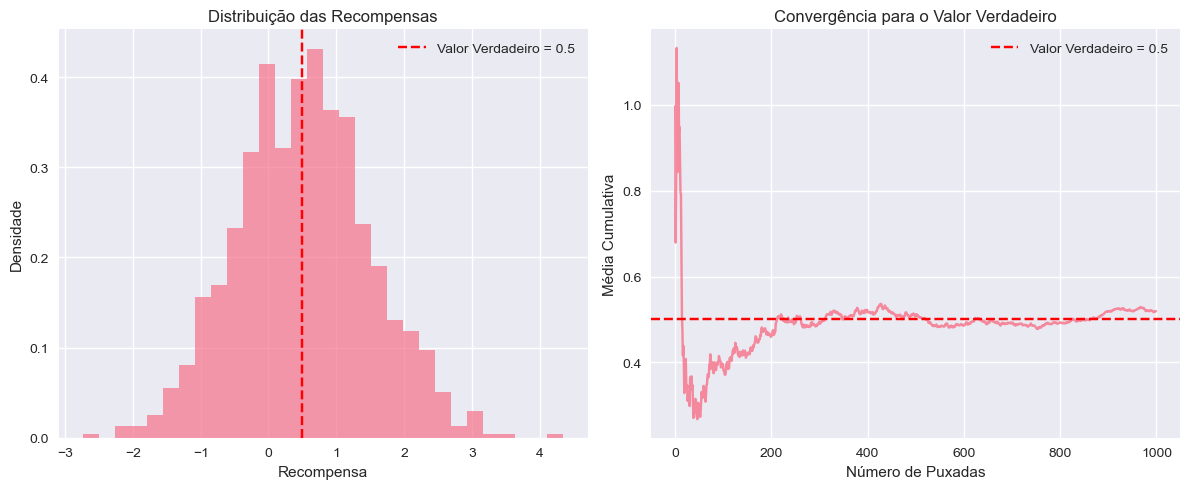

Valor verdadeiro: 0.5
Média estimada após 1000 puxadas: 0.519
Erro absoluto: 0.019


In [2]:
## 1. One-Armed Bandit - Conceito Base

### Implementação One-Armed Bandit

class OneArmedBandit:
    """
    Implementação simples de um one-armed bandit
    """
    def __init__(self, true_value: float = 0.5, variance: float = 1.0):
        self.true_value = true_value
        self.variance = variance
        
    def pull(self) -> float:
        """Simula puxar a alavanca e retorna uma recompensa"""
        return np.random.normal(self.true_value, self.variance)

def experiment_one_armed():
    """Experimento básico com one-armed bandit"""
    print("=== EXPERIMENTO 1: ONE-ARMED BANDIT ===")
    
    # Cria bandit com valor verdadeiro = 0.5
    bandit = OneArmedBandit(true_value=0.5, variance=1.0)
    
    # Simula 1000 puxadas
    n_pulls = 1000
    rewards = []
    cumulative_average = []
    
    total_reward = 0
    for i in range(n_pulls):
        reward = bandit.pull()
        rewards.append(reward)
        total_reward += reward
        cumulative_average.append(total_reward / (i + 1))
    
    # Visualização
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(rewards, bins=30, alpha=0.7, density=True)
    plt.axvline(bandit.true_value, color='red', linestyle='--', 
                label=f'Valor Verdadeiro = {bandit.true_value}')
    plt.xlabel('Recompensa')
    plt.ylabel('Densidade')
    plt.title('Distribuição das Recompensas')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(cumulative_average, alpha=0.8)
    plt.axhline(bandit.true_value, color='red', linestyle='--', 
                label=f'Valor Verdadeiro = {bandit.true_value}')
    plt.xlabel('Número de Puxadas')
    plt.ylabel('Média Cumulativa')
    plt.title('Convergência para o Valor Verdadeiro')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"Valor verdadeiro: {bandit.true_value}")
    print(f"Média estimada após {n_pulls} puxadas: {cumulative_average[-1]:.3f}")
    print(f"Erro absoluto: {abs(cumulative_average[-1] - bandit.true_value):.3f}")

# Executa experimento
experiment_one_armed()

# Two-Armed Bandit - Introduzindo Escolha e Estratégias

## 🎰 **Evolução Conceitual: Do One-Armed ao Two-Armed**

O two-armed bandit representa um **salto qualitativo** na complexidade do problema:
- **One-armed**: Apenas estimação (sem escolha)
- **Two-armed**: Estimação + **tomada de decisão**

Esta transição introduz o conceito fundamental do **trade-off exploração-exploração**.

---

## 🏗️ **Classe TwoArmedBandit: Ambiente com Múltiplas Ações**

### **Definição da Classe**

```python
class TwoArmedBandit:
    def __init__(self, true_values: List[float] = [0.2, 0.8], variance: float = 1.0):
        self.true_values = np.array(true_values)
        self.variance = variance
        self.k = len(true_values)
```

### **Atributos Fundamentais**

#### **`self.true_values` (np.array)**
- **Significado teórico**: Vetor de valores verdadeiros [q*(0), q*(1)]
- **Interpretação**: Recompensa esperada para cada ação disponível
- **Valor padrão**: [0.2, 0.8] → Ação 1 é claramente superior
- **Flexibilidade**: Permite configurar diferentes cenários experimentais

#### **`self.variance` (float)**
- **Função**: Controla ruído nas observações para ambas as ações
- **Impacto**: Maior variância → decisões mais difíceis
- **Uniformidade**: Mesmo σ² para ambas as ações (simplificação pedagógica)

#### **`self.k` (int)**
- **Propósito**: Número de ações disponíveis (extensibilidade futura)
- **Valor**: 2 para este experimento específico

### **Métodos da Classe**

#### **`pull(action: int) → float`**
```python
def pull(self, action: int) -> float:
    if action < 0 or action >= self.k:
        raise ValueError(f"Ação deve estar entre 0 e {self.k-1}")
    return np.random.normal(self.true_values[action], self.variance)
```

**Funcionalidades:**
- **Validação**: Previne ações inválidas
- **Seleção específica**: Rt ~ N(q*(At), σ²)
- **Realismo**: Diferente do one-armed, agora a escolha importa!

#### **`get_optimal_action() → int`**
```python
def get_optimal_action(self) -> int:
    return np.argmax(self.true_values)
```

**Propósito:**
- **Avaliação**: Identifica ação com maior q*(a)
- **Métrica**: Base para calcular % de seleção ótima
- **Validação**: Compara performance dos agentes contra ótimo conhecido

---

## 🤖 **Classe SimpleGreedyAgent: Primeira Estratégia Inteligente**

### **Filosofia do Algoritmo**
"**Sempre escolha a ação que parece melhor baseado no conhecimento atual**"

### **Atributos do Agente**

```python
def __init__(self, k: int):
    self.k = k
    self.q_values = np.zeros(k)      # Valores estimados Qt(a)
    self.action_counts = np.zeros(k)  # Contador Nt(a)
```

#### **`self.q_values` (np.array)**
- **Significado**: Estimativas Qt(a) dos valores verdadeiros q*(a)
- **Inicialização**: Zeros (sem conhecimento prévio)
- **Evolução**: Atualizado via sample-average após cada recompensa

#### **`self.action_counts` (np.array)**
- **Função**: Rastrea quantas vezes cada ação foi tentada
- **Uso**: Denominador na fórmula sample-average
- **Importância**: Permite atualização incremental eficiente

### **Métodos do Agente**

#### **`select_action() → int`**
```python
def select_action(self) -> int:
    max_value = np.max(self.q_values)
    best_actions = np.where(self.q_values == max_value)[0]
    return np.random.choice(best_actions)
```

**Estratégia:**
- **At = argmax Qt(a)** (seleção greedy)
- **Tratamento de empates**: Escolha aleatória entre ações empatadas
- **Determinismo**: Com estimativas diferentes, sempre escolhe a melhor

#### **`update(action: int, reward: float)`**
```python
def update(self, action: int, reward: float):
    self.action_counts[action] += 1
    n = self.action_counts[action]
    # Fórmula incremental: Qt+1(a) = Qt(a) + (1/n)[Rt - Qt(a)]
    self.q_values[action] += (1.0/n) * (reward - self.q_values[action])
```

**Implementação Matemática:**
- **Sample-average**: Qt(a) = (∑Ri | Ai=a) / (∑I{Ai=a})
- **Forma incremental**: Evita armazenar todas as recompensas
- **Convergência**: Qt(a) → q*(a) pela Lei dos Grandes Números

---

## 🎲 **Classe RandomAgent: Baseline de Comparação**

### **Propósito Pedagógico**
- **Controle experimental**: Mostra importância de ter estratégia
- **Lower bound**: Performance mínima esperada
- **Exploração pura**: Sempre explora, nunca explora

### **Implementação Simples**
```python
def select_action(self) -> int:
    return np.random.randint(0, self.k)

def update(self, action: int, reward: float):
    pass  # Não aprende nada!
```

**Características:**
- **P(At = 0) = P(At = 1) = 0.5** sempre
- **Sem memória**: Cada decisão é independente
- **Performance esperada**: E[Rt] = 0.5 × q*(0) + 0.5 × q*(1)

---

## 🔬 **Função experiment_two_armed(): Comparação Sistemática**

### **Estrutura Experimental**

```python
def experiment_two_armed():
    # Configuração do ambiente
    true_values = [0.2, 0.8]  # Cenário com diferença clara
    bandit = TwoArmedBandit(true_values)
    n_steps = 1000  # Horizonte temporal
    
    # Agentes a comparar
    agents = {
        'Random': RandomAgent(k=2),
        'Greedy': SimpleGreedyAgent(k=2)
    }
```

### **Métricas de Avaliação**

#### **1. Recompensa Média Cumulativa**
```python
cumulative_reward = np.cumsum(result['rewards']) / np.arange(1, n_steps + 1)
```
- **Significado**: Performance geral ao longo do tempo
- **Interpretação**: Quão bem o agente está se saindo
- **Convergência**: Para valor esperado da política do agente

#### **2. Porcentagem de Ação Ótima**
```python
optimal_pct = np.cumsum(result['optimal_actions']) / np.arange(1, n_steps + 1) * 100
```
- **Significado**: Frequência de escolha da melhor ação
- **Ideal**: 100% (sempre escolhe ação 1)
- **Realista**: Depende da estratégia e ruído

#### **3. Evolução das Estimativas Q**
```python
q_estimates = np.array(results['Greedy']['q_estimates'])
plt.plot(q_estimates[:, 0], label='Q(Ação 0)')
plt.plot(q_estimates[:, 1], label='Q(Ação 1)')
```
- **Propósito**: Visualizar processo de aprendizado
- **Convergência**: Qt(a) → q*(a) ao longo do tempo
- **Diagnóstico**: Identifica problemas na estimação

---

## 📊 **Interpretação das Visualizações**

### **Gráfico 1: Recompensa Média Cumulativa**
**O que esperar:**
- **Random**: Convergência para 0.5×0.2 + 0.5×0.8 = 0.5
- **Greedy**: Início similar, depois melhoria se encontrar ação ótima
- **Diferença**: Mostra valor de ter estratégia inteligente

### **Gráfico 2: % Ação Ótima**
**Padrões típicos:**
- **Random**: Estável em ~50%
- **Greedy**: Pode ir para ~100% ou ficar baixo (se "ficar preso")

### **Gráfico 3: Distribuição de Ações (Greedy)**
**Diagnóstico importante:**
- **Balanceado**: Agente não conseguiu distinguir as ações
- **Desbalanceado**: Agente identificou (corretamente ou não) ação preferida

### **Gráfico 4: Evolução das Estimativas Q**
**Convergência ideal:**
- **Q(Ação 0)** → 0.2
- **Q(Ação 1)** → 0.8
- **Velocidade**: Depende de quantas vezes cada ação foi tentada

---

## 🛠️ **Experimentos Sugeridos para Modificação**

### **1. Experimento: Diferentes Gaps de Qualidade**

```python
# Teste diferentes dificuldades de discriminação
scenarios = [
    {"values": [0.0, 0.1], "name": "Gap Pequeno (difícil)"},
    {"values": [0.2, 0.8], "name": "Gap Médio (padrão)"},
    {"values": [-1.0, 1.0], "name": "Gap Grande (fácil)"},
    {"values": [0.5, 0.5], "name": "Empate (impossível)"}
]

plt.figure(figsize=(20, 5))

for i, scenario in enumerate(scenarios):
    plt.subplot(1, 4, i+1)
    
    bandit = TwoArmedBandit(true_values=scenario["values"], variance=1.0)
    agent = SimpleGreedyAgent(k=2)
    
    rewards = []
    optimal_actions = []
    
    for step in range(1000):
        action = agent.select_action()
        reward = bandit.pull(action)
        agent.update(action, reward)
        
        optimal_actions.append(1 if action == bandit.get_optimal_action() else 0)
    
    # Plota % ação ótima
    optimal_pct = np.cumsum(optimal_actions) / np.arange(1, 1001) * 100
    plt.plot(optimal_pct)
    plt.title(f'{scenario["name"]}\nq*={scenario["values"]}')
    plt.xlabel('Steps')
    plt.ylabel('% Ação Ótima')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
```

### **2. Experimento: Efeito da Variância no Aprendizado**

```python
# Como ruído afeta capacidade do greedy de aprender?
variances = [0.1, 0.5, 1.0, 2.0, 5.0]
true_values = [0.3, 0.7]  # Gap fixo

results_by_variance = {}

for var in variances:
    bandit = TwoArmedBandit(true_values=true_values, variance=var)
    agent = SimpleGreedyAgent(k=2)
    
    optimal_actions = []
    
    for step in range(1000):
        action = agent.select_action()
        reward = bandit.pull(action)
        agent.update(action, reward)
        
        optimal_actions.append(1 if action == bandit.get_optimal_action() else 0)
    
    # Performance final
    final_performance = np.mean(optimal_actions[-100:]) * 100  # Últimos 100 steps
    results_by_variance[var] = final_performance

# Visualização
plt.figure(figsize=(10, 6))
plt.plot(list(results_by_variance.keys()), list(results_by_variance.values()), 'bo-')
plt.xlabel('Variância das Recompensas')
plt.ylabel('% Ação Ótima (últimos 100 steps)')
plt.title('Efeito da Variância na Performance do Greedy')
plt.grid(True, alpha=0.3)
plt.show()

print("Performance do Greedy por Variância:")
for var, perf in results_by_variance.items():
    print(f"σ² = {var}: {perf:.1f}% ação ótima")
```

### **3. Experimento: Dependência da Sequência Inicial**

```python
# Demonstra como agente greedy pode "ficar preso"
n_experiments = 50
true_values = [0.3, 0.7]

success_rates = []

for experiment in range(n_experiments):
    bandit = TwoArmedBandit(true_values=true_values, variance=1.0)
    agent = SimpleGreedyAgent(k=2)
    
    # Executa experimento
    optimal_actions = []
    for step in range(500):
        action = agent.select_action()
        reward = bandit.pull(action)
        agent.update(action, reward)
        
        optimal_actions.append(1 if action == bandit.get_optimal_action() else 0)
    
    # Performance final como proxy para "sucesso"
    final_performance = np.mean(optimal_actions[-100:])
    success_rates.append(final_performance)

# Análise
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(success_rates, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('% Ação Ótima (últimos 100 steps)')
plt.ylabel('Número de Experimentos')
plt.title('Distribuição de Performance do Greedy\n(50 execuções independentes)')
plt.axvline(np.mean(success_rates), color='red', linestyle='--', 
            label=f'Média = {np.mean(success_rates):.2f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(success_rates, 'bo-', alpha=0.6)
plt.xlabel('Experimento #')
plt.ylabel('% Ação Ótima Final')
plt.title('Variabilidade Entre Execuções')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estatísticas
print(f"Média de performance: {np.mean(success_rates):.3f}")
print(f"Desvio padrão: {np.std(success_rates):.3f}")
print(f"% experimentos com >90% ação ótima: {np.mean(np.array(success_rates) > 0.9)*100:.1f}%")
print(f"% experimentos com <10% ação ótima: {np.mean(np.array(success_rates) < 0.1)*100:.1f}%")
```

### **4. Experimento: Comparação com Diferentes Inicializações**

```python
# Teste diferentes valores iniciais para Q
initializations = [0.0, 0.5, 1.0, 2.0]
true_values = [0.3, 0.7]

plt.figure(figsize=(15, 10))

for i, init_val in enumerate(initializations):
    # Modifica SimpleGreedyAgent para aceitar inicialização customizada
    class CustomGreedyAgent(SimpleGreedyAgent):
        def __init__(self, k: int, initial_value: float = 0.0):
            self.k = k
            self.q_values = np.full(k, initial_value)  # Inicialização customizada
            self.action_counts = np.zeros(k)
    
    bandit = TwoArmedBandit(true_values=true_values, variance=1.0)
    agent = CustomGreedyAgent(k=2, initial_value=init_val)
    
    q_estimates = []
    optimal_actions = []
    
    for step in range(500):
        action = agent.select_action()
        reward = bandit.pull(action)
        agent.update(action, reward)
        
        q_estimates.append(agent.q_values.copy())
        optimal_actions.append(1 if action == bandit.get_optimal_action() else 0)
    
    # Plota evolução das estimativas Q
    plt.subplot(2, 2, i+1)
    q_estimates = np.array(q_estimates)
    plt.plot(q_estimates[:, 0], label='Q(Ação 0)', alpha=0.8)
    plt.plot(q_estimates[:, 1], label='Q(Ação 1)', alpha=0.8)
    plt.axhline(true_values[0], color='blue', linestyle='--', alpha=0.5, label='q*(0)=0.3')
    plt.axhline(true_values[1], color='orange', linestyle='--', alpha=0.5, label='q*(1)=0.7')
    plt.title(f'Inicialização: Q₀ = {init_val}')
    plt.xlabel('Steps')
    plt.ylabel('Valor Estimado Q')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
```

---

## 🎯 **Parâmetros Chave para Experimentação**

### **Ambiente (`TwoArmedBandit`):**
- **`true_values`**: Controla dificuldade do problema
  - `[0.5, 0.5]`: Impossível (empate)
  - `[0.4, 0.6]`: Difícil (gap pequeno)
  - `[0.2, 0.8]`: Médio (padrão)
  - `[-1.0, 1.0]`: Fácil (gap grande)

- **`variance`**: Controla ruído nas observações
  - `0.1`: Pouco ruído, aprendizado rápido
  - `1.0`: Ruído moderado (padrão)
  - `5.0`: Muito ruído, aprendizado lento

### **Experimento (`experiment_two_armed`):**
- **`n_steps`**: Duração do aprendizado
  - `100`: Comportamento inicial
  - `1000`: Padrão para demonstrações
  - `10000`: Comportamento assintótico

---

## 🧠 **Conexões Pedagógicas**

### **Com Aula 1 (Introdução):**
- **Variável At**: Agora temos escolha real entre ações
- **Trade-off**: Primeira manifestação do dilema exploração-exploração
- **Valor de ação**: q*(a) agora tem significado comparativo

### **Preparação para Aula 2 (ε-Greedy):**
- **Problema do greedy**: Demonstra necessidade de exploração
- **Baseline estabelecida**: Comparação futura com métodos que exploram
- **Métricas**: % ação ótima como medida de qualidade da política

### **Conceitos Fundamentais Introduzidos:**
1. **Tomada de decisão** baseada em estimativas
2. **Problema de ficar "preso"** em ações subótimas
3. **Importância da exploração** (preparação conceitual)
4. **Métricas de avaliação** em RL

## 💡 **Questões para Discussão**

1. **Por que o agente greedy às vezes falha em encontrar a ação ótima?**
2. **Como a diferença entre q*(0) e q*(1) afeta a performance?**
3. **Que papel a variância das recompensas tem no aprendizado?**
4. **Como poderíamos melhorar o agente greedy?** (preparação para ε-greedy)

Este experimento estabelece a **base conceitual** para compreender a necessidade de balancear exploração e exploração, preparando o terreno para os algoritmos mais sofisticados que virão a seguir.


=== EXPERIMENTO 2: TWO-ARMED BANDIT ===
Executando Random...
Executando Greedy...


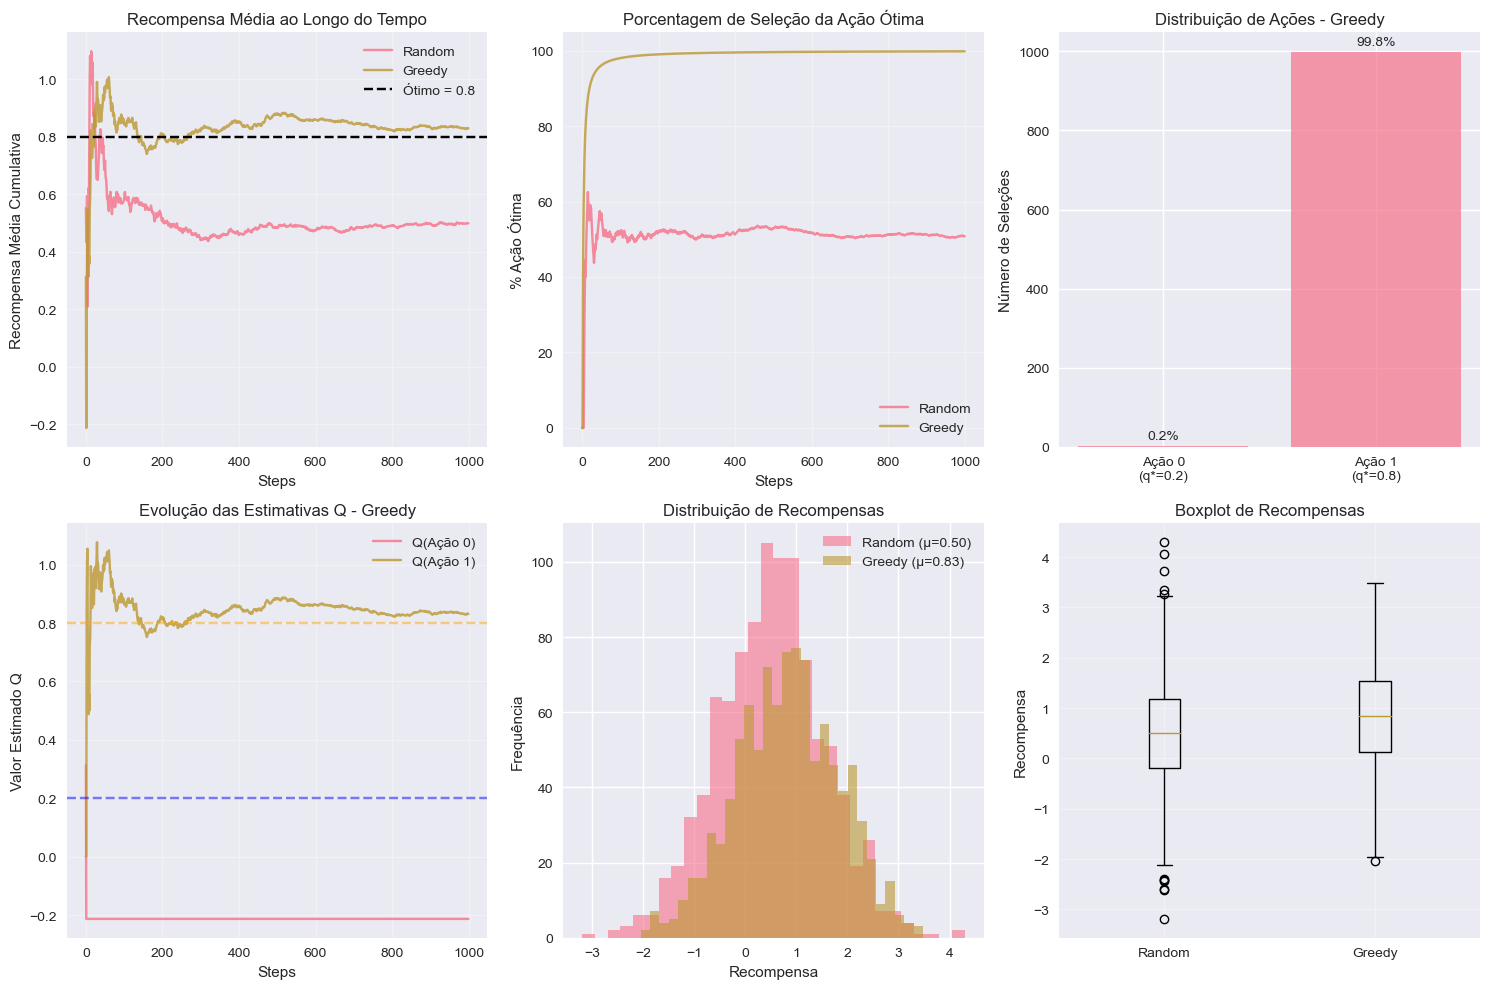


--- ESTATÍSTICAS FINAIS ---
Random:
  Recompensa média: 0.499
  % Ação ótima: 50.8%
Greedy:
  Recompensa média: 0.829
  % Ação ótima: 99.8%
  Q final: [-0.2131153   0.83121347]
  Erro nas estimativas: [0.4131153  0.03121347]


In [3]:
## 2. Two-Armed Bandit - Introduzindo Escolha

### Implementação Two-Armed Bandit


class TwoArmedBandit:
    """
    Two-armed bandit com duas ações possíveis
    """
    def __init__(self, true_values: List[float] = [0.2, 0.8], variance: float = 1.0):
        self.true_values = np.array(true_values)
        self.variance = variance
        self.k = len(true_values)
        
    def pull(self, action: int) -> float:
        """Puxa a alavanca da ação especificada"""
        if action < 0 or action >= self.k:
            raise ValueError(f"Ação deve estar entre 0 e {self.k-1}")
        return np.random.normal(self.true_values[action], self.variance)
    
    def get_optimal_action(self) -> int:
        """Retorna a ação com maior valor verdadeiro"""
        return np.argmax(self.true_values)

class SimpleGreedyAgent:
    """
    Agente que usa estratégia greedy simples
    """
    def __init__(self, k: int):
        self.k = k
        self.q_values = np.zeros(k)  # Valores estimados
        self.action_counts = np.zeros(k)  # Contador de ações
        
    def select_action(self) -> int:
        """Seleciona ação com maior valor estimado (greedy)"""
        # Se há empate, escolhe aleatoriamente entre as melhores
        max_value = np.max(self.q_values)
        best_actions = np.where(self.q_values == max_value)[0]
        return np.random.choice(best_actions)
    
    def update(self, action: int, reward: float):
        """Atualiza estimativas usando sample-average"""
        self.action_counts[action] += 1
        n = self.action_counts[action]
        # Atualização incremental: Q_n+1 = Q_n + (1/n)[R_n - Q_n]
        self.q_values[action] += (1.0/n) * (reward - self.q_values[action])
    
    def reset(self):
        """Reseta o agente para estado inicial"""
        self.q_values = np.zeros(self.k)
        self.action_counts = np.zeros(self.k)

class RandomAgent:
    """
    Agente que seleciona ações aleatoriamente (baseline)
    """
    def __init__(self, k: int):
        self.k = k
        
    def select_action(self) -> int:
        return np.random.randint(0, self.k)
    
    def update(self, action: int, reward: float):
        pass  # Agente aleatório não aprende
    
    def reset(self):
        """Reseta o agente para estado inicial"""
        pass  # Nada para resetar no agente aleatório

def experiment_two_armed():
    """Experimento comparando estratégias no two-armed bandit"""
    print("\n=== EXPERIMENTO 2: TWO-ARMED BANDIT ===")
    
    # Configuração
    true_values = [0.2, 0.8]  # Ação 1 é melhor
    bandit = TwoArmedBandit(true_values)
    n_steps = 1000
    
    # Agentes
    agents = {
        'Random': RandomAgent(k=2),
        'Greedy': SimpleGreedyAgent(k=2)
    }
    
    results = {}
    
    for agent_name, agent in agents.items():
        print(f"Executando {agent_name}...")
        
        rewards = []
        actions = []
        optimal_actions = []
        q_estimates = []
        
        optimal_action = bandit.get_optimal_action()
        
        for step in range(n_steps):
            action = agent.select_action()
            reward = bandit.pull(action)
            agent.update(action, reward)
            
            rewards.append(reward)
            actions.append(action)
            optimal_actions.append(1 if action == optimal_action else 0)
            
            # Salva estimativas Q (se aplicável)
            if hasattr(agent, 'q_values'):
                q_estimates.append(agent.q_values.copy())
        
        results[agent_name] = {
            'rewards': rewards,
            'actions': actions, 
            'optimal_actions': optimal_actions,
            'q_estimates': q_estimates if q_estimates else None
        }
    
    # Visualização
    plt.figure(figsize=(15, 10))
    
    # 1. Recompensa média cumulativa
    plt.subplot(2, 3, 1)
    for agent_name, result in results.items():
        cumulative_reward = np.cumsum(result['rewards']) / np.arange(1, n_steps + 1)
        plt.plot(cumulative_reward, label=agent_name, alpha=0.8)
    
    plt.axhline(true_values[optimal_action], color='black', linestyle='--', 
                label=f'Ótimo = {true_values[optimal_action]}')
    plt.xlabel('Steps')
    plt.ylabel('Recompensa Média Cumulativa')
    plt.title('Recompensa Média ao Longo do Tempo')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. Porcentagem de ação ótima
    plt.subplot(2, 3, 2)
    for agent_name, result in results.items():
        optimal_pct = np.cumsum(result['optimal_actions']) / np.arange(1, n_steps + 1) * 100
        plt.plot(optimal_pct, label=agent_name, alpha=0.8)
    
    plt.xlabel('Steps')
    plt.ylabel('% Ação Ótima')
    plt.title('Porcentagem de Seleção da Ação Ótima')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. Distribuição de ações para Greedy
    plt.subplot(2, 3, 3)
    greedy_actions = results['Greedy']['actions']
    action_counts = [greedy_actions.count(i) for i in range(2)]
    bars = plt.bar(['Ação 0\n(q*=0.2)', 'Ação 1\n(q*=0.8)'], action_counts, alpha=0.7)
    plt.ylabel('Número de Seleções')
    plt.title('Distribuição de Ações - Greedy')
    
    # Adiciona porcentagens
    for i, (bar, count) in enumerate(zip(bars, action_counts)):
        pct = count / n_steps * 100
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
                f'{pct:.1f}%', ha='center', va='bottom')
    
    # 4. Evolução das estimativas Q para Greedy
    if results['Greedy']['q_estimates']:
        plt.subplot(2, 3, 4)
        q_estimates = np.array(results['Greedy']['q_estimates'])
        plt.plot(q_estimates[:, 0], label='Q(Ação 0)', alpha=0.8)
        plt.plot(q_estimates[:, 1], label='Q(Ação 1)', alpha=0.8)
        plt.axhline(true_values[0], color='blue', linestyle='--', alpha=0.5)
        plt.axhline(true_values[1], color='orange', linestyle='--', alpha=0.5)
        plt.xlabel('Steps')
        plt.ylabel('Valor Estimado Q')
        plt.title('Evolução das Estimativas Q - Greedy')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # 5. Histograma de recompensas
    plt.subplot(2, 3, 5)
    for agent_name, result in results.items():
        plt.hist(result['rewards'], bins=30, alpha=0.6, 
                label=f'{agent_name} (μ={np.mean(result["rewards"]):.2f})')
    plt.xlabel('Recompensa')
    plt.ylabel('Frequência')
    plt.title('Distribuição de Recompensas')
    plt.legend()
    
    # 6. Boxplot comparativo
    plt.subplot(2, 3, 6)
    reward_data = [result['rewards'] for result in results.values()]
    plt.boxplot(reward_data, labels=list(results.keys()))
    plt.ylabel('Recompensa')
    plt.title('Boxplot de Recompensas')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Estatísticas finais
    print("\n--- ESTATÍSTICAS FINAIS ---")
    for agent_name, result in results.items():
        final_reward = np.mean(result['rewards'])
        final_optimal_pct = np.mean(result['optimal_actions']) * 100
        print(f"{agent_name}:")
        print(f"  Recompensa média: {final_reward:.3f}")
        print(f"  % Ação ótima: {final_optimal_pct:.1f}%")
        
        if result['q_estimates']:
            final_q = result['q_estimates'][-1]
            print(f"  Q final: {final_q}")
            print(f"  Erro nas estimativas: {np.abs(final_q - true_values)}")

# Executa experimento
experiment_two_armed()


=== EXPERIMENTO 3: ε-GREEDY NO TWO-ARMED BANDIT ===
Executando ε=0.0...
Executando ε=0.01...
Executando ε=0.1...
Executando ε=0.3...


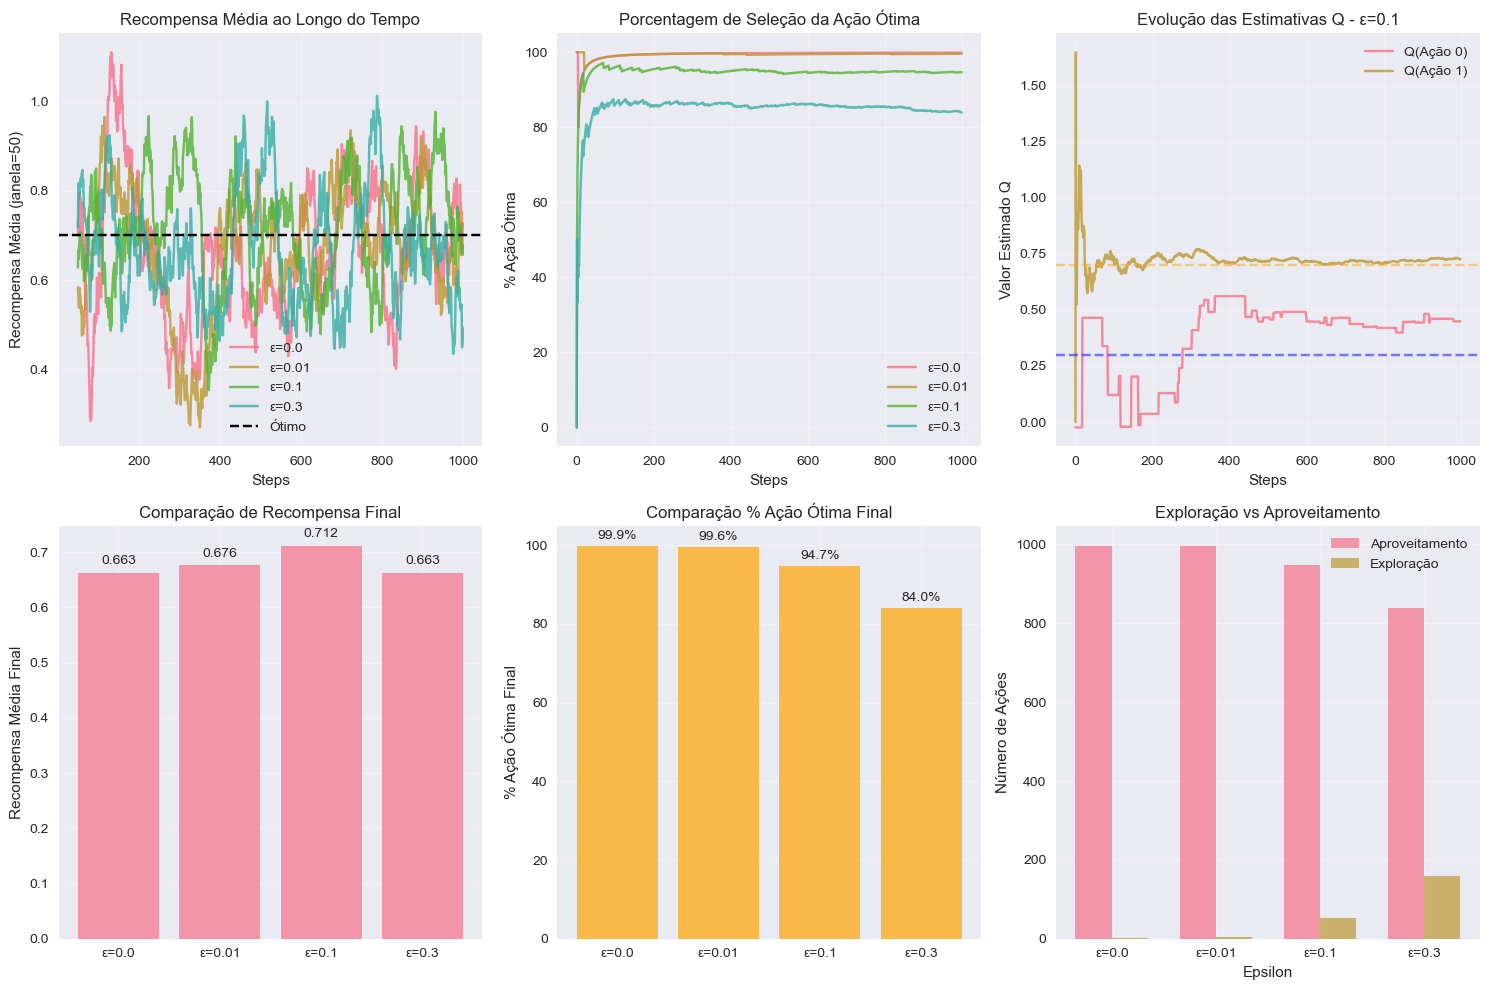


--- ANÁLISE DETALHADA ε-GREEDY ---

ε=0.0:
  Recompensa média: 0.663
  % Ação ótima: 99.9%
  Q final: [-0.50589001  0.66369221]
  % Ótima teórica: 100.0%
  Diferença teoria-prática: 0.1%

ε=0.01:
  Recompensa média: 0.676
  % Ação ótima: 99.6%
  Q final: [0.00130803 0.67871818]
  % Ótima teórica: 99.5%
  Diferença teoria-prática: 0.1%

ε=0.1:
  Recompensa média: 0.712
  % Ação ótima: 94.7%
  Q final: [0.44896961 0.72627309]
  % Ótima teórica: 95.0%
  Diferença teoria-prática: 0.3%

ε=0.3:
  Recompensa média: 0.663
  % Ação ótima: 84.0%
  Q final: [0.34930933 0.72254546]
  % Ótima teórica: 85.0%
  Diferença teoria-prática: 1.0%


In [10]:
## 3. ε-Greedy Agent - Balanceando Exploração e Aproveitamento

### Implementação ε-Greedy

class EpsilonGreedyAgent:
    """
    Agente ε-greedy que balanceia exploração e exploração
    """
    def __init__(self, k: int, epsilon: float = 0.1, alpha: float = None, 
                 initial_value: float = 0.0):
        self.k = k
        self.epsilon = epsilon
        self.alpha = alpha  # Se None, usa sample-average
        self.initial_value = initial_value  # Salva para reset
        self.q_values = np.full(k, initial_value)
        self.action_counts = np.zeros(k)
        
    def select_action(self) -> int:
        """Seleção ε-greedy"""
        if np.random.random() < self.epsilon:
            # Exploração: ação aleatória
            return np.random.randint(0, self.k)
        else:
            # Exploração: ação greedy
            max_value = np.max(self.q_values)
            best_actions = np.where(self.q_values == max_value)[0]
            return np.random.choice(best_actions)
    
    def update(self, action: int, reward: float):
        """Atualiza valores Q"""
        self.action_counts[action] += 1
        
        if self.alpha is None:
            # Sample-average: α = 1/n
            step_size = 1.0 / self.action_counts[action]
        else:
            # Constant step-size
            step_size = self.alpha
        
        # Atualização incremental
        self.q_values[action] += step_size * (reward - self.q_values[action])
    
    def reset(self):
        """Reseta o agente para estado inicial"""
        self.q_values = np.full(self.k, self.initial_value)
        self.action_counts = np.zeros(self.k)

def experiment_epsilon_greedy():
    """Experimento comparando diferentes valores de epsilon"""
    print("\n=== EXPERIMENTO 3: ε-GREEDY NO TWO-ARMED BANDIT ===")
    
    # Configuração
    true_values = [0.3, 0.7]
    bandit = TwoArmedBandit(true_values)
    n_steps = 1000
    epsilon_values = [0.0, 0.01, 0.1, 0.3]
    
    results = {}
    
    for epsilon in epsilon_values:
        agent_name = f'ε={epsilon}'
        print(f"Executando {agent_name}...")
        
        agent = EpsilonGreedyAgent(k=2, epsilon=epsilon)
        
        rewards = []
        optimal_actions = []
        q_estimates = []
        actions_taken = []
        
        optimal_action = bandit.get_optimal_action()
        
        for step in range(n_steps):
            action = agent.select_action()
            reward = bandit.pull(action)
            agent.update(action, reward)
            
            rewards.append(reward)
            optimal_actions.append(1 if action == optimal_action else 0)
            q_estimates.append(agent.q_values.copy())
            actions_taken.append(action)
        
        results[agent_name] = {
            'rewards': rewards,
            'optimal_actions': optimal_actions,
            'q_estimates': q_estimates,
            'actions': actions_taken,
            'epsilon': epsilon
        }
    
    # Visualização
    plt.figure(figsize=(15, 10))
    
    # 1. Recompensa média
    plt.subplot(2, 3, 1)
    for agent_name, result in results.items():
        # Média móvel para suavizar
        window = 50
        rewards_smooth = pd.Series(result['rewards']).rolling(window).mean()
        plt.plot(rewards_smooth, label=agent_name, alpha=0.8)
    
    plt.axhline(true_values[bandit.get_optimal_action()], 
                color='black', linestyle='--', label='Ótimo')
    plt.xlabel('Steps')
    plt.ylabel('Recompensa Média (janela=50)')
    plt.title('Recompensa Média ao Longo do Tempo')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. % Ação ótima
    plt.subplot(2, 3, 2)
    for agent_name, result in results.items():
        optimal_pct = np.cumsum(result['optimal_actions']) / np.arange(1, n_steps + 1) * 100
        plt.plot(optimal_pct, label=agent_name, alpha=0.8)
    
    plt.xlabel('Steps')
    plt.ylabel('% Ação Ótima')
    plt.title('Porcentagem de Seleção da Ação Ótima')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. Evolução das estimativas Q
    plt.subplot(2, 3, 3)
    epsilon_to_plot = 0.1  # Escolhe um epsilon para detalhar
    agent_name = f'ε={epsilon_to_plot}'
    if agent_name in results:
        q_estimates = np.array(results[agent_name]['q_estimates'])
        plt.plot(q_estimates[:, 0], label='Q(Ação 0)', alpha=0.8)
        plt.plot(q_estimates[:, 1], label='Q(Ação 1)', alpha=0.8)
        plt.axhline(true_values[0], color='blue', linestyle='--', alpha=0.5)
        plt.axhline(true_values[1], color='orange', linestyle='--', alpha=0.5)
        plt.xlabel('Steps')
        plt.ylabel('Valor Estimado Q')
        plt.title(f'Evolução das Estimativas Q - {agent_name}')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # 4. Comparação final de desempenho
    plt.subplot(2, 3, 4)
    final_rewards = [np.mean(result['rewards']) for result in results.values()]
    final_optimal = [np.mean(result['optimal_actions']) * 100 for result in results.values()]
    
    bars = plt.bar(range(len(epsilon_values)), final_rewards, alpha=0.7)
    plt.xticks(range(len(epsilon_values)), [f'ε={eps}' for eps in epsilon_values])
    plt.ylabel('Recompensa Média Final')
    plt.title('Comparação de Recompensa Final')
    plt.grid(True, alpha=0.3)
    
    # Adiciona valores nas barras
    for bar, reward in zip(bars, final_rewards):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{reward:.3f}', ha='center', va='bottom')
    
    # 5. % Ação ótima final
    plt.subplot(2, 3, 5)
    bars = plt.bar(range(len(epsilon_values)), final_optimal, alpha=0.7, color='orange')
    plt.xticks(range(len(epsilon_values)), [f'ε={eps}' for eps in epsilon_values])
    plt.ylabel('% Ação Ótima Final')
    plt.title('Comparação % Ação Ótima Final')
    plt.grid(True, alpha=0.3)
    
    for bar, pct in zip(bars, final_optimal):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{pct:.1f}%', ha='center', va='bottom')
    
    # 6. Análise de exploração vs exploração
    plt.subplot(2, 3, 6)
    exploration_counts = []
    exploitation_counts = []
    
    for epsilon in epsilon_values:
        agent_name = f'ε={epsilon}'
        actions = results[agent_name]['actions']
        q_estimates = results[agent_name]['q_estimates']
        
        exploration = 0
        exploitation = 0
        
        for step, (action, q_vals) in enumerate(zip(actions, q_estimates)):
            if step == 0:
                continue
            # Se a ação não é greedy, considera exploração
            greedy_action = np.argmax(q_vals)
            if action == greedy_action:
                exploitation += 1
            else:
                exploration += 1
        
        exploration_counts.append(exploration)
        exploitation_counts.append(exploitation)
    
    x = np.arange(len(epsilon_values))
    width = 0.35
    
    plt.bar(x - width/2, exploitation_counts, width, label='Aproveitamento', alpha=0.7)
    plt.bar(x + width/2, exploration_counts, width, label='Exploração', alpha=0.7)
    
    plt.xlabel('Epsilon')
    plt.ylabel('Número de Ações')
    plt.title('Exploração vs Aproveitamento')
    plt.xticks(x, [f'ε={eps}' for eps in epsilon_values])
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Estatísticas detalhadas
    print("\n--- ANÁLISE DETALHADA ε-GREEDY ---")
    for agent_name, result in results.items():
        epsilon = result['epsilon']
        final_reward = np.mean(result['rewards'])
        final_optimal_pct = np.mean(result['optimal_actions']) * 100
        
        print(f"\n{agent_name}:")
        print(f"  Recompensa média: {final_reward:.3f}")
        print(f"  % Ação ótima: {final_optimal_pct:.1f}%")
        print(f"  Q final: {result['q_estimates'][-1]}")
        
        # Análise teórica vs prática
        theoretical_optimal_pct = (1 - epsilon + epsilon/2) * 100
        print(f"  % Ótima teórica: {theoretical_optimal_pct:.1f}%")
        print(f"  Diferença teoria-prática: {abs(final_optimal_pct - theoretical_optimal_pct):.1f}%")

# Executa experimento
experiment_epsilon_greedy()

# Inicialização Otimista - Encorajando Exploração Através de Otimismo

## 🎯 **Conceito Central: Optimismo Face à Incerteza**

A inicialização otimista é uma **estratégia elegante** para resolver o problema fundamental do método greedy:
> "Como forçar exploração sem sacrificar a natureza greedy do algoritmo?"

**Solução**: "Seja otimista sobre ações não testadas!"

---

## 🧠 **Fundamento Teórico: O Princípio do Otimismo**

### **Filosofia do Algoritmo**
```
"Se não sei quão boa é uma ação, vou assumir que ela é MUITO boa 
até que a experiência prove o contrário."
```

### **Mecanismo Psicológico**
1. **Inicialização**: Qt(a) = valor otimista (ex: 5.0)
2. **Primeira seleção**: Qualquer ação parece "fantástica"
3. **Realidade**: Recompensa observada < expectativa otimista
4. **"Decepção"**: Qt(a) diminui em direção ao valor real
5. **Alternância**: Agente "abandona" ação e tenta outra
6. **Exploração forçada**: Todas as ações são experimentadas antes da convergência

### **Elegância Matemática**
- **Sem modificar** a regra de seleção greedy: At = argmax Qt(a)
- **Sem parâmetros extras** como ε no ε-greedy
- **Auto-regulação**: Exploração diminui naturalmente com o tempo

---

## 🔬 **Função experiment_optimistic_initialization(): Comparação Sistemática**

### **Configuração Experimental**

```python
def experiment_optimistic_initialization():
    # Ambiente padrão
    true_values = [0.2, 0.8]  # Diferença clara para análise
    n_steps = 1000
    
    # Três estratégias comparadas
    agents = {
        'ε-greedy (ε=0.1)': EpsilonGreedyAgent(k=2, epsilon=0.1, initial_value=0.0),
        'Greedy Otimista (Q₀=5)': EpsilonGreedyAgent(k=2, epsilon=0.0, 
                                                      initial_value=5.0, alpha=0.1),
        'Greedy Realístico (Q₀=0)': EpsilonGreedyAgent(k=2, epsilon=0.0, 
                                                        initial_value=0.0)
    }
```

### **Agentes Comparados: Por que Cada Um?**

#### **1. ε-greedy (ε=0.1)**
- **Propósito**: Baseline estabelecido de exploração
- **Características**: 10% exploração aleatória contínua
- **Expectativa**: Performance estável mas com "desperdício" de exploração

#### **2. Greedy Otimista (Q₀=5)**
- **Inovação central**: Q₀ = 5.0 >> max q*(a) = 0.8
- **α = 0.1**: Constant step-size para manter influência do otimismo
- **Expectativa**: Exploração inicial intensa, depois converge para greedy puro

#### **3. Greedy Realístico (Q₀=0)**
- **Controle negativo**: Mostra problema do greedy tradicional
- **Expectativa**: Pode ficar "preso" na primeira ação que der recompensa positiva

---

## 📊 **Análise Detalhada das Visualizações**

### **Gráfico 1: % Ação Ótima ao Longo do Tempo**

```python
optimal_pct = np.cumsum(result['optimal_actions']) / np.arange(1, n_steps + 1) * 100
plt.plot(optimal_pct, label=agent_name, alpha=0.8, linewidth=2)
```

**Padrões Esperados:**

**ε-greedy:**
- Subida **gradual** e **monotônica**
- Assíntota em ~**90%** (nunca chega a 100% devido ao ε)
- **Estabilidade**: Pouca variabilidade após convergência

**Greedy Otimista:**
- **Fase 1** (0-100 steps): Performance inicial **baixa** (mais exploratório)
- **Fase 2** (100-400 steps): **Subida rápida** conforme descobre ação ótima
- **Fase 3** (400+ steps): **Convergência superior** (~95%+, sem ε limitando)

**Greedy Realístico:**
- **Altamente variável** entre execuções
- Ou **converge rápido** para ~100% (sorte), ou **fica preso** em ~0%

### **Gráfico 2: Recompensa Média com Janela Móvel**

```python
window = 50
rewards_smooth = pd.Series(result['rewards']).rolling(window).mean()
```

**Por que Janela Móvel?**
- **Suaviza** variabilidade estocástica das recompensas
- **Revela** tendências de longo prazo no aprendizado
- **Facilita** comparação visual entre algoritmos

**Interpretação:**
- **Linha horizontal preta**: Recompensa ótima teórica (0.8)
- **Convergência**: Quão próximo cada algoritmo chega do ótimo
- **Velocidade**: Quão rapidamente alcança performance alta

### **Gráfico 3: Evolução das Estimativas Q (Otimista)**

```python
agent_name = 'Greedy Otimista (Q₀=5)'
q_estimates = np.array(results[agent_name]['q_estimates'])
plt.plot(q_estimates[:, 0], label='Q(Ação 0)', alpha=0.8)
plt.plot(q_estimates[:, 1], label='Q(Ação 1)', alpha=0.8)
```

**Demonstração do Mecanismo:**
- **Início**: Ambas as estimativas em Q₀ = 5.0
- **Decaimento**: Conforme ações são tentadas, Qt(a) → q*(a)
- **"Decepção"**: Valores caem de 5.0 para valores reais (0.2 e 0.8)
- **Alternância**: Agente muda de ação quando uma "decepciona"

### **Gráfico 4: Análise por Fases do Aprendizado**

```python
phases = [(0, 100), (100, 300), (300, 1000)]
phase_names = ['Inicial\n(0-100)', 'Intermediária\n(100-300)', 'Final\n(300-1000)']
```

**Por que Análise por Fases?**
- **Fase Inicial**: Mostra comportamento exploratório
- **Fase Intermediária**: Transição para exploração
- **Fase Final**: Performance assintótica

**Insights Esperados:**
- **Otimista**: Baixo inicial, alto final
- **ε-greedy**: Crescimento constante em todas as fases
- **Realístico**: Altamente dependente de sorte inicial

### **Gráfico 5: Distribuição de Ações (Primeiros 200 Steps)**

```python
early_steps = 200
action_0_counts = [early_actions.count(0) for early_actions in early_action_lists]
action_1_counts = [early_actions.count(1) for early_actions in early_action_lists]
```

**Diagnóstico da Exploração:**
- **Otimista**: Deveria mostrar **distribuição balanceada** (exploração forçada)
- **ε-greedy**: **Ligeiramente favorecendo** ação ótima (90% greedy)
- **Realístico**: **Altamente desbalanceado** (ficar preso na primeira ação "boa")

### **Gráfico 6: Convergência das Estimativas Q (Log Scale)**

```python
error = np.mean(np.abs(q_estimates[step] - true_values))
plt.yscale('log')  # Escala log para melhor visualização
```

**Métricas de Convergência:**
- **Erro absoluto médio**: |Qt(a) - q*(a)|
- **Escala logarítmica**: Visualiza ordens de magnitude
- **Comparação**: Qual algoritmo converge mais rápido e precisamente

---

## 🛠️ **Experimentos Sugeridos para Modificação**

### **1. Experimento: Sensibilidade ao Valor Inicial Otimista**

```python
# Teste diferentes níveis de otimismo
initial_values = [0.5, 1.0, 2.0, 5.0, 10.0, 20.0]
true_values = [0.3, 0.7]

results_by_optimism = {}

plt.figure(figsize=(18, 12))

for i, init_val in enumerate(initial_values):
    # Subplots para cada nível de otimismo
    plt.subplot(2, 3, i+1)
    
    bandit = TwoArmedBandit(true_values=true_values, variance=1.0)
    agent = EpsilonGreedyAgent(k=2, epsilon=0.0, initial_value=init_val, alpha=0.1)
    
    q_estimates = []
    optimal_actions = []
    
    for step in range(500):
        action = agent.select_action()
        reward = bandit.pull(action)
        agent.update(action, reward)
        
        q_estimates.append(agent.q_values.copy())
        optimal_actions.append(1 if action == bandit.get_optimal_action() else 0)
    
    # Evolução das estimativas Q
    q_estimates = np.array(q_estimates)
    plt.plot(q_estimates[:, 0], label='Q(Ação 0)', alpha=0.8)
    plt.plot(q_estimates[:, 1], label='Q(Ação 1)', alpha=0.8)
    plt.axhline(true_values[0], color='blue', linestyle='--', alpha=0.5)
    plt.axhline(true_values[1], color='orange', linestyle='--', alpha=0.5)
    
    plt.title(f'Q₀ = {init_val}')
    plt.xlabel('Steps')
    plt.ylabel('Valor Estimado Q')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Armazena performance final
    final_performance = np.mean(optimal_actions[-100:]) * 100
    results_by_optimism[init_val] = final_performance

plt.tight_layout()
plt.show()

# Análise de sensibilidade
plt.figure(figsize=(10, 6))
optimism_levels = list(results_by_optimism.keys())
performances = list(results_by_optimism.values())

plt.plot(optimism_levels, performances, 'bo-', linewidth=2, markersize=8)
plt.axhline(max(true_values), color='red', linestyle='--', 
            label=f'q* máximo = {max(true_values)}')
plt.xlabel('Valor Inicial Otimista (Q₀)')
plt.ylabel('% Ação Ótima (últimos 100 steps)')
plt.title('Sensibilidade ao Nível de Otimismo')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("Performance por Nível de Otimismo:")
for opt, perf in results_by_optimism.items():
    print(f"Q₀ = {opt:4.1f}: {perf:5.1f}% ação ótima")
```

### **2. Experimento: Otimista vs ε-greedy em Diferentes Cenários**

```python
# Teste em cenários com diferentes dificuldades
scenarios = [
    {"values": [0.45, 0.55], "name": "Gap Pequeno", "difficulty": "Difícil"},
    {"values": [0.3, 0.7], "name": "Gap Médio", "difficulty": "Moderado"}, 
    {"values": [0.1, 0.9], "name": "Gap Grande", "difficulty": "Fácil"},
    {"values": [-0.5, 0.5], "name": "Uma Negativa", "difficulty": "Especial"}
]

plt.figure(figsize=(20, 15))

for i, scenario in enumerate(scenarios):
    true_vals = scenario["values"]
    
    # Configuração dos agentes
    agents = {
        'ε-greedy (ε=0.1)': EpsilonGreedyAgent(k=2, epsilon=0.1, initial_value=0.0),
        'Otimista (Q₀=2)': EpsilonGreedyAgent(k=2, epsilon=0.0, 
                                              initial_value=2.0, alpha=0.1)
    }
    
    scenario_results = {}
    
    for agent_name, agent in agents.items():
        bandit = TwoArmedBandit(true_values=true_vals, variance=1.0)
        agent.reset()  # Importante: reset para novo cenário
        
        optimal_actions = []
        rewards = []
        
        for step in range(1000):
            action = agent.select_action()
            reward = bandit.pull(action)
            agent.update(action, reward)
            
            optimal_actions.append(1 if action == bandit.get_optimal_action() else 0)
            rewards.append(reward)
        
        scenario_results[agent_name] = {
            'optimal_actions': optimal_actions,
            'rewards': rewards
        }
    
    # Plot % ação ótima
    plt.subplot(4, 3, i*3 + 1)
    for agent_name, result in scenario_results.items():
        optimal_pct = np.cumsum(result['optimal_actions']) / np.arange(1, 1001) * 100
        plt.plot(optimal_pct, label=agent_name, alpha=0.8)
    
    plt.title(f'{scenario["name"]}\nq* = {true_vals}')
    plt.xlabel('Steps')
    plt.ylabel('% Ação Ótima')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot recompensa média
    plt.subplot(4, 3, i*3 + 2)
    for agent_name, result in scenario_results.items():
        rewards_smooth = pd.Series(result['rewards']).rolling(50).mean()
        plt.plot(rewards_smooth, label=agent_name, alpha=0.8)
    
    plt.axhline(max(true_vals), color='black', linestyle='--', alpha=0.5)
    plt.title('Recompensa Média')
    plt.xlabel('Steps')
    plt.ylabel('Recompensa')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot performance final
    plt.subplot(4, 3, i*3 + 3)
    final_performances = []
    agent_names = []
    
    for agent_name, result in scenario_results.items():
        final_perf = np.mean(result['optimal_actions'][-200:]) * 100  # Últimos 200 steps
        final_performances.append(final_perf)
        agent_names.append(agent_name)
    
    bars = plt.bar(agent_names, final_performances, alpha=0.7)
    plt.title('Performance Final')
    plt.ylabel('% Ação Ótima')
    plt.xticks(rotation=45, ha='right')
    
    # Adiciona valores nas barras
    for bar, perf in zip(bars, final_performances):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{perf:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()
```

### **3. Experimento: Efeito do Step-Size α na Inicialização Otimista**

```python
# Analisa como α afeta a persistência do otimismo
alphas = [0.01, 0.05, 0.1, 0.2, 0.5]
true_values = [0.2, 0.8]
initial_value = 5.0

plt.figure(figsize=(18, 10))

for i, alpha in enumerate(alphas):
    plt.subplot(2, 3, i+1)
    
    bandit = TwoArmedBandit(true_values=true_values, variance=1.0)
    agent = EpsilonGreedyAgent(k=2, epsilon=0.0, initial_value=initial_value, alpha=alpha)
    
    q_estimates = []
    optimal_actions = []
    
    for step in range(500):
        action = agent.select_action()
        reward = bandit.pull(action)
        agent.update(action, reward)
        
        q_estimates.append(agent.q_values.copy())
        optimal_actions.append(1 if action == bandit.get_optimal_action() else 0)
    
    # Plot evolução das estimativas Q
    q_estimates = np.array(q_estimates)
    plt.plot(q_estimates[:, 0], label='Q(Ação 0)', alpha=0.8)
    plt.plot(q_estimates[:, 1], label='Q(Ação 1)', alpha=0.8)
    plt.axhline(true_values[0], color='blue', linestyle='--', alpha=0.5)
    plt.axhline(true_values[1], color='orange', linestyle='--', alpha=0.5)
    
    plt.title(f'α = {alpha}')
    plt.xlabel('Steps')
    plt.ylabel('Valor Estimado Q')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Análise de quando o otimismo "acaba"
    initial_influence = initial_value
    for step, q_vals in enumerate(q_estimates):
        if max(q_vals) < initial_influence * 0.1:  # 10% do valor inicial
            print(f"α = {alpha}: Otimismo 'desaparece' no step {step}")
            break

plt.tight_layout()
plt.show()
```

### **4. Experimento: Comparação de Robustez em Múltiplas Execuções**

```python
# Testa consistência dos algoritmos ao longo de múltiplas execuções
n_experiments = 20
true_values = [0.3, 0.7]

algorithms = {
    'ε-greedy (ε=0.1)': {'epsilon': 0.1, 'initial_value': 0.0, 'alpha': None},
    'Otimista (Q₀=3)': {'epsilon': 0.0, 'initial_value': 3.0, 'alpha': 0.1},
    'Greedy Realístico': {'epsilon': 0.0, 'initial_value': 0.0, 'alpha': None}
}

results_distribution = {name: [] for name in algorithms.keys()}

for experiment in range(n_experiments):
    print(f"Experimento {experiment + 1}/{n_experiments}")
    
    for alg_name, params in algorithms.items():
        bandit = TwoArmedBandit(true_values=true_values, variance=1.0)
        agent = EpsilonGreedyAgent(k=2, **params)
        
        optimal_actions = []
        
        for step in range(1000):
            action = agent.select_action()
            reward = bandit.pull(action)
            agent.update(action, reward)
            
            optimal_actions.append(1 if action == bandit.get_optimal_action() else 0)
        
        # Performance final
        final_performance = np.mean(optimal_actions[-200:]) * 100
        results_distribution[alg_name].append(final_performance)

# Visualização da distribuição de resultados
plt.figure(figsize=(15, 5))

# Histogramas
plt.subplot(1, 3, 1)
for alg_name, performances in results_distribution.items():
    plt.hist(performances, bins=10, alpha=0.6, label=alg_name, density=True)

plt.xlabel('% Ação Ótima Final')
plt.ylabel('Densidade')
plt.title('Distribuição de Performance\n(20 execuções independentes)')
plt.legend()
plt.grid(True, alpha=0.3)

# Boxplot
plt.subplot(1, 3, 2)
plt.boxplot([results_distribution[name] for name in algorithms.keys()], 
            labels=list(algorithms.keys()))
plt.ylabel('% Ação Ótima Final')
plt.title('Boxplot de Performance')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Estatísticas
plt.subplot(1, 3, 3)
means = [np.mean(results_distribution[name]) for name in algorithms.keys()]
stds = [np.std(results_distribution[name]) for name in algorithms.keys()]

x = range(len(algorithms))
plt.bar(x, means, yerr=stds, alpha=0.7, capsize=5)
plt.xticks(x, list(algorithms.keys()), rotation=45, ha='right')
plt.ylabel('% Ação Ótima Final')
plt.title('Média ± Desvio Padrão')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estatísticas detalhadas
print("\n--- ANÁLISE DE ROBUSTEZ ---")
for alg_name, performances in results_distribution.items():
    mean_perf = np.mean(performances)
    std_perf = np.std(performances)
    min_perf = np.min(performances)
    max_perf = np.max(performances)
    
    print(f"\n{alg_name}:")
    print(f"  Média: {mean_perf:.1f}% ± {std_perf:.1f}%")
    print(f"  Range: [{min_perf:.1f}%, {max_perf:.1f}%]")
    print(f"  Consistência: {100 - (std_perf/mean_perf)*100:.1f}%")
```

---

## 🎯 **Parâmetros Chave para Experimentação**

### **Valor Inicial Otimista (`initial_value`):**
- **Q₀ = 1.0**: Otimismo leve (para q* ~ 0.5)
- **Q₀ = 5.0**: Otimismo forte (padrão demonstrativo)
- **Q₀ = 10.0**: Otimismo excessivo (exploração muito longa)

### **Step-Size (`alpha`):**
- **α = 0.1**: Padrão (boa velocidade de adaptação)
- **α = 0.01**: Otimismo persistente (converge lentamente)
- **α = 0.5**: Otimismo rápido de desaparecer

### **Cenário do Ambiente:**
- **Gap pequeno**: [0.45, 0.55] (difícil discriminar)
- **Gap médio**: [0.2, 0.8] (padrão)
- **Gap grande**: [-1.0, 1.0] (fácil discriminar)

---

## 🧠 **Conexões Pedagógicas**

### **Com Aula 2 (Action-Value Methods):**
- **Evolução natural**: Resolve limitação do greedy puro
- **Mesma base matemática**: Sample-average com twist na inicialização
- **Comparação direta**: Com ε-greedy como alternativa

### **Com Aula 4 (Non-Stationary):**
- **Step-size constante**: Necessário para manter influência do otimismo
- **Preparação conceitual**: Para ambientes que mudam

### **Preparação para Conceitos Futuros:**
- **Princípio do otimismo**: Fundamental em UCB, Thompson Sampling
- **Exploration bonuses**: Conceito que reapaparece em RL profundo
- **Inicialização**: Importância em redes neurais

## 💡 **Questões para Discussão**

1. **Por que a inicialização otimista funciona melhor que ε-greedy a longo prazo?**
2. **Quando a inicialização otimista pode falhar?**
3. **Como escolher o valor inicial otimista adequado?**
4. **Qual é o trade-off entre exploração inicial e performance de curto prazo?**

## 🔍 **Pontos-Chave da Demonstração**

- **Elegância**: Resolve exploração sem modificar algoritmo base
- **Adaptabilidade**: Exploração decresce naturalmente
- **Performance superior**: Supera ε-greedy em ambientes estacionários  
- **Limitações**: Não adequado para ambientes não-estacionários
- **Filosofia**: "Otimismo face à incerteza" como princípio geral

Este experimento demonstra uma **abordagem criativa e matematicamente elegante** para o problema da exploração, preparando os estudantes para conceitos mais avançados onde o otimismo é fundamental.


=== EXPERIMENTO 4: INICIALIZAÇÃO OTIMISTA ===
Executando ε-greedy (ε=0.1)...
Executando Greedy Otimista (Q₀=5)...
Executando Greedy Realístico (Q₀=0)...


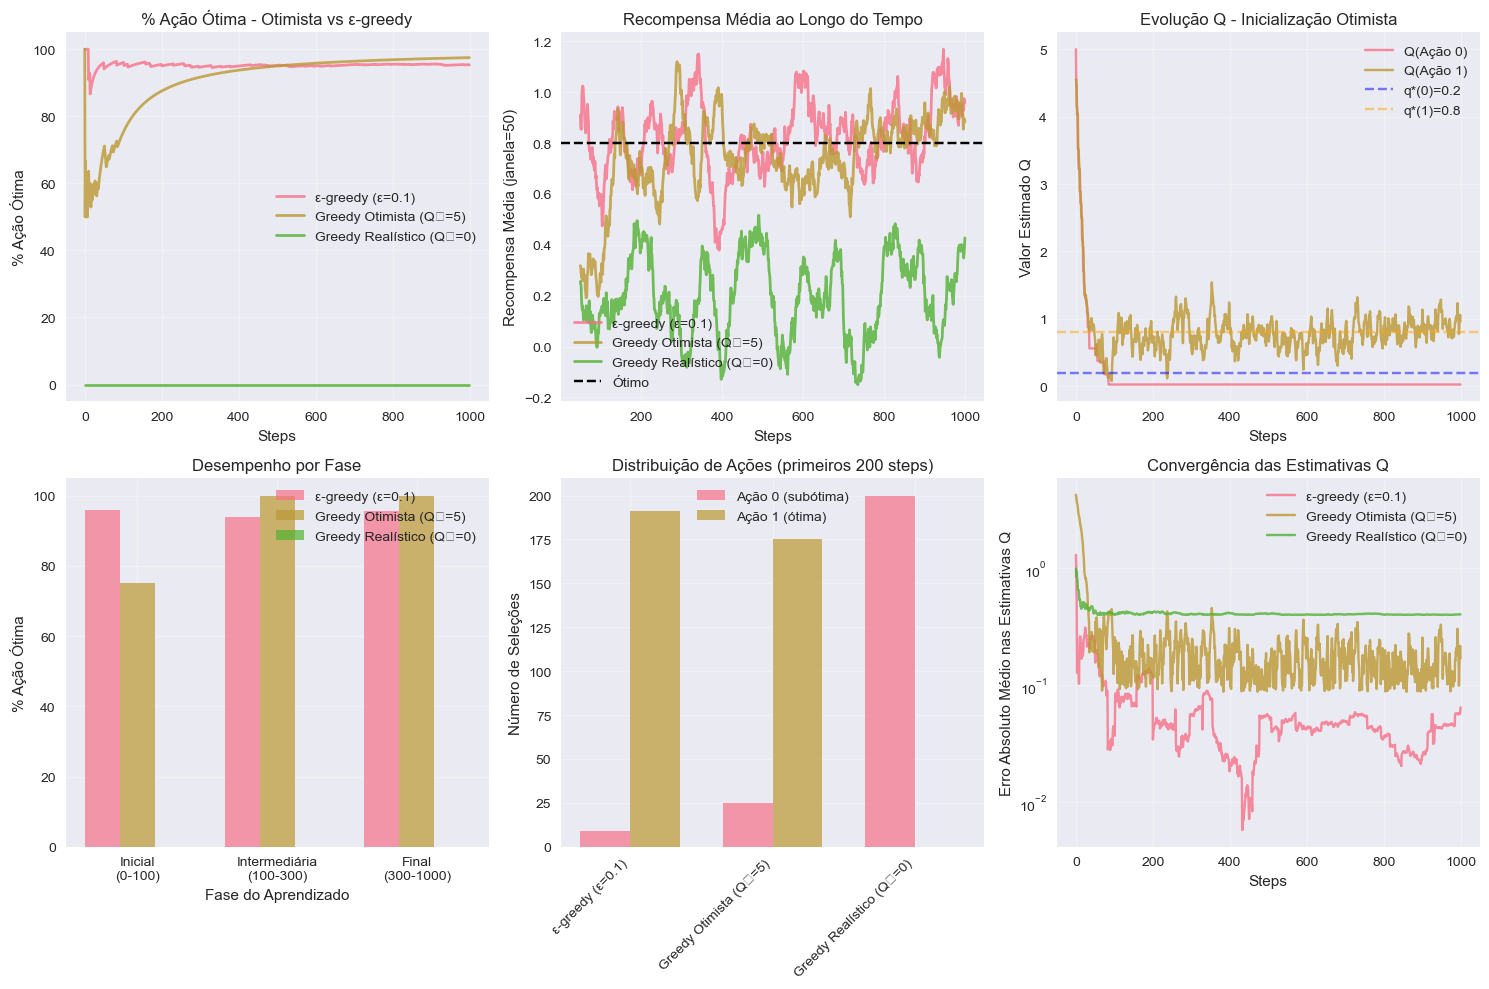


--- ANÁLISE INICIALIZAÇÃO OTIMISTA ---

ε-greedy (ε=0.1):
  Recompensa média final: 0.825
  % Ação ótima final: 95.3%
  Q final: [0.277, 0.852]
  Erro nas estimativas Q: 0.065
  Fases - Inicial: 96.0%, Inter: 94.0%, Final: 95.6%
  Diversidade inicial (primeiros 50 steps): 2/2 ações

Greedy Otimista (Q₀=5):
  Recompensa média final: 0.740
  % Ação ótima final: 97.5%
  Q final: [0.026, 0.965]
  Erro nas estimativas Q: 0.170
  Fases - Inicial: 75.0%, Inter: 100.0%, Final: 100.0%
  Diversidade inicial (primeiros 50 steps): 2/2 ações

Greedy Realístico (Q₀=0):
  Recompensa média final: 0.209
  % Ação ótima final: 0.0%
  Q final: [0.209, 0.000]
  Erro nas estimativas Q: 0.404
  Fases - Inicial: 0.0%, Inter: 0.0%, Final: 0.0%
  Diversidade inicial (primeiros 50 steps): 1/2 ações


In [11]:
## 4. Inicialização Otimista

### Implementação com Valores Iniciais Otimistas

def experiment_optimistic_initialization():
    """Experimento comparando inicialização otimista vs ε-greedy"""
    print("\n=== EXPERIMENTO 4: INICIALIZAÇÃO OTIMISTA ===")
    
    # Configuração
    true_values = [0.2, 0.8]
    bandit = TwoArmedBandit(true_values)
    n_steps = 1000
    
    # Agentes a comparar
    agents = {
        'ε-greedy (ε=0.1)': EpsilonGreedyAgent(k=2, epsilon=0.1, initial_value=0.0),
        'Greedy Otimista (Q₀=5)': EpsilonGreedyAgent(k=2, epsilon=0.0, 
                                                      initial_value=5.0, alpha=0.1),
        'Greedy Realístico (Q₀=0)': EpsilonGreedyAgent(k=2, epsilon=0.0, 
                                                        initial_value=0.0)
    }
    
    results = {}
    
    for agent_name, agent in agents.items():
        print(f"Executando {agent_name}...")
        
        rewards = []
        optimal_actions = []
        q_estimates = []
        actions_taken = []
        
        optimal_action = bandit.get_optimal_action()
        
        for step in range(n_steps):
            action = agent.select_action()
            reward = bandit.pull(action)
            agent.update(action, reward)
            
            rewards.append(reward)
            optimal_actions.append(1 if action == optimal_action else 0)
            q_estimates.append(agent.q_values.copy())
            actions_taken.append(action)
        
        results[agent_name] = {
            'rewards': rewards,
            'optimal_actions': optimal_actions,
            'q_estimates': q_estimates,
            'actions': actions_taken
        }
    
    # Visualização
    plt.figure(figsize=(15, 10))
    
    # 1. % Ação ótima ao longo do tempo
    plt.subplot(2, 3, 1)
    for agent_name, result in results.items():
        optimal_pct = np.cumsum(result['optimal_actions']) / np.arange(1, n_steps + 1) * 100
        plt.plot(optimal_pct, label=agent_name, alpha=0.8, linewidth=2)
    
    plt.xlabel('Steps')
    plt.ylabel('% Ação Ótima')
    plt.title('% Ação Ótima - Otimista vs ε-greedy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. Recompensa média com janela móvel
    plt.subplot(2, 3, 2)
    window = 50
    for agent_name, result in results.items():
        rewards_smooth = pd.Series(result['rewards']).rolling(window).mean()
        plt.plot(rewards_smooth, label=agent_name, alpha=0.8, linewidth=2)
    
    plt.axhline(true_values[bandit.get_optimal_action()], 
                color='black', linestyle='--', label='Ótimo')
    plt.xlabel('Steps')
    plt.ylabel('Recompensa Média (janela=50)')
    plt.title('Recompensa Média ao Longo do Tempo')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. Evolução das estimativas Q - Otimista
    plt.subplot(2, 3, 3)
    agent_name = 'Greedy Otimista (Q₀=5)'
    q_estimates = np.array(results[agent_name]['q_estimates'])
    plt.plot(q_estimates[:, 0], label='Q(Ação 0)', alpha=0.8)
    plt.plot(q_estimates[:, 1], label='Q(Ação 1)', alpha=0.8)
    plt.axhline(true_values[0], color='blue', linestyle='--', alpha=0.5, 
                label=f'q*(0)={true_values[0]}')
    plt.axhline(true_values[1], color='orange', linestyle='--', alpha=0.5,
                label=f'q*(1)={true_values[1]}')
    plt.xlabel('Steps')
    plt.ylabel('Valor Estimado Q')
    plt.title('Evolução Q - Inicialização Otimista')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 4. Comparação das fases de aprendizado
    plt.subplot(2, 3, 4)
    phases = [(0, 100), (100, 300), (300, 1000)]
    phase_names = ['Inicial\n(0-100)', 'Intermediária\n(100-300)', 'Final\n(300-1000)']
    
    width = 0.25
    x = np.arange(len(phase_names))
    
    for i, (agent_name, result) in enumerate(results.items()):
        phase_performance = []
        for start, end in phases:
            phase_optimal = np.mean(result['optimal_actions'][start:end]) * 100
            phase_performance.append(phase_optimal)
        
        plt.bar(x + i*width, phase_performance, width, 
                label=agent_name, alpha=0.7)
    
    plt.xlabel('Fase do Aprendizado')
    plt.ylabel('% Ação Ótima')
    plt.title('Desempenho por Fase')
    plt.xticks(x + width, phase_names)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 5. Distribuição de ações - primeiros 200 steps
    plt.subplot(2, 3, 5)
    early_steps = 200
    agent_names = list(results.keys())
    
    action_0_counts = []
    action_1_counts = []
    
    for agent_name, result in results.items():
        early_actions = result['actions'][:early_steps]
        action_0_counts.append(early_actions.count(0))
        action_1_counts.append(early_actions.count(1))
    
    x = np.arange(len(agent_names))
    width = 0.35
    
    plt.bar(x - width/2, action_0_counts, width, label='Ação 0 (subótima)', alpha=0.7)
    plt.bar(x + width/2, action_1_counts, width, label='Ação 1 (ótima)', alpha=0.7)
    
    plt.ylabel('Número de Seleções')
    plt.title(f'Distribuição de Ações (primeiros {early_steps} steps)')
    plt.xticks(x, agent_names, rotation=45, ha='right')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 6. Convergência das estimativas Q
    plt.subplot(2, 3, 6)
    final_steps = 50  # Últimos 50 steps para análise de convergência
    
    q_errors = {agent_name: [] for agent_name in results.keys()}
    
    for agent_name, result in results.items():
        q_estimates = np.array(result['q_estimates'])
        # Calcula erro absoluto médio das estimativas vs valores verdadeiros
        for step in range(len(q_estimates)):
            error = np.mean(np.abs(q_estimates[step] - true_values))
            q_errors[agent_name].append(error)
    
    for agent_name, errors in q_errors.items():
        plt.plot(errors, label=agent_name, alpha=0.8)
    
    plt.xlabel('Steps')
    plt.ylabel('Erro Absoluto Médio nas Estimativas Q')
    plt.title('Convergência das Estimativas Q')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')  # Escala log para melhor visualização
    
    plt.tight_layout()
    plt.show()
    
    # Análise detalhada
    print("\n--- ANÁLISE INICIALIZAÇÃO OTIMISTA ---")
    
    for agent_name, result in results.items():
        final_reward = np.mean(result['rewards'])
        final_optimal_pct = np.mean(result['optimal_actions']) * 100
        final_q = result['q_estimates'][-1]
        q_error = np.mean(np.abs(final_q - true_values))
        
        # Análise por fases
        phase1_optimal = np.mean(result['optimal_actions'][:100]) * 100  # 0-100
        phase2_optimal = np.mean(result['optimal_actions'][100:300]) * 100  # 100-300
        phase3_optimal = np.mean(result['optimal_actions'][300:]) * 100  # 300+
        
        print(f"\n{agent_name}:")
        print(f"  Recompensa média final: {final_reward:.3f}")
        print(f"  % Ação ótima final: {final_optimal_pct:.1f}%")
        print(f"  Q final: [{final_q[0]:.3f}, {final_q[1]:.3f}]")
        print(f"  Erro nas estimativas Q: {q_error:.3f}")
        print(f"  Fases - Inicial: {phase1_optimal:.1f}%, "
              f"Inter: {phase2_optimal:.1f}%, Final: {phase3_optimal:.1f}%")
        
        # Análise da exploração inicial (importante para otimista)
        early_exploration = len(set(result['actions'][:50]))  # Quantas ações diferentes nos primeiros 50 steps
        print(f"  Diversidade inicial (primeiros 50 steps): {early_exploration}/2 ações")

# Executa experimento
experiment_optimistic_initialization()

# Ten-Armed Testbed - O Experimento Definitivo

## 🎯 **O Salto para a Complexidade Real**

O **10-armed testbed** representa a **transição** dos exemplos didáticos para problemas **próximos da realidade**:

- **Two-armed**: Conceitos fundamentais com escolha binária
- **Ten-armed**: Complexidade que reflete aplicações reais
- **Paradigma experimental**: Metodologia científica rigorosa

Este é o experimento que **replica exatamente** as figuras clássicas do Sutton & Barto (Figure 2.2), estabelecendo a base metodológica para toda pesquisa em RL.

---

## 🏗️ **Classe TenArmedBandit: Ambiente Padrão da Literatura**

### **Especificação Técnica**

```python
class TenArmedBandit:
    def __init__(self, variance: float = 1.0, seed: int = None):
        if seed is not None:
            np.random.seed(seed)
        
        # Valores verdadeiros q*(a) ~ N(0, 1)
        self.true_values = np.random.normal(0, 1, 10)
        self.variance = variance
        self.k = 10
```

### **Atributos Fundamentais**

#### **`self.true_values` (np.array de 10 elementos)**
- **Distribuição padrão**: q*(a) ~ N(0, 1) para a = 0, 1, ..., 9
- **Interpretação**: Cada problema tem valores verdadeiros diferentes
- **Realismo**: Simula cenários onde não sabemos qual ação é melhor
- **Variabilidade**: Alguns problemas são "fáceis", outros "difíceis"

#### **`self.variance` (float)**
- **Valor padrão**: σ² = 1.0 (variância unitária)
- **Função**: Controla ruído nas observações
- **Impacto**: Rt ~ N(q*(a), 1) para cada ação selecionada

#### **Seed Controlado**
- **Reproduzibilidade**: Mesmo seed → mesmos q*(a)
- **Comparação justa**: Todos os algoritmos enfrentam o mesmo conjunto de problemas
- **Validação**: Permite verificar implementações contra resultados conhecidos

### **Métodos da Classe**

#### **`pull(action: int) → float`**
```python
def pull(self, action: int) -> float:
    return np.random.normal(self.true_values[action], self.variance)
```
- **Implementação**: Rt ~ N(q*(At), σ²)
- **Realismo**: Mesma ação pode dar recompensas diferentes

#### **`get_optimal_action() → int` e `get_optimal_value() → float`**
```python
def get_optimal_action(self) -> int:
    return np.argmax(self.true_values)

def get_optimal_value(self) -> float:
    return np.max(self.true_values)
```
- **Avaliação**: Permite calcular métricas de performance
- **Ground truth**: Sabemos qual é a resposta "certa"

---

## 🤖 **Classe UCBAgent: Algoritmo Baseado em Confiança**

### **Fundamento Teórico do UCB**

O **Upper Confidence Bound** implementa o princípio:
> "Seja otimista de forma **proporcional à incerteza**"

### **Atributos do UCBAgent**

```python
def __init__(self, k: int, c: float = 2.0):
    self.k = k
    self.c = c                    # Parâmetro de confiança
    self.q_values = np.zeros(k)   # Estimativas Q_t(a)
    self.action_counts = np.zeros(k)  # N_t(a)
    self.total_steps = 0          # t total
```

#### **`self.c` (float)**
- **Significado**: Nível de confiança / otimismo
- **Valor padrão**: c = 2.0 (funciona bem na prática)
- **Efeito**: c maior → mais exploração, c menor → mais exploração

#### **`self.total_steps` (int)**
- **Função**: Contador global de passos (t)
- **Uso**: Aparece no termo de confiança √(ln(t)/N_t(a))

### **Seleção de Ação UCB**

```python
def select_action(self) -> int:
    self.total_steps += 1
    
    # Primeira prioridade: ações nunca tentadas
    if np.any(self.action_counts == 0):
        return np.random.choice(np.where(self.action_counts == 0)[0])
    
    # UCB formula: Q_t(a) + c√(ln(t)/N_t(a))
    ucb_values = self.q_values + self.c * np.sqrt(
        np.log(self.total_steps) / self.action_counts
    )
    
    return np.argmax(ucb_values)
```

### **Interpretação Matemática da Fórmula UCB**

**UCB_t(a) = Q_t(a) + c√(ln(t)/N_t(a))**

#### **Componentes:**
- **Q_t(a)**: Estimativa atual (exploração)
- **c√(ln(t)/N_t(a))**: Bônus de exploração
- **ln(t)**: Cresce com tempo total (mais oportunidades para explorar)
- **N_t(a)**: Quantas vezes tentou ação a (confiança cresce com experiência)

#### **Comportamento:**
- **Ações pouco tentadas**: Bônus alto → exploração
- **Ações muito tentadas**: Bônus baixo → exploração baseada em Q_t(a)
- **Auto-balanceamento**: Explora até ter confiança suficiente

---

## 🔧 **Função run_single_experiment(): Execução Padronizada**

### **Estrutura de um Experimento Individual**

```python
def run_single_experiment(bandit, agent, n_steps: int):
    rewards = []
    optimal_actions = []
    actions_taken = []
    
    optimal_action = bandit.get_optimal_action()
    
    # Reset agent para garantir estado limpo
    if hasattr(agent, 'reset'):
        agent.reset()
    
    for step in range(n_steps):
        action = agent.select_action()
        reward = bandit.pull(action)
        agent.update(action, reward)
        
        # Coleta métricas
        rewards.append(reward)
        optimal_actions.append(1 if action == optimal_action else 0)
        actions_taken.append(action)
```

### **Por que esta Estrutura?**

#### **Reset do Agente:**
- **Estado limpo**: Cada experimento começa do zero
- **Comparação justa**: Mesmas condições iniciais para todos
- **Isolamento**: Um experimento não afeta o próximo

#### **Métricas Coletadas:**
- **`rewards`**: Para calcular recompensa média ao longo do tempo
- **`optimal_actions`**: Para % de seleção da ação ótima
- **`actions_taken`**: Para análise de comportamento de exploração

---

## 🔬 **Função experiment_ten_armed_testbed(): O Protocolo Completo**

### **Configuração Experimental**

```python
def experiment_ten_armed_testbed():
    # Configuração principal
    n_problems = 200  # Reduzido para demonstração (original: 2000)
    n_steps = 1000
    
    # Suite completa de algoritmos
    agents_config = {
        'Random': {'class': RandomAgent, 'params': {'k': 10}},
        'Greedy': {'class': EpsilonGreedyAgent, 'params': {'k': 10, 'epsilon': 0.0}},
        'ε-greedy (ε=0.01)': {'class': EpsilonGreedyAgent, 'params': {'k': 10, 'epsilon': 0.01}},
        'ε-greedy (ε=0.1)': {'class': EpsilonGreedyAgent, 'params': {'k': 10, 'epsilon': 0.1}},
        'Otimista (Q₀=5)': {'class': EpsilonGreedyAgent, 'params': {
            'k': 10, 'epsilon': 0.0, 'initial_value': 5.0, 'alpha': 0.1}},
        'UCB (c=2)': {'class': UCBAgent, 'params': {'k': 10, 'c': 2.0}}
    }
```

### **Por que Esta Configuração?**

#### **n_problems = 200 (ou 2000 no original):**
- **Estatística robusta**: Lei dos Grandes Números
- **Intervalos de confiança**: Margem de erro pequena
- **Generalização**: Resultados válidos além de casos específicos

#### **n_steps = 1000:**
- **Horizonte adequado**: Permite convergência sem ser excessivo
- **Comparação justa**: Tempo suficiente para todos os algoritmos

#### **Suite de Algoritmos:**
- **Random**: Baseline inferior
- **Greedy**: Mostra problema de ficar "preso"
- **ε-greedy**: Dois valores diferentes de ε
- **Otimista**: Demonstra inicialização criativa
- **UCB**: Algoritmo mais sofisticado

### **Loop Experimental Principal**

```python
# Executa experimentos
for problem in range(n_problems):
    # Cria novo problema
    bandit = TenArmedBandit(seed=problem)  # Seed diferente para cada problema
    
    # Testa cada agente no mesmo problema
    for agent_name, agent_config in agents_config.items():
        agent_class = agent_config['class']
        agent_params = agent_config['params']
        
        agent = agent_class(**agent_params)
        result = run_single_experiment(bandit, agent, n_steps)
        
        all_results[agent_name]['rewards'].append(result['rewards'])
        all_results[agent_name]['optimal_actions'].append(result['optimal_actions'])
```

### **Princípios Experimentais:**

#### **Mesmo Problema, Todos os Agentes:**
- **Controle de variáveis**: Todos enfrentam as mesmas condições
- **Comparação justa**: Diferenças devem-se aos algoritmos, não à sorte

#### **Múltiplos Problemas:**
- **Generalização**: Evita overfitting a problemas específicos
- **Robustez**: Algoritmos devem funcionar em diversos cenários

---

## 📊 **Processamento e Visualização dos Resultados**

### **Agregação Estatística**

```python
# Processa resultados (calcula médias)
processed_results = {}
for agent_name, results in all_results.items():
    rewards_array = np.array(results['rewards'])  # Shape: (n_problems, n_steps)
    optimal_array = np.array(results['optimal_actions'])
    
    processed_results[agent_name] = {
        'avg_reward': np.mean(rewards_array, axis=0),        # Média por step
        'std_reward': np.std(rewards_array, axis=0),         # Desvio padrão
        'avg_optimal': np.mean(optimal_array, axis=0) * 100, # % ótima por step
        'std_optimal': np.std(optimal_array, axis=0) * 100,
        'final_reward': np.mean(rewards_array[:, -1]),       # Performance final
        'final_optimal': np.mean(optimal_array[:, -1]) * 100
    }
```

### **Quatro Visualizações Complementares**

#### **Gráfico 1: Average Reward (Figura 2.2a do Sutton & Barto)**
```python
plt.subplot(2, 2, 1)
for agent_name, result in processed_results.items():
    steps = np.arange(1, n_steps + 1)
    plt.plot(steps, result['avg_reward'], label=agent_name, alpha=0.8)
```

**O que mostra:**
- **Curvas de aprendizado**: Como performance melhora com tempo
- **Velocidade de convergência**: Quão rápido cada algoritmo aprende
- **Performance assintótica**: Nível final de cada algoritmo

**Padrões esperados:**
- **Random**: Linha horizontal em ~0.0 (média de N(0,1))
- **Greedy**: Pode ter performance variável (depende da sorte inicial)
- **ε-greedy**: Crescimento suave até convergência
- **UCB**: Frequentemente o melhor desempenho

#### **Gráfico 2: % Optimal Action (Figura 2.2b do Sutton & Barto)**
```python
plt.subplot(2, 2, 2)
for agent_name, result in processed_results.items():
    plt.plot(steps, result['avg_optimal'], label=agent_name, alpha=0.8)
```

**O que revela:**
- **Qualidade da política**: Frequência de escolha ótima
- **Exploração vs. Exploração**: Trade-off visível
- **Convergência**: Se algoritmo "aprende" a tarefa

**Limites teóricos:**
- **Random**: ~10% (1/10 ações)
- **ε-greedy (ε=0.1)**: ≤90% (limitado por exploração)
- **UCB**: Pode aproximar 100%

#### **Gráfico 3: Final Performance Comparison**
- **Barras**: Fácil comparação visual
- **Valores**: Quantificação precisa
- **Ranking**: Identificação clara do melhor

#### **Gráfico 4: Final % Optimal Action**
- **Complementa** gráfico de recompensa
- **Diferentes perspectivas**: Pode haver trade-offs

---

## 🛠️ **Experimentos Sugeridos para Modificação**

### **1. Experimento: Sensibilidade do UCB ao Parâmetro c**

```python
def ucb_sensitivity_experiment():
    """Analisa como parâmetro c afeta performance do UCB"""
    c_values = [0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 5.0]
    n_problems = 50
    n_steps = 1000
    
    results_by_c = {}
    
    plt.figure(figsize=(15, 10))
    
    for i, c in enumerate(c_values):
        print(f"Testando UCB com c = {c}")
        
        # Coleta resultados para este valor de c
        final_rewards = []
        final_optimal_pcts = []
        
        for problem in range(n_problems):
            bandit = TenArmedBandit(seed=problem)
            agent = UCBAgent(k=10, c=c)
            
            optimal_action = bandit.get_optimal_action()
            optimal_actions = []
            rewards = []
            
            for step in range(n_steps):
                action = agent.select_action()
                reward = bandit.pull(action)
                agent.update(action, reward)
                
                optimal_actions.append(1 if action == optimal_action else 0)
                rewards.append(reward)
            
            final_rewards.append(np.mean(rewards[-100:]))  # Últimos 100 steps
            final_optimal_pcts.append(np.mean(optimal_actions[-100:]) * 100)
        
        results_by_c[c] = {
            'reward_mean': np.mean(final_rewards),
            'reward_std': np.std(final_rewards),
            'optimal_mean': np.mean(final_optimal_pcts),
            'optimal_std': np.std(final_optimal_pcts)
        }
        
        # Plot evolução para alguns valores de c
        if i < 6:  # Só plota os primeiros 6
            plt.subplot(2, 3, i+1)
            
            # Re-executa um problema específico para visualização
            bandit = TenArmedBandit(seed=42)  # Seed fixo para comparação
            agent = UCBAgent(k=10, c=c)
            
            rewards = []
            optimal_actions = []
            optimal_action = bandit.get_optimal_action()
            
            for step in range(n_steps):
                action = agent.select_action()
                reward = bandit.pull(action)
                agent.update(action, reward)
                
                rewards.append(reward)
                optimal_actions.append(1 if action == optimal_action else 0)
            
            # Plot % ação ótima
            optimal_pct = np.cumsum(optimal_actions) / np.arange(1, n_steps + 1) * 100
            plt.plot(optimal_pct, alpha=0.8)
            plt.title(f'UCB c = {c}')
            plt.xlabel('Steps')
            plt.ylabel('% Ação Ótima')
            plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Análise de sensibilidade
    plt.figure(figsize=(12, 5))
    
    # Performance por valor de c
    plt.subplot(1, 2, 1)
    c_vals = list(results_by_c.keys())
    rewards = [results_by_c[c]['reward_mean'] for c in c_vals]
    reward_errs = [results_by_c[c]['reward_std'] for c in c_vals]
    
    plt.errorbar(c_vals, rewards, yerr=reward_errs, marker='o', capsize=5)
    plt.xlabel('Parâmetro c do UCB')
    plt.ylabel('Recompensa Final Média')
    plt.title('Sensibilidade do UCB ao Parâmetro c')
    plt.grid(True, alpha=0.3)
    
    # % Ação ótima por valor de c
    plt.subplot(1, 2, 2)
    optimal_pcts = [results_by_c[c]['optimal_mean'] for c in c_vals]
    optimal_errs = [results_by_c[c]['optimal_std'] for c in c_vals]
    
    plt.errorbar(c_vals, optimal_pcts, yerr=optimal_errs, marker='o', capsize=5)
    plt.xlabel('Parâmetro c do UCB')
    plt.ylabel('% Ação Ótima Final')
    plt.title('% Ação Ótima vs. Parâmetro c')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Relatório
    print("\n--- ANÁLISE DE SENSIBILIDADE UCB ---")
    best_c_reward = max(results_by_c.keys(), key=lambda c: results_by_c[c]['reward_mean'])
    best_c_optimal = max(results_by_c.keys(), key=lambda c: results_by_c[c]['optimal_mean'])
    
    print(f"Melhor c para recompensa: {best_c_reward} (reward = {results_by_c[best_c_reward]['reward_mean']:.3f})")
    print(f"Melhor c para % ótima: {best_c_optimal} (optimal = {results_by_c[best_c_optimal]['optimal_mean']:.1f}%)")
    
    return results_by_c

# Execute
ucb_results = ucb_sensitivity_experiment()
```

### **2. Experimento: Comparação com Diferentes Números de Ações**

```python
def scalability_experiment():
    """Testa como algoritmos escalam com número de ações"""
    k_values = [2, 5, 10, 20, 50]
    n_problems = 30
    n_steps = 2000  # Mais steps para problemas maiores
    
    # Algoritmos a testar
    algorithms = {
        'Random': lambda k: RandomAgent(k=k),
        'ε-greedy (ε=0.1)': lambda k: EpsilonGreedyAgent(k=k, epsilon=0.1),
        'UCB (c=2)': lambda k: UCBAgent(k=k, c=2.0)
    }
    
    results_by_k = {alg: {} for alg in algorithms.keys()}
    
    for k in k_values:
        print(f"Testando com k = {k} ações...")
        
        for alg_name, alg_creator in algorithms.items():
            final_optimal_pcts = []
            
            for problem in range(n_problems):
                # Cria bandit com k ações
                bandit_values = np.random.normal(0, 1, k)
                
                class CustomBandit:
                    def __init__(self, true_values):
                        self.true_values = np.array(true_values)
                        self.k = len(true_values)
                    
                    def pull(self, action):
                        return np.random.normal(self.true_values[action], 1.0)
                    
                    def get_optimal_action(self):
                        return np.argmax(self.true_values)
                
                bandit = CustomBandit(bandit_values)
                agent = alg_creator(k)
                
                optimal_action = bandit.get_optimal_action()
                optimal_actions = []
                
                for step in range(n_steps):
                    action = agent.select_action()
                    reward = bandit.pull(action)
                    agent.update(action, reward)
                    
                    optimal_actions.append(1 if action == optimal_action else 0)
                
                final_optimal_pct = np.mean(optimal_actions[-200:]) * 100
                final_optimal_pcts.append(final_optimal_pct)
            
            results_by_k[alg_name][k] = {
                'mean': np.mean(final_optimal_pcts),
                'std': np.std(final_optimal_pcts)
            }
    
    # Visualização
    plt.figure(figsize=(12, 8))
    
    for alg_name in algorithms.keys():
        k_vals = list(results_by_k[alg_name].keys())
        means = [results_by_k[alg_name][k]['mean'] for k in k_vals]
        stds = [results_by_k[alg_name][k]['std'] for k in k_vals]
        
        plt.errorbar(k_vals, means, yerr=stds, marker='o', capsize=5, 
                    label=alg_name, linewidth=2, markersize=8)
    
    # Linha teórica para random
    random_theoretical = [100/k for k in k_values]
    plt.plot(k_values, random_theoretical, 'k--', alpha=0.5, 
             label='Random (teórico)')
    
    plt.xlabel('Número de Ações (k)')
    plt.ylabel('% Ação Ótima Final')
    plt.title('Escalabilidade dos Algoritmos')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xscale('log')
    plt.show()
    
    # Análise
    print("\n--- ANÁLISE DE ESCALABILIDADE ---")
    for k in k_values:
        print(f"\nk = {k} ações:")
        for alg_name in algorithms.keys():
            result = results_by_k[alg_name][k]
            print(f"  {alg_name}: {result['mean']:.1f}% ± {result['std']:.1f}%")

# Execute
scalability_experiment()
```

### **3. Experimento: Análise de Convergência Temporal**

```python
def convergence_analysis():
    """Analisa velocidade de convergência dos diferentes algoritmos"""
    n_problems = 100
    n_steps = 5000  # Horizonte longo para ver convergência
    
    algorithms = {
        'ε-greedy (ε=0.01)': EpsilonGreedyAgent(k=10, epsilon=0.01),
        'ε-greedy (ε=0.1)': EpsilonGreedyAgent(k=10, epsilon=0.1),
        'Otimista': EpsilonGreedyAgent(k=10, epsilon=0.0, initial_value=5.0, alpha=0.1),
        'UCB': UCBAgent(k=10, c=2.0)
    }
    
    convergence_data = {name: [] for name in algorithms.keys()}
    
    # Coleta dados de convergência
    for problem in range(n_problems):
        bandit = TenArmedBandit(seed=problem)
        optimal_value = bandit.get_optimal_value()
        
        for alg_name, agent in algorithms.items():
            agent.reset()
            
            rewards = []
            for step in range(n_steps):
                action = agent.select_action()
                reward = bandit.pull(action)
                agent.update(action, reward)
                rewards.append(reward)
            
            # Calcula média móvel para suavizar
            window = 100
            smoothed_rewards = pd.Series(rewards).rolling(window).mean().values
            convergence_data[alg_name].append(smoothed_rewards)
    
    # Processa resultados
    plt.figure(figsize=(15, 10))
    
    # Curvas de convergência médias
    plt.subplot(2, 2, 1)
    for alg_name, data in convergence_data.items():
        data_array = np.array(data)
        mean_curve = np.nanmean(data_array, axis=0)
        std_curve = np.nanstd(data_array, axis=0)
        
        steps = np.arange(len(mean_curve))
        plt.plot(steps, mean_curve, label=alg_name, alpha=0.8, linewidth=2)
        plt.fill_between(steps, 
                        mean_curve - std_curve/np.sqrt(n_problems),
                        mean_curve + std_curve/np.sqrt(n_problems),
                        alpha=0.2)
    
    plt.xlabel('Steps')
    plt.ylabel('Recompensa Média (janela=100)')
    plt.title('Curvas de Convergência')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Tempo para convergência (90% do valor final)
    plt.subplot(2, 2, 2)
    convergence_times = []
    alg_names = []
    
    for alg_name, data in convergence_data.items():
        times = []
        for run_data in data:
            final_value = np.nanmean(run_data[-500:])  # Últimos 500 steps
            target = 0.9 * final_value
            
            # Encontra quando atinge 90% do valor final
            for i, value in enumerate(run_data):
                if not np.isnan(value) and value >= target:
                    times.append(i)
                    break
            else:
                times.append(n_steps)  # Não convergiu
        
        convergence_times.append(np.mean(times))
        alg_names.append(alg_name)
    
    bars = plt.bar(alg_names, convergence_times, alpha=0.7)
    plt.ylabel('Steps para Convergência (90%)')
    plt.title('Velocidade de Convergência')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    
    # Adiciona valores nas barras
    for bar, time in zip(bars, convergence_times):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                f'{int(time)}', ha='center', va='bottom')
    
    # Performance final vs. velocidade
    plt.subplot(2, 2, 3)
    final_performances = []
    
    for alg_name, data in convergence_data.items():
        data_array = np.array(data)
        final_perf = np.nanmean(data_array[:, -500:])  # Últimos 500 steps
        final_performances.append(final_perf)
    
    plt.scatter(convergence_times, final_performances, s=100, alpha=0.7)
    
    for i, alg_name in enumerate(alg_names):
        plt.annotate(alg_name, (convergence_times[i], final_performances[i]),
                    xytext=(5, 5), textcoords='offset points')
    
    plt.xlabel('Steps para Convergência')
    plt.ylabel('Performance Final')
    plt.title('Trade-off Velocidade vs. Performance')
    plt.grid(True, alpha=0.3)
    
    # Análise de variabilidade
    plt.subplot(2, 2, 4)
    variabilities = []
    
    for alg_name, data in convergence_data.items():
        data_array = np.array(data)
        final_values = np.nanmean(data_array[:, -500:], axis=1)  # Performance final de cada run
        variability = np.std(final_values)
        variabilities.append(variability)
    
    bars = plt.bar(alg_names, variabilities, alpha=0.7)
    plt.ylabel('Desvio Padrão da Performance Final')
    plt.title('Consistência dos Algoritmos')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Relatório
    print("\n--- ANÁLISE DE CONVERGÊNCIA ---")
    for i, alg_name in enumerate(alg_names):
        print(f"{alg_name}:")
        print(f"  Convergência: {convergence_times[i]:.0f} steps")
        print(f"  Performance final: {final_performances[i]:.3f}")
        print(f"  Variabilidade: {variabilities[i]:.3f}")

# Execute
convergence_analysis()
```

---

## 🎯 **Parâmetros Experimentais Sugeridos**

### **Para Demonstrações Rápidas:**
```python
n_problems = 50    # Resultados em ~1 minuto
n_steps = 500     # Mostra tendências principais
```

### **Para Análise Detalhada:**
```python
n_problems = 500   # Estatísticas mais robustas
n_steps = 2000    # Convergência completa
```

### **Para Replicar Sutton & Barto:**
```python
n_problems = 2000  # Experimento original
n_steps = 1000    # Padrão da literatura
```

---

## 🎯 **Modificações de Parâmetros para Experimentos**

### **Ambiente (`TenArmedBandit`):**

#### **Variância das Recompensas:**
```python
# Problema fácil (baixo ruído)
bandit = TenArmedBandit(variance=0.1)

# Problema padrão
bandit = TenArmedBandit(variance=1.0)

# Problema difícil (alto ruído)
bandit = TenArmedBandit(variance=4.0)
```

#### **Distribuição dos Valores Verdadeiros:**
```python
# Modifica para distribuições diferentes
class CustomTenArmedBandit(TenArmedBandit):
    def __init__(self, distribution='normal', **kwargs):
        super().__init__(**kwargs)
        
        if distribution == 'uniform':
            self.true_values = np.random.uniform(-2, 2, 10)
        elif distribution == 'bimodal':
            # Algumas ações muito boas, outras muito ruins
            good_actions = np.random.choice(10, 3, replace=False)
            self.true_values = np.full(10, -1.0)
            self.true_values[good_actions] = 2.0
        elif distribution == 'exponential':
            self.true_values = np.random.exponential(1.0, 10) - 1.0
```

### **Algoritmos:**

#### **ε-Greedy com Diferentes Valores:**
```python
epsilon_values = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
agents = {
    f'ε-greedy (ε={eps})': EpsilonGreedyAgent(k=10, epsilon=eps)
    for eps in epsilon_values
}
```

#### **UCB com Diferentes Parâmetros c:**
```python
c_values = [0.5, 1.0, 1.5, 2.0, 3.0, 5.0]
agents = {
    f'UCB (c={c})': UCBAgent(k=10, c=c)
    for c in c_values
}
```

#### **Inicialização Otimista com Diferentes Valores:**
```python
initial_values = [1.0, 3.0, 5.0, 10.0]
agents = {
    f'Otimista (Q₀={init})': EpsilonGreedyAgent(
        k=10, epsilon=0.0, initial_value=init, alpha=0.1
    )
    for init in initial_values
}
```

---

## 🧠 **Conexões Pedagógicas Profundas**

### **Com Todas as Aulas Anteriores:**

#### **Síntese Completa:**
- **Aula 1**: One-armed → conceito base agora em escala
- **Aula 2**: Greedy vs ε-greedy → comparação sistemática
- **Aula 3**: Inicialização otimista → integrada na comparação
- **Aula 4**: Preparação para ambientes complexos

#### **Metodologia Científica:**
- **Hipóteses**: Cada algoritmo representa uma hipótese sobre exploração
- **Controle experimental**: Mesmo ambiente para todos
- **Estatística**: Intervalos de confiança, significância
- **Reproduzibilidade**: Seeds controlados, protocolo documentado

### **Preparação para RL Avançado:**

#### **Conceitos Fundamentais Estabelecidos:**
1. **Avaliação experimental rigorosa**
2. **Trade-offs entre algoritmos**
3. **Importância de múltiplos runs**
4. **Métricas padrão da área**

#### **Ponte para Tópicos Futuros:**
- **MDPs**: Extensão para estados e dinâmica temporal
- **Function Approximation**: Quando k é muito grande
- **Deep RL**: Mesmos princípios, maior complexidade
- **Multi-Agent**: Ambientes não-estacionários por natureza

---

## 💡 **Questões para Discussão Avançada**

### **Teóricas:**
1. **Por que UCB frequentemente supera ε-greedy?**
2. **Quando a inicialização otimista falha completamente?**
3. **Como os resultados mudariam com k = 100 ações?**
4. **Qual é o papel da variância no desempenho relativo?**

### **Práticas:**
1. **Como escolher ε em aplicações reais?**
2. **Quando usar UCB vs. ε-greedy na prática?**
3. **Como adaptar estes métodos para ambientes não-estacionários?**
4. **Qual algoritmo recomendaria para um sistema de recomendação?**

### **Metodológicas:**
1. **Quantos runs são suficientes para conclusões válidas?**
2. **Como detectar se um algoritmo "quebrou"?**
3. **Que outras métricas poderíamos usar além de recompensa e % ótima?**
4. **Como validar implementações contra resultados conhecidos?**

---

## 🔍 **Pontos-Chave para Fixação**

### **Conceitos Fundamentais:**
✓ **Metodologia experimental** é tão importante quanto algoritmos
✓ **Múltiplas métricas** revelam diferentes aspectos da performance
✓ **Estatística robusta** requer múltiplos runs e ambientes
✓ **Trade-offs** são inevitáveis - não existe algoritmo perfeito universal

### **Habilidades Desenvolvidas:**
✓ **Implementação** de experimentos controlados
✓ **Análise estatística** de resultados de RL
✓ **Interpretação** de curvas de aprendizado
✓ **Comparação justa** entre algoritmos diferentes

### **Preparação Conceitual:**
✓ **Base sólida** para algoritmos mais complexos
✓ **Intuição** sobre exploração vs. exploração
✓ **Metodologia** aplicável a qualquer problema de RL
✓ **Pensamento crítico** sobre design de algoritmos

---

## 🚀 **Extensões Avançadas Sugeridas**

### **1. Implementação de Outros Algoritmos:**
```python
# Thompson Sampling (Bayesian)
class ThompsonSamplingAgent:
    def __init__(self, k, alpha=1, beta=1):
        self.k = k
        self.alpha = np.full(k, alpha)  # Prior parameters
        self.beta = np.full(k, beta)
        
    def select_action(self):
        # Sample from posterior distributions
        samples = np.random.beta(self.alpha, self.beta)
        return np.argmax(samples)
    
    def update(self, action, reward):
        # Update posterior (assuming rewards in [0,1])
        if reward > 0:
            self.alpha[action] += 1
        else:
            self.beta[action] += 1
```

### **2. Análise de Sensibilidade Sistemática:**
```python
def parameter_sweep():
    """Grid search over all parameter combinations"""
    epsilons = [0.01, 0.05, 0.1, 0.2]
    cs = [0.5, 1.0, 2.0, 4.0]
    initial_values = [1.0, 3.0, 5.0]
    
    # Test all combinations...
```

### **3. Ambientes Mais Realistas:**
```python
def contextual_bandit_experiment():
    """Extension to contextual bandits"""
    # Different optimal actions in different contexts
    contexts = ['morning', 'afternoon', 'evening']
    # ... implementation
```

## 📚 **Conclusão: O Legado do 10-Armed Testbed**

O **10-armed testbed** não é apenas um experimento - é um **paradigma** que estabeleceu:

1. **Padrão de avaliação** para algoritmos de bandit
2. **Metodologia experimental** rigorosa em RL
3. **Métricas fundamentais** da área
4. **Base conceitual** para problemas mais complexos

Esta implementação oferece aos estudantes uma **experiência completa** de como pesquisa em RL é conduzida, desde a formulação de hipóteses até a análise estatística de resultados, preparando-os para contribuir de forma significativa à área.

**O conhecimento adquirido aqui é diretamente transferível** para qualquer problema de reinforcement learning, seja em pesquisa acadêmica ou aplicações industriais.


=== EXPERIMENTO 5: 10-ARMED TESTBED COMPLETO ===
Executando 200 problemas com 6 agentes...
  Problema 50/200
  Problema 100/200
  Problema 150/200
  Problema 200/200


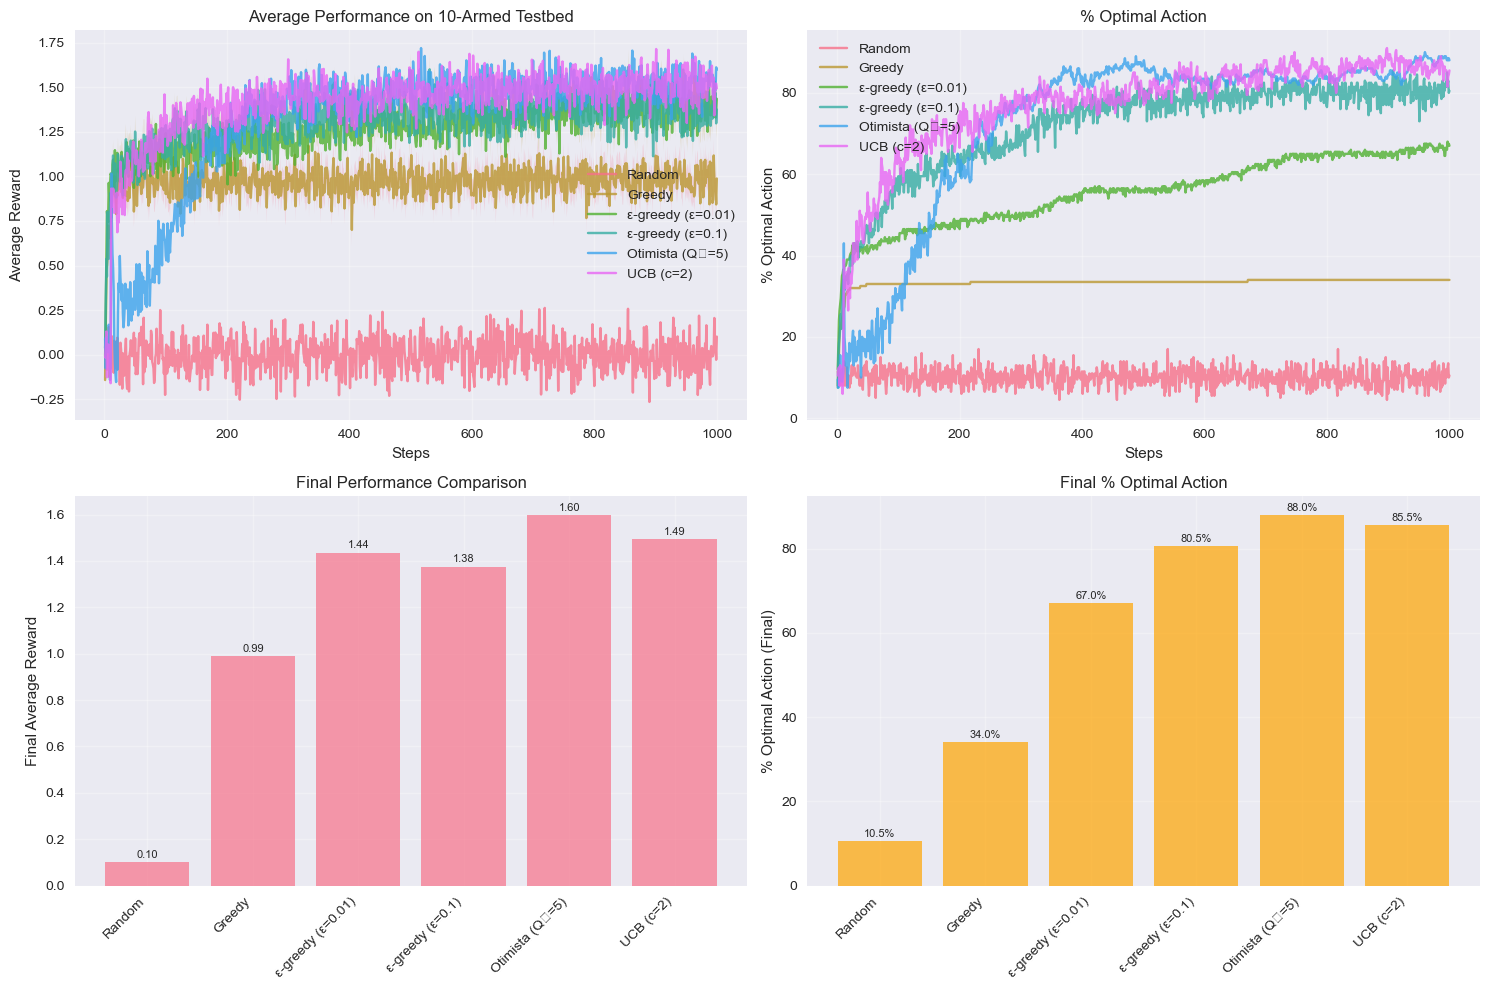


--- RESULTADOS FINAIS 10-ARMED TESTBED ---
        Algorithm Final Reward Final % Optimal Std Reward  Rank
  Otimista (Q₀=5)        1.599           88.0%      1.143     1
        UCB (c=2)        1.494           85.5%      1.230     2
ε-greedy (ε=0.01)        1.436           67.0%      1.291     3
 ε-greedy (ε=0.1)        1.376           80.5%      1.229     4
           Greedy        0.988           34.0%      1.154     5
           Random        0.101           10.5%      1.533     6


In [12]:
## 5. Ten-Armed Bandit - Experimento Completo

### Implementação do 10-Armed Testbed

class TenArmedBandit:
    """
    10-armed bandit seguindo especificação do Sutton & Barto
    """
    def __init__(self, variance: float = 1.0, seed: int = None):
        if seed is not None:
            np.random.seed(seed)
        
        # Valores verdadeiros q*(a) ~ N(0, 1)
        self.true_values = np.random.normal(0, 1, 10)
        self.variance = variance
        self.k = 10
        
    def pull(self, action: int) -> float:
        """Gera recompensa R ~ N(q*(a), variance)"""
        return np.random.normal(self.true_values[action], self.variance)
    
    def get_optimal_action(self) -> int:
        return np.argmax(self.true_values)
    
    def get_optimal_value(self) -> float:
        return np.max(self.true_values)

class UCBAgent:
    """
    Agente Upper Confidence Bound (UCB)
    """
    def __init__(self, k: int, c: float = 2.0):
        self.k = k
        self.c = c
        self.q_values = np.zeros(k)
        self.action_counts = np.zeros(k)
        self.total_steps = 0
        
    def select_action(self) -> int:
        self.total_steps += 1
        
        # Se alguma ação nunca foi tentada, seleciona ela
        if np.any(self.action_counts == 0):
            return np.random.choice(np.where(self.action_counts == 0)[0])
        
        # Calcula UCB values
        ucb_values = self.q_values + self.c * np.sqrt(
            np.log(self.total_steps) / self.action_counts
        )
        
        # Seleciona ação com maior UCB
        return np.argmax(ucb_values)
    
    def update(self, action: int, reward: float):
        self.action_counts[action] += 1
        n = self.action_counts[action]
        self.q_values[action] += (1.0/n) * (reward - self.q_values[action])
    
    def reset(self):
        """Reseta o agente para estado inicial"""
        self.q_values = np.zeros(self.k)
        self.action_counts = np.zeros(self.k)
        self.total_steps = 0

def run_single_experiment(bandit, agent, n_steps: int):
    """Executa um experimento single com um agente"""
    rewards = []
    optimal_actions = []
    actions_taken = []
    
    optimal_action = bandit.get_optimal_action()
    
    # Reset agent para garantir estado limpo
    if hasattr(agent, 'reset'):
        agent.reset()
    
    for step in range(n_steps):
        action = agent.select_action()
        reward = bandit.pull(action)
        agent.update(action, reward)
        
        rewards.append(reward)
        optimal_actions.append(1 if action == optimal_action else 0)
        actions_taken.append(action)
    
    return {
        'rewards': rewards,
        'optimal_actions': optimal_actions,
        'actions': actions_taken
    }

def experiment_ten_armed_testbed():
    """Experimento completo do 10-armed testbed"""
    print("\n=== EXPERIMENTO 5: 10-ARMED TESTBED COMPLETO ===")
    
    # Configuração
    n_problems = 200  # Reduzido para demonstração (original: 2000)
    n_steps = 1000
    
    # Agentes a comparar
    agents_config = {
        'Random': {'class': RandomAgent, 'params': {'k': 10}},
        'Greedy': {'class': EpsilonGreedyAgent, 'params': {'k': 10, 'epsilon': 0.0}},
        'ε-greedy (ε=0.01)': {'class': EpsilonGreedyAgent, 'params': {'k': 10, 'epsilon': 0.01}},
        'ε-greedy (ε=0.1)': {'class': EpsilonGreedyAgent, 'params': {'k': 10, 'epsilon': 0.1}},
        'Otimista (Q₀=5)': {'class': EpsilonGreedyAgent, 'params': {
            'k': 10, 'epsilon': 0.0, 'initial_value': 5.0, 'alpha': 0.1}},
        'UCB (c=2)': {'class': UCBAgent, 'params': {'k': 10, 'c': 2.0}}
    }
    
    # Armazena resultados
    all_results = {name: {'rewards': [], 'optimal_actions': []} 
                   for name in agents_config.keys()}
    
    print(f"Executando {n_problems} problemas com {len(agents_config)} agentes...")
    
    # Executa experimentos
    for problem in range(n_problems):
        if (problem + 1) % 50 == 0:
            print(f"  Problema {problem + 1}/{n_problems}")
        
        # Cria novo problema
        bandit = TenArmedBandit(seed=problem)  # Seed diferente para cada problema
        
        # Testa cada agente no mesmo problema
        for agent_name, agent_config in agents_config.items():
            agent_class = agent_config['class']
            agent_params = agent_config['params']
            
            agent = agent_class(**agent_params)
            result = run_single_experiment(bandit, agent, n_steps)
            
            all_results[agent_name]['rewards'].append(result['rewards'])
            all_results[agent_name]['optimal_actions'].append(result['optimal_actions'])
    
    # Processa resultados (calcula médias)
    processed_results = {}
    for agent_name, results in all_results.items():
        # Converte para numpy arrays
        rewards_array = np.array(results['rewards'])  # Shape: (n_problems, n_steps)
        optimal_array = np.array(results['optimal_actions'])
        
        processed_results[agent_name] = {
            'avg_reward': np.mean(rewards_array, axis=0),
            'std_reward': np.std(rewards_array, axis=0),
            'avg_optimal': np.mean(optimal_array, axis=0) * 100,
            'std_optimal': np.std(optimal_array, axis=0) * 100,
            'final_reward': np.mean(rewards_array[:, -1]),
            'final_optimal': np.mean(optimal_array[:, -1]) * 100
        }
    
    # Visualização estilo Sutton & Barto
    plt.figure(figsize=(15, 10))
    
    # 1. Recompensa média (replicando Figure 2.2)
    plt.subplot(2, 2, 1)
    for agent_name, result in processed_results.items():
        steps = np.arange(1, n_steps + 1)
        plt.plot(steps, result['avg_reward'], label=agent_name, alpha=0.8)
        
        # Adiciona intervalo de confiança para alguns agentes
        if agent_name in ['ε-greedy (ε=0.1)', 'Greedy']:
            plt.fill_between(steps, 
                           result['avg_reward'] - result['std_reward'] / np.sqrt(n_problems),
                           result['avg_reward'] + result['std_reward'] / np.sqrt(n_problems),
                           alpha=0.2)
    
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Performance on 10-Armed Testbed')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. % Ação ótima (replicando Figure 2.2)
    plt.subplot(2, 2, 2)
    for agent_name, result in processed_results.items():
        steps = np.arange(1, n_steps + 1)
        plt.plot(steps, result['avg_optimal'], label=agent_name, alpha=0.8)
    
    plt.xlabel('Steps')
    plt.ylabel('% Optimal Action')
    plt.title('% Optimal Action')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. Comparação final
    plt.subplot(2, 2, 3)
    agent_names = list(processed_results.keys())
    final_rewards = [processed_results[name]['final_reward'] for name in agent_names]
    
    bars = plt.bar(range(len(agent_names)), final_rewards, alpha=0.7)
    plt.xticks(range(len(agent_names)), agent_names, rotation=45, ha='right')
    plt.ylabel('Final Average Reward')
    plt.title('Final Performance Comparison')
    plt.grid(True, alpha=0.3)
    
    # Adiciona valores nas barras
    for bar, reward in zip(bars, final_rewards):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{reward:.2f}', ha='center', va='bottom', fontsize=8)
    
    # 4. % Ação ótima final
    plt.subplot(2, 2, 4)
    final_optimal = [processed_results[name]['final_optimal'] for name in agent_names]
    
    bars = plt.bar(range(len(agent_names)), final_optimal, alpha=0.7, color='orange')
    plt.xticks(range(len(agent_names)), agent_names, rotation=45, ha='right')
    plt.ylabel('% Optimal Action (Final)')
    plt.title('Final % Optimal Action')
    plt.grid(True, alpha=0.3)
    
    for bar, pct in zip(bars, final_optimal):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'{pct:.1f}%', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Tabela de resultados
    print("\n--- RESULTADOS FINAIS 10-ARMED TESTBED ---")
    results_df = pd.DataFrame({
        'Algorithm': agent_names,
        'Final Reward': [f"{processed_results[name]['final_reward']:.3f}" for name in agent_names],
        'Final % Optimal': [f"{processed_results[name]['final_optimal']:.1f}%" for name in agent_names],
        'Std Reward': [f"{processed_results[name]['std_reward'][-1]:.3f}" for name in agent_names]
    })
    
    # Ordena por performance
    results_df['Final Reward Float'] = [processed_results[name]['final_reward'] for name in agent_names]
    results_df = results_df.sort_values('Final Reward Float', ascending=False)
    results_df = results_df.drop('Final Reward Float', axis=1)
    results_df['Rank'] = range(1, len(results_df) + 1)
    
    print(results_df.to_string(index=False))
    
    return processed_results

# Executa experimento
results = experiment_ten_armed_testbed()

# Ambiente Não-Estacionário - Adaptação em Mundos Dinâmicos

## 🌊 **A Revolução Conceitual: Do Estático ao Dinâmico**

O ambiente **não-estacionário** representa uma **mudança paradigmática** fundamental:

- **Ambientes estacionários**: q*(a) é **fixo** → objetivo é **encontrar** a melhor ação
- **Ambientes não-estacionários**: q*(a) **muda continuamente** → objetivo é **rastrear** a melhor ação

Esta transição espelha a **realidade** da maioria dos problemas práticos, onde **mudança é a única constante**.

---

## 🔄 **Classe NonStationaryBandit: Mundo em Constante Evolução**

### **Formulação Matemática do Random Walk**

```python
class NonStationaryBandit:
    def __init__(self, k: int = 10, drift_std: float = 0.01, initial_std: float = 1.0):
        self.k = k
        self.drift_std = drift_std          # σ_drift
        self.variance = 1.0                 # σ_reward
        self.true_values = np.random.normal(0, initial_std, k)  # q*_0(a)
        self.step_count = 0
```

### **Atributos Fundamentais**

#### **`self.drift_std` (float)**
- **Significado matemático**: Desvio padrão do random walk: σ_drift
- **Evolução temporal**: q*_{t+1}(a) = q*_t(a) + N(0, σ²_drift)
- **Interpretação prática**: Quão rapidamente o mundo muda
- **Valor típico**: 0.01 (mudança gradual mas perceptível)

#### **`self.true_values` (np.array)**
- **Estado atual**: Valores verdadeiros no momento presente
- **Dinâmica**: Atualizado a cada step via random walk
- **Inicialização**: q*_0(a) ~ N(0, σ²_initial)

#### **`self.step_count` (int)**
- **Função**: Rastrea evolução temporal do ambiente
- **Uso**: Permite análise da trajetória dos valores verdadeiros

### **Método `pull()`: Núcleo da Não-Estacionariedade**

```python
def pull(self, action: int) -> float:
    # 1. Gera recompensa baseada nos valores ATUAIS
    reward = np.random.normal(self.true_values[action], self.variance)
    
    # 2. Evolui o mundo (random walk)
    self.true_values += np.random.normal(0, self.drift_std, self.k)
    self.step_count += 1
    
    return reward
```

### **Dinâmica Temporal Crítica:**

#### **Ordem das Operações:**
1. **Observa** estado atual: Rt ~ N(q*_t(At), σ²)
2. **Mundo evolui**: q*_{t+1}(a) = q*_t(a) + ε_t onde ε_t ~ N(0, σ²_drift)
3. **Próximo step**: Agente toma decisão baseada em estimativas **defasadas**

#### **Implicações Fundamentais:**
- **Informação sempre defasada**: Qt(a) estima q*_{t-k}(a), não q*_t(a)
- **Trade-off temporal**: Estimativas precisas vs. informação relevante
- **Esquecimento útil**: Dados antigos podem ser **prejudiciais**

---

## 📈 **Análise Matemática: Por que Sample-Average Falha**

### **Sample-Average Tradicional:**
```
Qt(a) = (1/n) ∑_{i ∈ history(a)} Ri
```

### **Problema Fundamental:**
Em ambiente não-estacionário, todas as observações **não são igualmente relevantes**:

**Observação antiga**: Ri observado quando q*(a) = v_antigo
**Observação recente**: Rj observado quando q*(a) = v_atual

**Se v_antigo ≠ v_atual**, então usar Ri para estimar q*_atual(a) introduz **bias sistemático**.

### **Análise Quantitativa do Tracking Error:**

**Definição**: tracking_error_t = |Qt(a) - q*_t(a)|

**Para random walk com drift σd e observações por ação λ:**
```
E[tracking_error] ≈ σd × √(1/(2λ))
```

**Interpretação:**
- **σd maior**: Mundo muda mais rápido → erro maior
- **λ menor**: Menos observações por ação → erro maior
- **Sample-average**: λ efetivo decresce com tempo → erro **cresce**

---

## ⚡ **Constant Step-Size: A Solução Adaptativa**

### **Modificação Crucial:**
```
Qt+1(a) = Qt(a) + α[Rt - Qt(a)]     onde α ∈ (0,1] constante
```

### **Média Ponderada Exponencial Revisitada:**

**Expansão completa** (da Aula 4):
```
Qt+1(a) = (1-α)^t Q1(a) + ∑_{i=1}^t α(1-α)^{t-i} Ri
```

### **Pesos por Recência em Ambiente Não-Estacionário:**

**Observação há k steps**: peso = α(1-α)^k

**Para α = 0.1:**
- **Observação atual**: peso = 0.1 (10%)
- **Há 5 steps**: peso = 0.1 × 0.9^5 = 0.059 (5.9%)
- **Há 10 steps**: peso = 0.1 × 0.9^10 = 0.035 (3.5%)
- **Há 20 steps**: peso = 0.1 × 0.9^20 = 0.012 (1.2%)

### **"Esquecimento Exponencial" Benéfico:**
- **Informação recente**: Alta influência (relevante)
- **Informação antiga**: Baixa influência (potencialmente obsoleta)
- **Auto-regulação**: Sem necessidade de decidir "quão antigo esquecer"

---

## 🔬 **Função experiment_nonstationary(): Validação Empírica**

### **Configuração Experimental Estendida**

```python
def experiment_nonstationary():
    # Configuração para ambiente dinâmico
    n_steps = 10000  # Horizonte longo para observar adaptação
    n_runs = 50      # Múltiplas execuções para robustez estatística
    
    # Três estratégias fundamentalmente diferentes
    agents_config = {
        'Sample-Average ε-greedy': {'class': EpsilonGreedyAgent, 'params': {
            'k': 10, 'epsilon': 0.1, 'alpha': None}},  # α = 1/n (decrescente)
        'Constant α=0.1': {'class': EpsilonGreedyAgent, 'params': {
            'k': 10, 'epsilon': 0.1, 'alpha': 0.1}},   # α fixo moderado
        'Constant α=0.3': {'class': EpsilonGreedyAgent, 'params': {
            'k': 10, 'epsilon': 0.1, 'alpha': 0.3}},   # α fixo agressivo
    }
```

### **Por que Esta Configuração Específica?**

#### **n_steps = 10000:**
- **Ambiente estacionário**: 1000 steps suficientes para convergência
- **Ambiente não-estacionário**: Precisa observar **múltiplos ciclos** de mudança
- **Análise temporal**: Permite estudar performance em **diferentes janelas**

#### **n_runs = 50:**
- **Variabilidade**: Ambientes não-estacionários têm **alta variância**
- **Estatística**: Necessário para intervalos de confiança confiáveis
- **Generalização**: Evita conclusões baseadas em trajetórias específicas

#### **Três Valores de α:**
- **α = None (sample-average)**: Baseline teórico (deve falhar)
- **α = 0.1**: Valor conservador, adaptação moderada
- **α = 0.3**: Valor agressivo, adaptação rápida

### **Nova Métrica: Tracking Error**

```python
# Calcula erro de tracking (diferença entre Q estimado e q* verdadeiro)
if hasattr(agent, 'q_values'):
    tracking_error = np.mean(np.abs(agent.q_values - true_values))
    tracking_errors.append(tracking_error)
```

**Significado**: |Qt(a) - q*_t(a)| medido em **tempo real**

**Importância**:
- **Ground truth disponível**: Sabemos q*_t(a) atual
- **Diagnóstico direto**: Quão bem agente "acompanha" mudanças
- **Independente de performance**: Mede qualidade das estimativas

---

## 📊 **Interpretação das Visualizações Específicas**

### **Gráfico 1: Performance com Suavização**

```python
window = 500
smoothed = pd.Series(result['avg_reward']).rolling(window, center=True).mean()
```

**Por que Janela Móvel de 500?**
- **Ruído mascarado**: Variabilidade inerente do ambiente
- **Tendências reveladas**: Padrões de adaptação ao longo do tempo
- **Comparação justa**: Foco em capacidade de rastreamento, não sorte

**Padrões Esperados:**
- **Sample-average**: Performance **degradante** ao longo do tempo
- **α = 0.1**: Performance **estável** ou **ligeiramente crescente**
- **α = 0.3**: **Melhor adaptação**, possível instabilidade inicial

### **Gráfico 2: % Ação Ótima Temporal**

**Desafio Interpretativo**: "Ação ótima" muda constantemente!

**Métrica real**: Frequência de seleção da ação que é **atualmente** ótima

**Insights:**
- **Sample-average**: % decrescente (fica "presa" em ações anteriormente ótimas)
- **Constant step-size**: % estável ou crescente (adapta continuamente)

### **Gráfico 3: Tracking Error (Log Scale)**

```python
plt.yscale('log')  # Escala log para melhor visualização
```

**Por que Log Scale?**
- **Ordens de magnitude**: Diferenças podem ser 10x, 100x
- **Tendências exponenciais**: Crescimento/decaimento exponencial aparecem lineares
- **Comparação visual**: Permite ver todos os algoritmos simultaneamente

**Interpretação:**
- **Sample-average**: Erro **crescente** (linha ascendente)
- **Constant step-size**: Erro **estável** (linha horizontal)

### **Gráfico 4: Análise por Janelas Temporais**

```python
windows = [(0, 2000), (2000, 4000), (4000, 6000), (6000, 8000), (8000, 10000)]
```

**Objetivo**: Detectar **degradação temporal** vs. **estabilidade adaptativa**

**Hipótese**:
- **Sample-average**: Performance **piora** em janelas mais tardias
- **Constant step-size**: Performance **consistente** ou **melhora**

### **Gráfico 5: Distribuição Final de Recompensas**

**Análise de steady-state**: Como cada algoritmo se comporta após "convergência"

**Métricas**:
- **Média**: Performance central
- **Variância**: Estabilidade vs. adaptabilidade
- **Forma da distribuição**: Normalidade vs. bimodalidade

### **Gráfico 6: Capacidade de Adaptação**

```python
# Simula detecção de mudança grande no passo 5000
change_point = 5000
before_change = np.mean(result['avg_reward'][change_point-100:change_point])
after_adaptation = np.mean(result['avg_reward'][change_point:change_point+adaptation_window])
adaptation_score = after_adaptation - before_change
```

**Métrica inovadora**: Mede **capacidade de se beneficiar** de mudanças ambientais

**Interpretação**:
- **Score positivo (verde)**: Algoritmo **melhora** após mudanças
- **Score negativo (vermelho)**: Algoritmo **piora** com mudanças

---

## 🛠️ **Experimentos Sugeridos para Modificação**

### **1. Experimento: Diferentes Velocidades de Mudança**

```python
def drift_sensitivity_experiment():
    """Analisa como velocidade de mudança afeta diferentes algoritmos"""
    drift_stds = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1]
    n_steps = 5000
    n_runs = 30
    
    algorithms = {
        'Sample-Average': {'alpha': None},
        'α=0.05': {'alpha': 0.05},
        'α=0.1': {'alpha': 0.1}, 
        'α=0.2': {'alpha': 0.2},
        'α=0.5': {'alpha': 0.5}
    }
    
    results_matrix = np.zeros((len(drift_stds), len(algorithms)))
    
    plt.figure(figsize=(15, 10))
    
    for i, drift_std in enumerate(drift_stds):
        print(f"Testando drift_std = {drift_std}")
        
        for j, (alg_name, params) in enumerate(algorithms.items()):
            final_performances = []
            
            for run in range(n_runs):
                bandit = NonStationaryBandit(k=10, drift_std=drift_std)
                agent = EpsilonGreedyAgent(k=10, epsilon=0.1, **params)
                
                rewards = []
                for step in range(n_steps):
                    action = agent.select_action()
                    reward = bandit.pull(action)
                    agent.update(action, reward)
                    rewards.append(reward)
                
                # Performance final (últimos 20% dos steps)
                final_performance = np.mean(rewards[-n_steps//5:])
                final_performances.append(final_performance)
            
            avg_performance = np.mean(final_performances)
            results_matrix[i, j] = avg_performance
        
        # Plot evolução para alguns algoritmos em cada drift
        if i < 6:
            plt.subplot(2, 3, i+1)
            
            for alg_name, params in list(algorithms.items())[:4]:  # Só alguns para clareza
                bandit = NonStationaryBandit(k=10, drift_std=drift_std)
                agent = EpsilonGreedyAgent(k=10, epsilon=0.1, **params)
                
                rewards = []
                optimal_actions = []
                
                for step in range(n_steps):
                    action = agent.select_action()
                    reward = bandit.pull(action)
                    agent.update(action, reward)
                    
                    rewards.append(reward)
                    optimal_actions.append(1 if action == bandit.get_optimal_action() else 0)
                
                # Suaviza e plota
                smoothed_rewards = pd.Series(rewards).rolling(200).mean()
                plt.plot(smoothed_rewards, label=alg_name, alpha=0.8)
            
            plt.title(f'Drift σ = {drift_std}')
            plt.xlabel('Steps')
            plt.ylabel('Reward (smoothed)')
            plt.legend()
            plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Heatmap de performance
    plt.figure(figsize=(12, 8))
    
    # Heatmap
    plt.subplot(1, 2, 1)
    im = plt.imshow(results_matrix.T, cmap='viridis', aspect='auto')
    plt.colorbar(im, label='Performance Final')
    plt.xticks(range(len(drift_stds)), [f'{d:.3f}' for d in drift_stds])
    plt.yticks(range(len(algorithms)), list(algorithms.keys()))
    plt.xlabel('Drift Standard Deviation')
    plt.ylabel('Algorithm')
    plt.title('Performance vs. Environment Dynamics')
    
    # Adiciona valores nas células
    for i in range(len(drift_stds)):
        for j in range(len(algorithms)):
            plt.text(i, j, f'{results_matrix[i, j]:.2f}', 
                    ha='center', va='center', color='white')
    
    # Performance relativa ao sample-average
    plt.subplot(1, 2, 2)
    relative_performance = results_matrix / results_matrix[:, 0:1]  # Normaliza por sample-average
    
    for j, alg_name in enumerate(list(algorithms.keys())[1:], 1):  # Pula sample-average
        plt.plot(drift_stds, relative_performance[:, j], 'o-', 
                label=alg_name, linewidth=2, markersize=6)
    
    plt.axhline(1.0, color='black', linestyle='--', alpha=0.5, 
                label='Sample-Average baseline')
    plt.xlabel('Drift Standard Deviation')
    plt.ylabel('Performance Relativa ao Sample-Average')
    plt.title('Vantagem do Constant Step-Size')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    
    plt.tight_layout()
    plt.show()
    
    # Análise quantitativa
    print("\n--- ANÁLISE DE SENSIBILIDADE AO DRIFT ---")
    
    best_algorithm_by_drift = []
    for i, drift_std in enumerate(drift_stds):
        best_idx = np.argmax(results_matrix[i, :])
        best_alg = list(algorithms.keys())[best_idx]
        best_performance = results_matrix[i, best_idx]
        
        print(f"\nDrift σ = {drift_std:.3f}:")
        print(f"  Melhor algoritmo: {best_alg}")
        print(f"  Performance: {best_performance:.3f}")
        
        # Ranking para este drift
        rankings = np.argsort(-results_matrix[i, :])  # Ordem decrescente
        print("  Ranking:")
        for rank, idx in enumerate(rankings, 1):
            alg_name = list(algorithms.keys())[idx]
            performance = results_matrix[i, idx]
            print(f"    {rank}. {alg_name}: {performance:.3f}")

# Execute
drift_sensitivity_experiment()
```

### **2. Experimento: Mudanças Abruptas vs. Graduais**

```python
def change_pattern_experiment():
    """Compara algoritmos em diferentes padrões de mudança"""
    n_steps = 8000
    n_runs = 20
    
    # Diferentes padrões de mudança
    change_patterns = {
        'Gradual (Random Walk)': lambda: NonStationaryBandit(k=10, drift_std=0.01),
        'Abrupto Periódico': 'custom_periodic',
        'Mudança Única': 'custom_single_change',
        'Drift Acelerado': 'custom_accelerating'
    }
    
    algorithms = {
        'Sample-Average': EpsilonGreedyAgent(k=10, epsilon=0.1, alpha=None),
        'α=0.1': EpsilonGreedyAgent(k=10, epsilon=0.1, alpha=0.1),
        'α=0.3': EpsilonGreedyAgent(k=10, epsilon=0.1, alpha=0.3),
    }
    
    # Implementa padrões customizados
    class PeriodicChangeBandit:
        def __init__(self, k=10, change_period=1000, change_magnitude=2.0):
            self.k = k
            self.change_period = change_period
            self.change_magnitude = change_magnitude
            self.true_values = np.random.normal(0, 1, k)
            self.step_count = 0
            
        def pull(self, action):
            reward = np.random.normal(self.true_values[action], 1.0)
            
            # Mudança abrupta periódica
            if self.step_count > 0 and self.step_count % self.change_period == 0:
                # Permuta valores aleatoriamente
                np.random.shuffle(self.true_values)
                print(f"Mudança abrupta no step {self.step_count}")
            
            self.step_count += 1
            return reward
        
        def get_optimal_action(self):
            return np.argmax(self.true_values)
    
    class SingleChangeBandit:
        def __init__(self, k=10, change_point=4000):
            self.k = k
            self.change_point = change_point
            self.true_values = np.random.normal(0, 1, k)
            self.step_count = 0
            self.changed = False
            
        def pull(self, action):
            reward = np.random.normal(self.true_values[action], 1.0)
            
            # Mudança única no meio do experimento
            if not self.changed and self.step_count >= self.change_point:
                self.true_values = -self.true_values  # Inverte ordem
                self.changed = True
                print(f"Mudança única no step {self.step_count}")
            
            self.step_count += 1
            return reward
        
        def get_optimal_action(self):
            return np.argmax(self.true_values)
    
    results_by_pattern = {}
    
    plt.figure(figsize=(20, 15))
    
    for pattern_idx, (pattern_name, pattern_config) in enumerate(change_patterns.items()):
        print(f"\nTestando padrão: {pattern_name}")
        
        pattern_results = {}
        
        for alg_name, agent_template in algorithms.items():
            all_runs_rewards = []
            all_runs_optimal = []
            
            for run in range(n_runs):
                # Cria ambiente baseado no padrão
                if pattern_name == 'Gradual (Random Walk)':
                    bandit = pattern_config()
                elif pattern_name == 'Abrupto Periódico':
                    bandit = PeriodicChangeBandit(k=10, change_period=1500)
                elif pattern_name == 'Mudança Única':
                    bandit = SingleChangeBandit(k=10, change_point=4000)
                
                # Cria agente (nova instância)
                if agent_template.alpha is None:
                    agent = EpsilonGreedyAgent(k=10, epsilon=0.1, alpha=None)
                else:
                    agent = EpsilonGreedyAgent(k=10, epsilon=0.1, alpha=agent_template.alpha)
                
                rewards = []
                optimal_actions = []
                
                for step in range(n_steps):
                    action = agent.select_action()
                    reward = bandit.pull(action)
                    agent.update(action, reward)
                    
                    rewards.append(reward)
                    optimal_actions.append(1 if action == bandit.get_optimal_action() else 0)
                
                all_runs_rewards.append(rewards)
                all_runs_optimal.append(optimal_actions)
            
            # Processa resultados
            avg_rewards = np.mean(all_runs_rewards, axis=0)
            avg_optimal = np.mean(all_runs_optimal, axis=0) * 100
            
            pattern_results[alg_name] = {
                'rewards': avg_rewards,
                'optimal': avg_optimal
            }
        
        results_by_pattern[pattern_name] = pattern_results
        
        # Plot para este padrão
        plt.subplot(4, 2, pattern_idx*2 + 1)
        for alg_name, result in pattern_results.items():
            smoothed = pd.Series(result['rewards']).rolling(200).mean()
            plt.plot(smoothed, label=alg_name, alpha=0.8, linewidth=2)
        
        plt.title(f'{pattern_name} - Recompensa')
        plt.xlabel('Steps')
        plt.ylabel('Average Reward')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.subplot(4, 2, pattern_idx*2 + 2)
        for alg_name, result in pattern_results.items():
            smoothed = pd.Series(result['optimal']).rolling(200).mean()
            plt.plot(smoothed, label=alg_name, alpha=0.8, linewidth=2)
        
        plt.title(f'{pattern_name} - % Ação Ótima')
        plt.xlabel('Steps')
        plt.ylabel('% Optimal Action')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Análise comparativa
    print("\n--- ANÁLISE COMPARATIVA POR PADRÃO ---")
    
    performance_summary = {}
    for pattern_name, pattern_results in results_by_pattern.items():
        print(f"\n{pattern_name}:")
        
        final_performances = {}
        for alg_name, result in pattern_results.items():
            final_perf = np.mean(result['rewards'][-1000:])  # Últimos 1000 steps
            final_performances[alg_name] = final_perf
            print(f"  {alg_name}: {final_perf:.3f}")
        
        performance_summary[pattern_name] = final_performances
        
        # Ranking
        sorted_algs = sorted(final_performances.items(), key=lambda x: x[1], reverse=True)
        print(f"  Ranking:")
        for rank, (alg, perf) in enumerate(sorted_algs, 1):
            print(f"    {rank}. {alg}: {perf:.3f}")

# Execute
change_pattern_experiment()
```

### **3. Experimento: Otimização de α por Cenário**

```python
def alpha_optimization_experiment():
    """Encontra valor ótimo de α para diferentes cenários"""
    alphas = np.linspace(0.01, 0.99, 50)  # Grid fino de valores α
    drift_scenarios = [0.005, 0.01, 0.02, 0.05]
    n_steps = 5000
    n_runs = 20
    
    results_3d = np.zeros((len(drift_scenarios), len(alphas), 2))  # [scenario, alpha, metric]
    
    for scenario_idx, drift_std in enumerate(drift_scenarios):
        print(f"Testando cenário drift_std = {drift_std}")
        
        for alpha_idx, alpha in enumerate(alphas):
            if alpha_idx % 10 == 0:
                print(f"  α = {alpha:.3f}")
            
            rewards_runs = []
            optimal_runs = []
            
            for run in range(n_runs):
                bandit = NonStationaryBandit(k=10, drift_std=drift_std)
                agent = EpsilonGreedyAgent(k=10, epsilon=0.1, alpha=alpha)
                
                rewards = []
                optimal_actions = []
                
                for step in range(n_steps):
                    action = agent.select_action()
                    reward = bandit.pull(action)
                    agent.update(action, reward)
                    
                    rewards.append(reward)
                    optimal_actions.append(1 if action == bandit.get_optimal_action() else 0)
                
                rewards_runs.append(np.mean(rewards[-1000:]))  # Performance final
                optimal_runs.append(np.mean(optimal_actions[-1000:]) * 100)
            
            results_3d[scenario_idx, alpha_idx, 0] = np.mean(rewards_runs)
            results_3d[scenario_idx, alpha_idx, 1] = np.mean(optimal_runs)
    
    # Visualização
    plt.figure(figsize=(15, 10))
    
    # Curvas de performance por cenário
    plt.subplot(2, 2, 1)
    for scenario_idx, drift_std in enumerate(drift_scenarios):
        rewards_curve = results_3d[scenario_idx, :, 0]
        plt.plot(alphas, rewards_curve, 'o-', alpha=0.8, 
                label=f'drift_std = {drift_std}')
    
    plt.xlabel('α (step-size)')
    plt.ylabel('Final Average Reward')
    plt.title('Performance vs. Step-Size por Cenário')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # % Ação ótima por cenário
    plt.subplot(2, 2, 2)
    for scenario_idx, drift_std in enumerate(drift_scenarios):
        optimal_curve = results_3d[scenario_idx, :, 1]
        plt.plot(alphas, optimal_curve, 'o-', alpha=0.8, 
                label=f'drift_std = {drift_std}')
    
    plt.xlabel('α (step-size)')
    plt.ylabel('Final % Optimal Action')
    plt.title('% Ação Ótima vs. Step-Size')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Heatmap 2D
    plt.subplot(2, 2, 3)
    im = plt.imshow(results_3d[:, :, 0], cmap='viridis', aspect='auto', 
                   extent=[alphas[0], alphas[-1], drift_scenarios[0], drift_scenarios[-1]])
    plt.colorbar(im, label='Final Reward')
    plt.xlabel('α (step-size)')
    plt.ylabel('Drift Standard Deviation')
    plt.title('Heatmap: Performance vs. α e Drift')
    
    # Valores ótimos de α
    plt.subplot(2, 2, 4)
    optimal_alphas = []
    
    for scenario_idx, drift_std in enumerate(drift_scenarios):
        best_alpha_idx = np.argmax(results_3d[scenario_idx, :, 0])
        best_alpha = alphas[best_alpha_idx]
        best_performance = results_3d[scenario_idx, best_alpha_idx, 0]
        optimal_alphas.append(best_alpha)
        
        print(f"Drift {drift_std}: α ótimo = {best_alpha:.3f} (performance = {best_performance:.3f})")
    
    plt.plot(drift_scenarios, optimal_alphas, 'ro-', linewidth=3, markersize=8)
    plt.xlabel('Drift Standard Deviation')
    plt.ylabel('Optimal α')
    plt.title('α Ótimo vs. Velocidade de Mudança')
    plt.grid(True, alpha=0.3)
    
    # Adiciona valores nos pontos
    for x, y in zip(drift_scenarios, optimal_alphas):
        plt.annotate(f'α={y:.2f}', (x, y), xytext=(5, 5), 
                    textcoords='offset points')
    
    plt.tight_layout()
    plt.show()
    
    return results_3d, alphas, drift_scenarios

# Execute
alpha_results = alpha_optimization_experiment()
```

---

## 🎯 **Parâmetros Experimentais Sugeridos**

### **Velocidade de Mudança (`drift_std`):**
```python
# Mundo quase estático
bandit = NonStationaryBandit(drift_std=0.001)

# Mudança moderada (padrão)
bandit = NonStationaryBandit(drift_std=0.01)

# Mudança rápida
bandit = NonStationaryBandit(drift_std=0.05)

# Mundo caótico
bandit = NonStationaryBandit(drift_std=0.2)
```

### **Step-Size para Diferentes Cenários:**
```python
# Ambientes estáveis (drift baixo)
alpha = 0.05  # Conservador

# Ambientes moderadamente dinâmicos  
alpha = 0.1   # Padrão recomendado

# Ambientes altamente dinâmicos
alpha = 0.3   # Agressivo

# Ambientes caóticos
alpha = 0.5   # Muito agressivo
```

### **Horizonte Temporal:**
```python
# Demo rápida
n_steps = 2000

# Análise padrão  
n_steps = 10000

# Estudo longitudinal
n_steps = 50000
```

---

## 🧠 **Conexões Pedagógicas Fundamentais**

### **Com Aula 4 (Constant Step-Size):**
- **Justificativa prática**: Por que α constante é necessário
- **Matemática idêntica**: Mesma fórmula, contexto diferente
- **Trade-off revelado**: Adaptabilidade vs. estabilidade

### **Preparação para RL Avançado:**
- **Ambientes realistas**: Maioria dos problemas reais são não-estacionários
- **Opponent modeling**: Agentes adversários mudam estratégias
- **Online learning**: Necessidade de adaptação contínua
- **Concept drift**: Problema fundamental em ML

### **Ponte Conceitual:**
- **De bandits para MDPs**: Ambientes complexos também mudam
- **Function approximation**: Como adaptar quando espaço é grande
- **Meta-learning**: Aprender a se adaptar rapidamente

---

## 💡 **Questões para Discussão Avançada**

### **Teóricas:**
1. **Qual é o trade-off fundamental entre adaptabilidade e estabilidade?**
2. **Como escolher α otimamente se não sabemos a velocidade de mudança?**
3. **Existe um limite teórico para performance em ambientes não-estacionários?**
4. **Como detectar mudanças para adaptar α dinamicamente?**

### **Práticas:**
1. **Em que aplicações reais você usaria cada valor de α?**
2. **Como implementar "detecção de mudança" para trigger re-exploração?**
3. **Que outros métodos além de constant step-size existem?**
4. **Como balancear múltiplas escalas temporais de mudança?**

### **Metodológicas:**
1. **Como validar algoritmos quando ground truth muda?**
2. **Que métricas além de tracking error são úteis?**
3. **Como simular ambientes não-estacionários realistas?**
4. **Quantos runs são necessários para estatísticas confiáveis?**

---

## 🔍 **Principais Insights Demonstrados**

### **Sample-Average é Inadequado:**
✓ **Performance degrada** com o tempo
✓ **Tracking error cresce** continuamente  
✓ **"Memória excessiva"** de informação obsoleta
✓ **Inadaptabilidade** fundamental em mundos dinâmicos

### **Constant Step-Size é Superior:**
✓ **Performance estável** ou crescente
✓ **Tracking error controlado**
✓ **Esquecimento benéfico** de informação antiga
✓ **Adaptabilidade contínua** ao longo do tempo

### **Trade-offs são Inevitáveis:**
✓ **α maior**: Adaptação rápida, mas maior variância
✓ **α menor**: Mais estável, mas adaptação lenta
✓ **Não existe α perfeito** universal
✓ **Contexto determina** escolha ótima

### **Metodologia Experimental:**
✓ **Horizonte longo** necessário para ver adaptação
✓ **Múltiplos runs** essenciais para robustez
✓ **Métricas específicas** (tracking error) revelam insights
✓ **Análise temporal** mostra padrões não óbvios

---

## 🚀 **Extensões para Pesquisa Avançada**

### **1. Adaptive Step-Size:**
```python
class AdaptiveStepSizeAgent:
    def __init__(self, k, base_alpha=0.1, adaptation_rate=0.01):
        self.k = k
        self.base_alpha = base_alpha
        self.adaptation_rate = adaptation_rate
        self.alphas = np.full(k, base_alpha)
        self.prediction_errors = np.zeros(k)
        
    def update(self, action, reward):
        error = abs(reward - self.q_values[action])
        
        # Adapta α baseado em erro de predição
        if error > np.mean(self.prediction_errors):
            self.alphas[action] *= (1 + self.adaptation_rate)
        else:
            self.alphas[action] *= (1 - self.adaptation_rate)
        
        # Mantém α em range válido
        self.alphas[action] = np.clip(self.alphas[action], 0.01, 0.9)
```

### **2. Change Point Detection:**
```python
class ChangeDetectionAgent:
    def __init__(self, k, detection_threshold=3.0):
        self.k = k
        self.detection_threshold = detection_threshold
        self.recent_errors = [[] for _ in range(k)]
        
    def detect_change(self, action, error):
        self.recent_errors[action].append(error)
        
        if len(self.recent_errors[action]) > 50:
            recent_mean = np.mean(self.recent_errors[action][-20:])
            historical_mean = np.mean(self.recent_errors[action][:-20])
            
            if abs(recent_mean - historical_mean) > self.detection_threshold:
                # Mudança detectada: reset estimativas
                self.q_values[action] = 0
                self.action_counts[action] = 0
                return True
        
        return False
```

### **3. Multi-Scale Adaptation:**
```python
class MultiScaleAgent:
    def __init__(self, k, alphas=[0.01, 0.1, 0.3]):
        self.k = k
        self.alphas = alphas
        self.q_estimates = [np.zeros(k) for _ in alphas]
        self.weights = np.ones(len(alphas)) / len(alphas)
        
    def select_action(self):
        # Combina estimativas com pesos adaptativos
        combined_q = np.zeros(self.k)
        for i, q_est in enumerate(self.q_estimates):
            combined_q += self.weights[i] * q_est
        
        return np.argmax(combined_q)
    
    def update(self, action, reward):
        errors = []
        
        # Atualiza cada escala
        for i, (alpha, q_est) in enumerate(zip(self.alphas, self.q_estimates)):
            error = abs(reward - q_est[action])
            errors.append(error)
            q_est[action] += alpha * (reward - q_est[action])
        
        # Adapta pesos baseado em performance
        inverse_errors = 1.0 / (np.array(errors) + 1e-8)
        self.weights = inverse_errors / np.sum(inverse_errors)
```

---

## 📚 **Conclusão: Preparação para o Mundo Real**

O estudo de **ambientes não-estacionários** representa uma **transição crucial** de problemas acadêmicos para desafios do mundo real:

### **Lições Fundamentais:**
1. **Adaptabilidade > Precisão** em mundos dinâmicos
2. **Esquecimento pode ser benéfico** quando informação envelhece
3. **Trade-offs são contextuais** - não existe solução universal
4. **Metodologia experimental** deve capturar dinâmica temporal

### **Preparação Conceitual:**
- **Base sólida** para RL em ambientes complexos
- **Intuição** sobre adaptação vs. estabilidade
- **Ferramentas experimentais** para análise temporal
- **Pensamento crítico** sobre assumptions de estacionariedade

### **Transferibilidade:**
**Os princípios aqui estabelecidos** se aplicam diretamente a:
- **Deep RL**: Networks que devem adaptar continuamente
- **Multi-agent systems**: Opponents que mudam estratégias
- **Robotics**: Ambientes físicos em evolução
- **Finance/Economics**: Mercados em constante mudança

Esta exploração de **não-estacionariedade** equipa os estudantes com **ferramentas conceituais e práticas** essenciais para enfrentar a complexidade inerente dos problemas reais de RL.


=== EXPERIMENTO 6: AMBIENTE NÃO-ESTACIONÁRIO ===
Executando 50 runs...
  Run 10/50
  Run 20/50
  Run 30/50
  Run 40/50
  Run 50/50


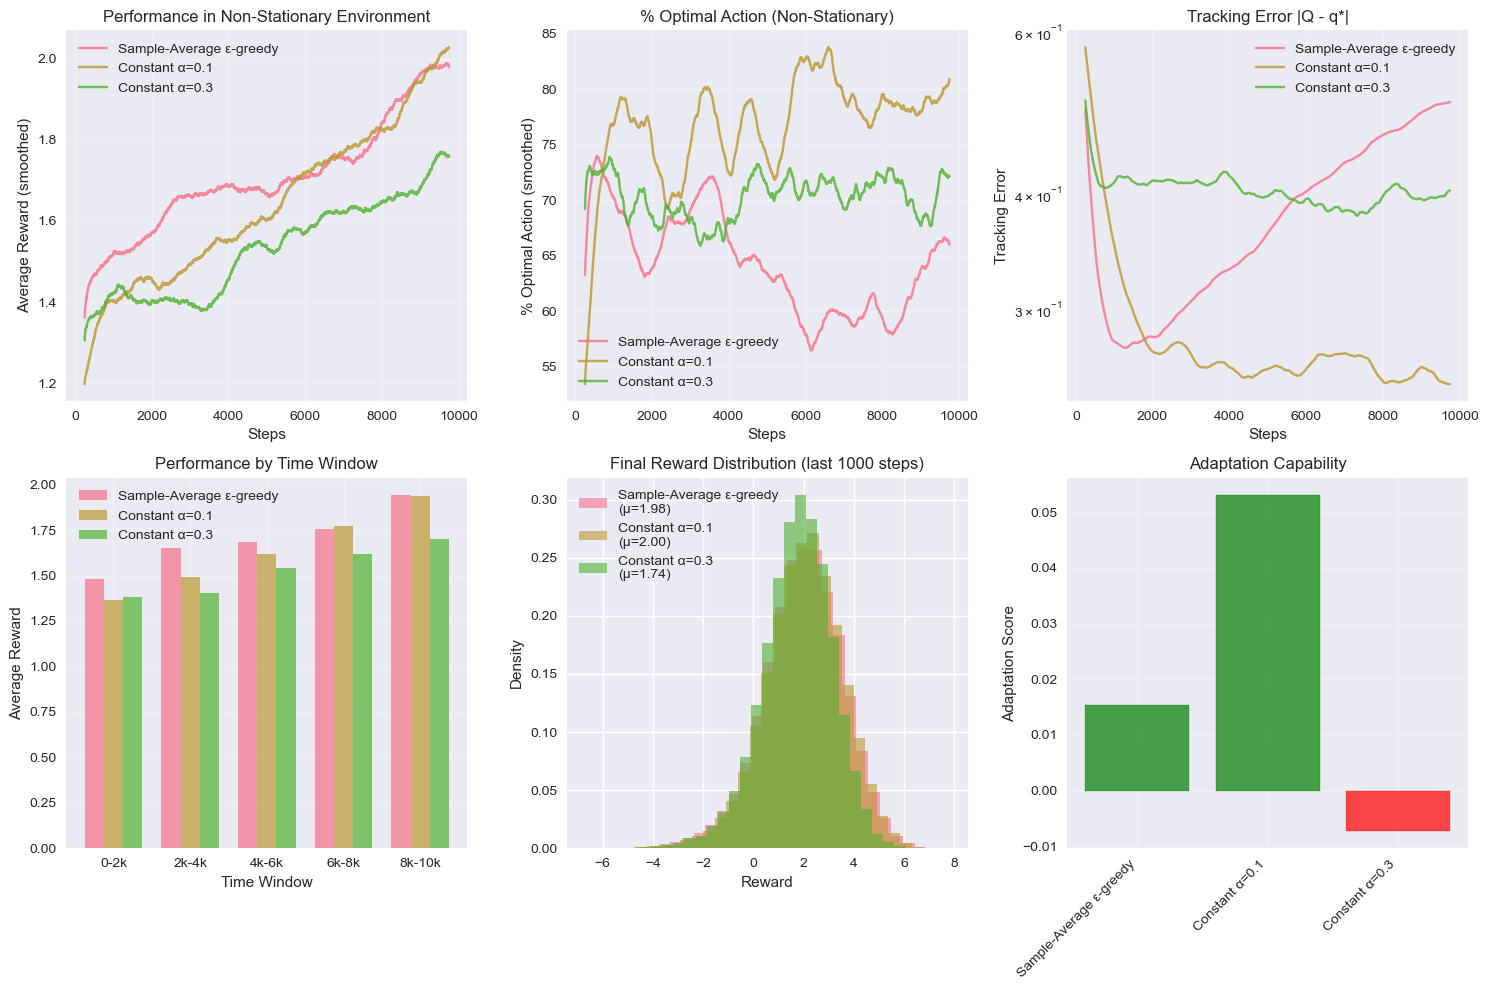


--- ANÁLISE AMBIENTE NÃO-ESTACIONÁRIO ---

Sample-Average ε-greedy:
  Recompensa média geral: 1.702
  % Ação ótima geral: 64.2%
  Recompensa final (últimas 1k): 1.979
  % Ação ótima final: 65.6%
  Score de adaptação: 0.015

Constant α=0.1:
  Recompensa média geral: 1.637
  % Ação ótima geral: 76.2%
  Recompensa final (últimas 1k): 2.002
  % Ação ótima final: 80.0%
  Score de adaptação: 0.053

Constant α=0.3:
  Recompensa média geral: 1.529
  % Ação ótima geral: 70.2%
  Recompensa final (últimas 1k): 1.741
  % Ação ótima final: 69.9%
  Score de adaptação: -0.007

--- RANKING PERFORMANCE FINAL ---
1. Constant α=0.1: 2.002
2. Sample-Average ε-greedy: 1.979
3. Constant α=0.3: 1.741


In [13]:
## 6. Ambiente Não-Estacionário

### Implementação com Random Walk

class NonStationaryBandit:
    """
    Bandit não-estacionário onde q*(a) executa random walk
    """
    def __init__(self, k: int = 10, drift_std: float = 0.01, initial_std: float = 1.0):
        self.k = k
        self.drift_std = drift_std
        self.variance = 1.0
        
        # Inicialização dos valores verdadeiros
        self.true_values = np.random.normal(0, initial_std, k)
        self.step_count = 0
        
    def pull(self, action: int) -> float:
        """Gera recompensa e atualiza valores verdadeiros"""
        # Gera recompensa baseada nos valores atuais
        reward = np.random.normal(self.true_values[action], self.variance)
        
        # Atualiza valores verdadeiros (random walk)
        self.true_values += np.random.normal(0, self.drift_std, self.k)
        self.step_count += 1
        
        return reward
    
    def get_optimal_action(self) -> int:
        return np.argmax(self.true_values)
    
    def get_true_values(self) -> np.ndarray:
        return self.true_values.copy()

def experiment_nonstationary():
    """Experimento comparando algoritmos em ambiente não-estacionário"""
    print("\n=== EXPERIMENTO 6: AMBIENTE NÃO-ESTACIONÁRIO ===")
    
    # Configuração
    n_steps = 10000  # Mais steps para ver adaptação
    n_runs = 50  # Múltiplas execuções
    
    # Agentes a comparar
    agents_config = {
        'Sample-Average ε-greedy': {'class': EpsilonGreedyAgent, 'params': {
            'k': 10, 'epsilon': 0.1, 'alpha': None}},  # alpha=None usa sample-average
        'Constant α=0.1': {'class': EpsilonGreedyAgent, 'params': {
            'k': 10, 'epsilon': 0.1, 'alpha': 0.1}},
        'Constant α=0.3': {'class': EpsilonGreedyAgent, 'params': {
            'k': 10, 'epsilon': 0.1, 'alpha': 0.3}},
    }
    
    # Armazena resultados
    all_results = {name: {'rewards': [], 'optimal_actions': [], 'tracking_error': []} 
                   for name in agents_config.keys()}
    
    print(f"Executando {n_runs} runs...")
    
    for run in range(n_runs):
        if (run + 1) % 10 == 0:
            print(f"  Run {run + 1}/{n_runs}")
        
        # Para cada agente no mesmo ambiente não-estacionário
        for agent_name, agent_config in agents_config.items():
            bandit = NonStationaryBandit(k=10, drift_std=0.01)
            agent_class = agent_config['class']
            agent_params = agent_config['params']
            agent = agent_class(**agent_params)
            
            rewards = []
            optimal_actions = []
            tracking_errors = []
            
            for step in range(n_steps):
                # Armazena valores verdadeiros antes da ação
                true_values = bandit.get_true_values()
                optimal_action = bandit.get_optimal_action()
                
                action = agent.select_action()
                reward = bandit.pull(action)
                agent.update(action, reward)
                
                rewards.append(reward)
                optimal_actions.append(1 if action == optimal_action else 0)
                
                # Calcula erro de tracking (diferença entre Q estimado e q* verdadeiro)
                if hasattr(agent, 'q_values'):
                    tracking_error = np.mean(np.abs(agent.q_values - true_values))
                    tracking_errors.append(tracking_error)
                else:
                    tracking_errors.append(0)
            
            all_results[agent_name]['rewards'].append(rewards)
            all_results[agent_name]['optimal_actions'].append(optimal_actions)
            all_results[agent_name]['tracking_error'].append(tracking_errors)
    
    # Processa resultados
    processed_results = {}
    for agent_name, results in all_results.items():
        rewards_array = np.array(results['rewards'])
        optimal_array = np.array(results['optimal_actions'])
        tracking_array = np.array(results['tracking_error'])
        
        processed_results[agent_name] = {
            'avg_reward': np.mean(rewards_array, axis=0),
            'avg_optimal': np.mean(optimal_array, axis=0) * 100,
            'avg_tracking_error': np.mean(tracking_array, axis=0),
            'std_reward': np.std(rewards_array, axis=0)
        }
    
    # Visualização
    plt.figure(figsize=(15, 10))
    
    # 1. Recompensa média com janela móvel
    plt.subplot(2, 3, 1)
    window = 500
    for agent_name, result in processed_results.items():
        # Suaviza com média móvel
        smoothed = pd.Series(result['avg_reward']).rolling(window, center=True).mean()
        plt.plot(smoothed, label=agent_name, alpha=0.8)
    
    plt.xlabel('Steps')
    plt.ylabel('Average Reward (smoothed)')
    plt.title('Performance in Non-Stationary Environment')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. % Ação ótima com janela móvel
    plt.subplot(2, 3, 2)
    for agent_name, result in processed_results.items():
        smoothed = pd.Series(result['avg_optimal']).rolling(window, center=True).mean()
        plt.plot(smoothed, label=agent_name, alpha=0.8)
    
    plt.xlabel('Steps')
    plt.ylabel('% Optimal Action (smoothed)')
    plt.title('% Optimal Action (Non-Stationary)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. Erro de tracking
    plt.subplot(2, 3, 3)
    for agent_name, result in processed_results.items():
        if np.any(result['avg_tracking_error'] > 0):  # Só plota se tem dados
            smoothed = pd.Series(result['avg_tracking_error']).rolling(window, center=True).mean()
            plt.plot(smoothed, label=agent_name, alpha=0.8)
    
    plt.xlabel('Steps')
    plt.ylabel('Tracking Error')
    plt.title('Tracking Error |Q - q*|')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    
    # 4. Comparação de performance por janelas temporais
    plt.subplot(2, 3, 4)
    windows = [(0, 2000), (2000, 4000), (4000, 6000), (6000, 8000), (8000, 10000)]
    window_names = ['0-2k', '2k-4k', '4k-6k', '6k-8k', '8k-10k']
    
    width = 0.25
    x = np.arange(len(window_names))
    
    for i, (agent_name, result) in enumerate(processed_results.items()):
        window_performance = []
        for start, end in windows:
            window_reward = np.mean(result['avg_reward'][start:end])
            window_performance.append(window_reward)
        
        plt.bar(x + i*width, window_performance, width, 
                label=agent_name, alpha=0.7)
    
    plt.xlabel('Time Window')
    plt.ylabel('Average Reward')
    plt.title('Performance by Time Window')
    plt.xticks(x + width, window_names)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 5. Distribuição final de recompensas
    plt.subplot(2, 3, 5)
    final_window = 1000  # Últimos 1000 steps
    
    for agent_name, results in all_results.items():
        final_rewards = []
        for run_rewards in results['rewards']:
            final_rewards.extend(run_rewards[-final_window:])
        
        plt.hist(final_rewards, bins=30, alpha=0.6, 
                label=f'{agent_name}\n(μ={np.mean(final_rewards):.2f})', density=True)
    
    plt.xlabel('Reward')
    plt.ylabel('Density')
    plt.title(f'Final Reward Distribution (last {final_window} steps)')
    plt.legend()
    
    # 6. Adaptação após mudança simulada
    plt.subplot(2, 3, 6)
    # Simula detecção de mudança grande no passo 5000
    change_point = 5000
    adaptation_window = 1000
    
    adaptation_scores = {}
    
    for agent_name, result in processed_results.items():
        if change_point + adaptation_window < len(result['avg_reward']):
            before_change = np.mean(result['avg_reward'][change_point-100:change_point])
            after_adaptation = np.mean(result['avg_reward'][change_point:change_point+adaptation_window])
            adaptation_score = after_adaptation - before_change
            adaptation_scores[agent_name] = adaptation_score
    
    if adaptation_scores:
        names = list(adaptation_scores.keys())
        scores = list(adaptation_scores.values())
        
        bars = plt.bar(names, scores, alpha=0.7)
        plt.ylabel('Adaptation Score')
        plt.title('Adaptation Capability')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        
        # Colore barras (verde para positivo, vermelho para negativo)
        for bar, score in zip(bars, scores):
            bar.set_color('green' if score > 0 else 'red')
    
    plt.tight_layout()
    plt.show()
    
    # Análise detalhada
    print("\n--- ANÁLISE AMBIENTE NÃO-ESTACIONÁRIO ---")
    
    # Performance geral
    overall_performance = {}
    for agent_name, result in processed_results.items():
        overall_reward = np.mean(result['avg_reward'])
        overall_optimal = np.mean(result['avg_optimal'])
        
        # Performance nas últimas 1000 iterações (steady-state)
        final_reward = np.mean(result['avg_reward'][-1000:])
        final_optimal = np.mean(result['avg_optimal'][-1000:])
        
        overall_performance[agent_name] = {
            'overall_reward': overall_reward,
            'overall_optimal': overall_optimal,
            'final_reward': final_reward,
            'final_optimal': final_optimal
        }
        
        print(f"\n{agent_name}:")
        print(f"  Recompensa média geral: {overall_reward:.3f}")
        print(f"  % Ação ótima geral: {overall_optimal:.1f}%")
        print(f"  Recompensa final (últimas 1k): {final_reward:.3f}")
        print(f"  % Ação ótima final: {final_optimal:.1f}%")
        
        if agent_name in adaptation_scores:
            print(f"  Score de adaptação: {adaptation_scores[agent_name]:.3f}")
    
    # Ranking
    print(f"\n--- RANKING PERFORMANCE FINAL ---")
    ranking = sorted(overall_performance.items(), 
                    key=lambda x: x[1]['final_reward'], reverse=True)
    
    for i, (agent_name, perf) in enumerate(ranking, 1):
        print(f"{i}. {agent_name}: {perf['final_reward']:.3f}")

# Executa experimento
experiment_nonstationary()

# 7. Análise Comparativa Final dos Algoritmos K-Armed Bandits

## Visão Geral

Esta seção apresenta a análise comparativa final de todos os algoritmos implementados, testando seu desempenho em múltiplos cenários e fornecendo métricas de robustez. Esta é a **síntese experimental** que consolida todos os aprendizados dos experimentos anteriores.

## Função Principal: `comprehensive_comparison()`

### Objetivo
Executar uma análise comparativa abrangente de todos os algoritmos de bandit em diferentes cenários, fornecendo:
- Comparação de performance em múltiplos ambientes
- Análise de robustez algoritmica 
- Métricas de estabilidade e adaptabilidade
- Recomendações práticas baseadas em evidências

### Estrutura da Função

#### 1. Definição de Cenários de Teste

```python
scenarios = {
    'Estacionário': {
        'bandit_class': TenArmedBandit,
        'bandit_params': {'variance': 1.0},
        'n_steps': 1000,
        'description': 'Ambiente estacionário padrão'
    },
    'Alta Variância': {
        'bandit_class': TenArmedBandit,
        'bandit_params': {'variance': 4.0},
        'n_steps': 1000,
        'description': 'Ambiente com alta variância nas recompensas'
    },
    'Não-Estacionário': {
        'bandit_class': NonStationaryBandit,
        'bandit_params': {'k': 10, 'drift_std': 0.01},
        'n_steps': 2000,
        'description': 'Ambiente com drift gradual'
    }
}
```

**Cenários Testados:**
- **Estacionário**: Valores verdadeiros fixos (σ² = 1.0)
- **Alta Variância**: Mesmo ambiente, mas com maior incerteza (σ² = 4.0)
- **Não-Estacionário**: Valores verdadeiros mudam lentamente ao longo do tempo

#### 2. Configuração de Algoritmos

```python
algorithms = {
    'Random': {'class': RandomAgent, 'params': {'k': 10}},
    'Greedy': {'class': EpsilonGreedyAgent, 'params': {'k': 10, 'epsilon': 0.0}},
    'ε-greedy (0.01)': {'class': EpsilonGreedyAgent, 'params': {'k': 10, 'epsilon': 0.01}},
    'ε-greedy (0.1)': {'class': EpsilonGreedyAgent, 'params': {'k': 10, 'epsilon': 0.1}},
    'Otimista': {'class': EpsilonGreedyAgent, 'params': {
        'k': 10, 'epsilon': 0.0, 'initial_value': 5.0, 'alpha': 0.1}},
    'Constant α=0.1': {'class': EpsilonGreedyAgent, 'params': {
        'k': 10, 'epsilon': 0.1, 'alpha': 0.1}},
    'UCB': {'class': UCBAgent, 'params': {'k': 10, 'c': 2.0}}
}
```

**Algoritmos Comparados:**
- **Random**: Baseline de comparação
- **Greedy**: Puramente guloso (ε = 0)
- **ε-greedy variants**: Diferentes níveis de exploração
- **Otimista**: Inicialização otimista + constant step-size
- **Constant α**: Para ambientes não-estacionários
- **UCB**: Exploração dirigida pela incerteza

### Métricas de Avaliação

#### 1. Recompensa Final
```python
final_reward = np.mean(result['rewards'][-100:])  # Últimos 100 steps
```
- **Propósito**: Mede a performance no estado estacionário
- **Interpretação**: Maior = melhor convergência

#### 2. Porcentagem de Ação Ótima
```python
total_optimal = np.mean(result['optimal_actions']) * 100
```
- **Propósito**: Mede precisão na identificação da melhor ação
- **Interpretação**: Maior = melhor capacidade de identificação

#### 3. Recompensa Total Acumulada
```python
total_reward = np.sum(result['rewards'])
```
- **Propósito**: Mede performance geral ao longo de todo o experimento
- **Interpretação**: Maior = melhor trade-off exploração/exploração

## Visualizações Geradas

### 1. Gráficos de Barras Comparativos
- **Eixo X**: Algoritmos
- **Eixo Y**: Métricas (recompensa final, % ação ótima)
- **Barras de Erro**: Intervalo de confiança (±1 desvio padrão)
- **Organização**: Um gráfico por cenário

### 2. Tabelas Pivotadas
```python
pivot_reward = summary_df.pivot(index='Algorithm', columns='Scenario', values='Final Reward')
pivot_optimal = summary_df.pivot(index='Algorithm', columns='Scenario', values='% Optimal')
```
- Facilita comparação direta entre algoritmos e cenários
- Formato: Algoritmo × Cenário

## Análise de Robustez

### Métrica de Robustez
```python
robustness = np.mean(scores) - np.std(scores)
```

**Interpretação:**
- **Alta robustez**: Performance consistente em diferentes cenários
- **Baixa robustez**: Performance muito variável dependendo do ambiente
- **Cálculo**: Média das performances - penalidade pela variabilidade

### Ranking de Robustez
O algoritmo mais robusto mantém boa performance independentemente do:
- Tipo de ambiente (estacionário vs. não-estacionário)
- Nível de variância nas recompensas
- Duração do experimento

## Configuração Experimental

### Parâmetros Padrão
```python
n_runs = 50          # Número de execuções independentes
n_steps = 1000-2000  # Passos por experimento (varia por cenário)
```

### Personalização de Experimentos

#### Para Modificar Cenários:
```python
# Adicionar novo cenário
scenarios['Meu Cenário'] = {
    'bandit_class': TenArmedBandit,
    'bandit_params': {'variance': 2.0},
    'n_steps': 1500,
    'description': 'Minha descrição'
}
```

#### Para Modificar Algoritmos:
```python
# Adicionar novo algoritmo
algorithms['Meu Algoritmo'] = {
    'class': MinhaClasseAgente, 
    'params': {'k': 10, 'meu_param': 0.5}
}
```

#### Para Ajustar Rigor Estatístico:
```python
n_runs = 100    # Mais runs = maior confiabilidade
n_steps = 2000  # Mais steps = melhor convergência
```

## Interpretação dos Resultados

### Padrões Esperados

1. **Ambiente Estacionário**:
   - UCB > ε-greedy otimizado > ε-greedy padrão > Greedy > Random
   - Inicialização otimista melhora performance inicial

2. **Alta Variância**:
   - Algoritmos com mais exploração (ε maior) performam melhor
   - UCB mantém vantagem pela exploração dirigida

3. **Ambiente Não-Estacionário**:
   - Constant step-size α > Sample average
   - ε-greedy com α constante supera UCB
   - Exploração contínua se torna crucial

### Sinais de Alerta

⚠️ **Se UCB performa mal em ambiente estacionário**: Verifique parâmetro `c`
⚠️ **Se Greedy supera ε-greedy**: Experimento muito curto ou ambiente fácil
⚠️ **Se Random compete**: Problema na implementação dos algoritmos

## Aplicações Práticas

### Guia de Seleção de Algoritmos

1. **Ambiente conhecido como estacionário**: UCB com c ≈ 2.0
2. **Ambiente possivelmente não-estacionário**: ε-greedy com α ≈ 0.1
3. **Sem conhecimento prévio**: ε-greedy com ε ≈ 0.1 (boa baseline)
4. **Alta variância esperada**: ε-greedy com ε ≈ 0.15-0.2
5. **Recurso computacional limitado**: ε-greedy simples

### Validação de Implementação

Esta função serve como **teste de sanidade** para validar:
- Implementações corretas dos algoritmos
- Configurações apropriadas de parâmetros
- Comportamento esperado em diferentes cenários

## Relação com a Teoria

### Conceitos de Sutton & Barto Demonstrados

1. **Exploration vs. Exploitation Trade-off**: Visível nas diferenças entre ε valores
2. **Non-stationarity Handling**: Importância do constant step-size
3. **Optimistic Initialization**: Benefícios e limitações demonstrados
4. **Upper Confidence Bounds**: Superioridade em ambientes estacionários

### Conexão com Análises Anteriores

- **Builds upon**: Experimentos individuais dos algoritmos
- **Extends**: Adiciona análise cross-scenario e robustez
- **Prepares for**: Aplicação em problemas reais

Este experimento fornece a **evidência empírica final** para as escolhas algorítmicas em aplicações práticas de multi-armed bandits.


=== ANÁLISE COMPARATIVA FINAL ===

Executando cenário: Estacionário
Descrição: Ambiente estacionário padrão
  Run 10/50
  Run 20/50
  Run 30/50
  Run 40/50
  Run 50/50

Executando cenário: Alta Variância
Descrição: Ambiente com alta variância nas recompensas
  Run 10/50
  Run 20/50
  Run 30/50
  Run 40/50
  Run 50/50

Executando cenário: Não-Estacionário
Descrição: Ambiente com drift gradual
  Run 10/50
  Run 20/50
  Run 30/50
  Run 40/50
  Run 50/50


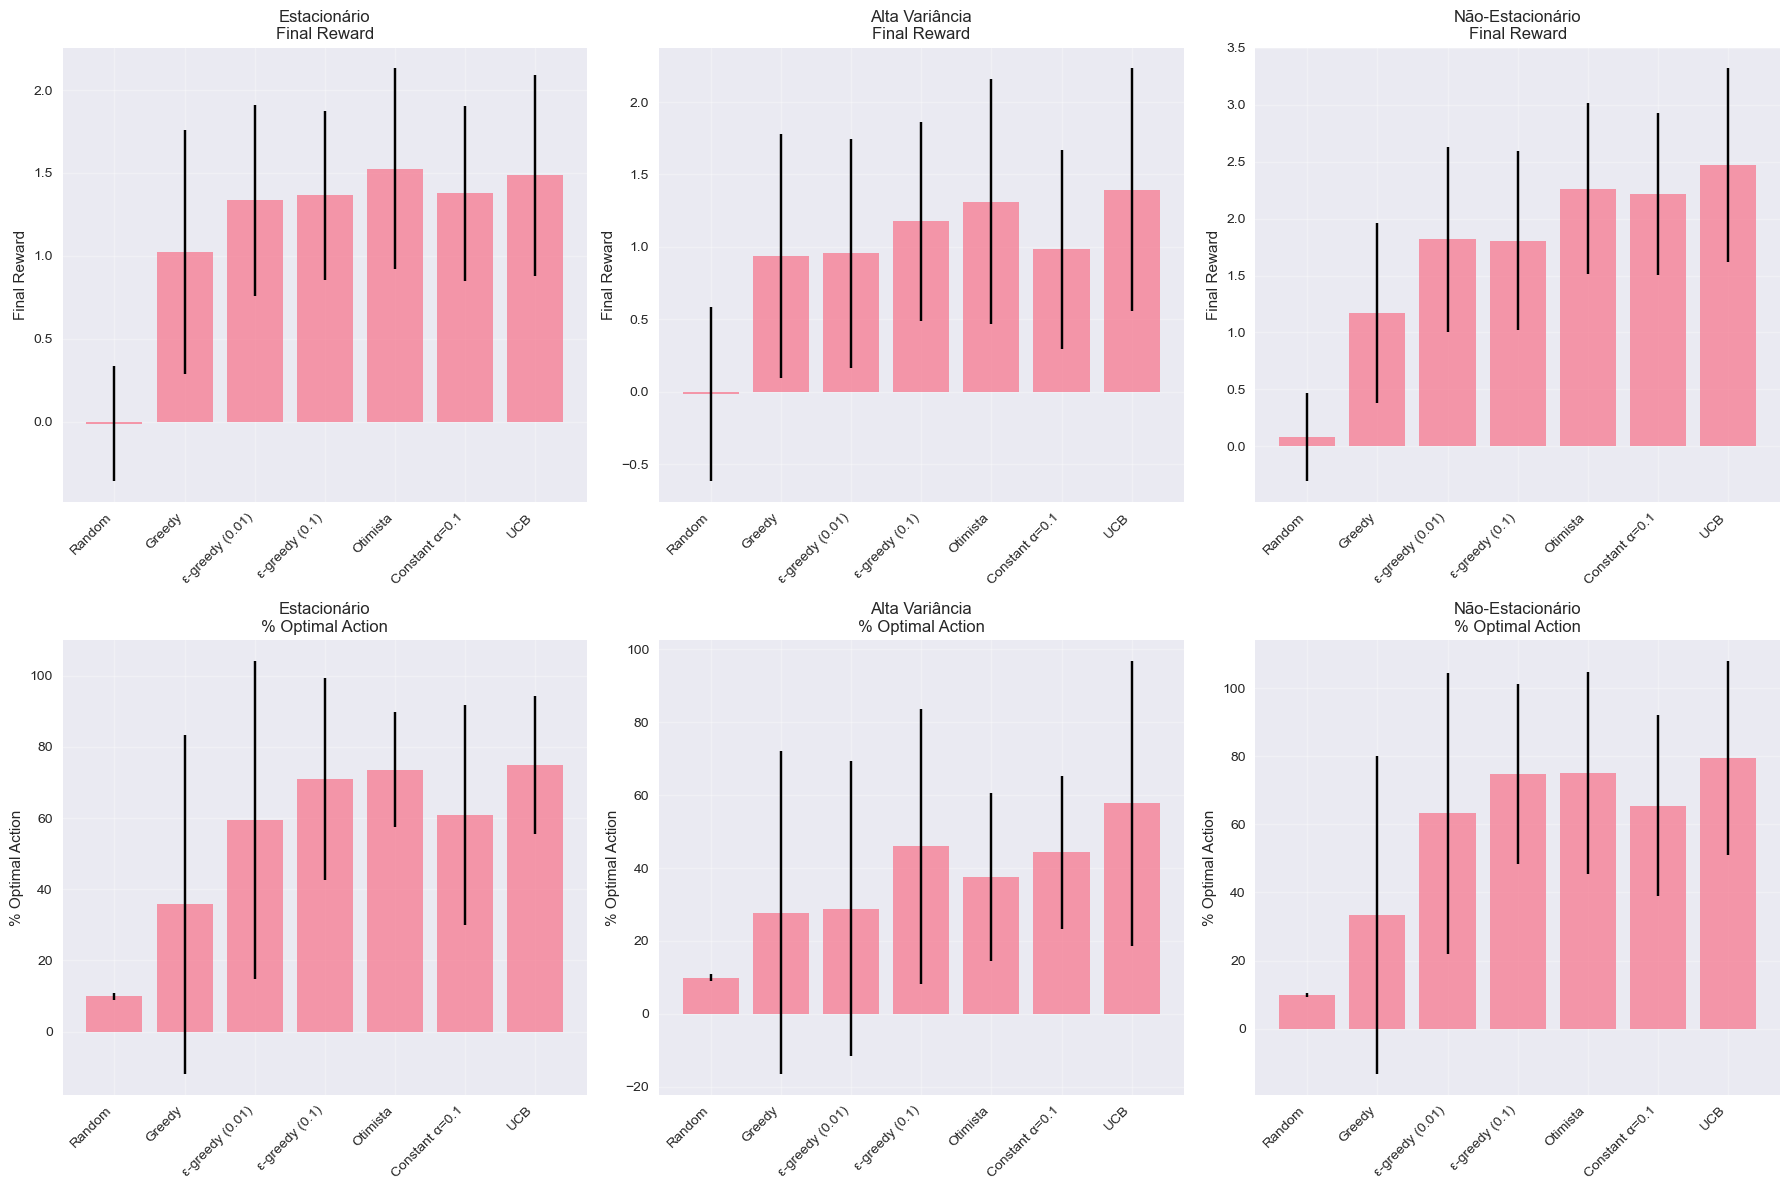


--- TABELA COMPARATIVA FINAL ---

Recompensa Final por Cenário:
Scenario         Alta Variância    Estacionário Não-Estacionário
Algorithm                                                       
Constant α=0.1    0.982 ± 0.686   1.378 ± 0.527    2.217 ± 0.711
Greedy            0.937 ± 0.842   1.023 ± 0.734    1.173 ± 0.790
Otimista          1.311 ± 0.846   1.526 ± 0.605    2.263 ± 0.749
Random           -0.018 ± 0.601  -0.013 ± 0.347    0.079 ± 0.386
UCB               1.396 ± 0.837   1.485 ± 0.609    2.468 ± 0.852
ε-greedy (0.01)   0.955 ± 0.793   1.335 ± 0.576    1.818 ± 0.814
ε-greedy (0.1)    1.177 ± 0.686   1.366 ± 0.511    1.804 ± 0.786

% Ação Ótima por Cenário:
Scenario        Alta Variância Estacionário Não-Estacionário
Algorithm                                                   
Constant α=0.1           44.3%        60.9%            65.5%
Greedy                   27.8%        35.8%            33.4%
Otimista                 37.5%        73.6%            75.1%
Random            

In [14]:
## 7. Análise Comparativa Final

### Comparação de Todos os Algoritmos

def comprehensive_comparison():
    """Comparação abrangente de todos os algoritmos em diferentes cenários"""
    print("\n=== ANÁLISE COMPARATIVA FINAL ===")
    
    scenarios = {
        'Estacionário': {
            'bandit_class': TenArmedBandit,
            'bandit_params': {'variance': 1.0},
            'n_steps': 1000,
            'description': 'Ambiente estacionário padrão'
        },
        'Alta Variância': {
            'bandit_class': TenArmedBandit,
            'bandit_params': {'variance': 4.0},
            'n_steps': 1000,
            'description': 'Ambiente com alta variância nas recompensas'
        },
        'Não-Estacionário': {
            'bandit_class': NonStationaryBandit,
            'bandit_params': {'k': 10, 'drift_std': 0.01},
            'n_steps': 2000,
            'description': 'Ambiente com drift gradual'
        }
    }
    
    algorithms = {
        'Random': {'class': RandomAgent, 'params': {'k': 10}},
        'Greedy': {'class': EpsilonGreedyAgent, 'params': {'k': 10, 'epsilon': 0.0}},
        'ε-greedy (0.01)': {'class': EpsilonGreedyAgent, 'params': {'k': 10, 'epsilon': 0.01}},
        'ε-greedy (0.1)': {'class': EpsilonGreedyAgent, 'params': {'k': 10, 'epsilon': 0.1}},
        'Otimista': {'class': EpsilonGreedyAgent, 'params': {
            'k': 10, 'epsilon': 0.0, 'initial_value': 5.0, 'alpha': 0.1}},
        'Constant α=0.1': {'class': EpsilonGreedyAgent, 'params': {
            'k': 10, 'epsilon': 0.1, 'alpha': 0.1}},
        'UCB': {'class': UCBAgent, 'params': {'k': 10, 'c': 2.0}}
    }
    
    # Executa experimentos
    n_runs = 50
    all_scenario_results = {}
    
    for scenario_name, scenario_config in scenarios.items():
        print(f"\nExecutando cenário: {scenario_name}")
        print(f"Descrição: {scenario_config['description']}")
        
        scenario_results = {name: [] for name in algorithms.keys()}
        
        for run in range(n_runs):
            if (run + 1) % 10 == 0:
                print(f"  Run {run + 1}/{n_runs}")
            
            # Cria ambiente para este run
            bandit_class = scenario_config['bandit_class']
            bandit_params = scenario_config['bandit_params']
            n_steps = scenario_config['n_steps']
            
            if bandit_class == TenArmedBandit:
                bandit = bandit_class(seed=run, **bandit_params)
            else:
                bandit = bandit_class(**bandit_params)
            
            # Testa cada algoritmo
            for alg_name, alg_config in algorithms.items():
                agent = alg_config['class'](**alg_config['params'])
                result = run_single_experiment(bandit, agent, n_steps)
                
                # Métricas de interesse
                final_reward = np.mean(result['rewards'][-100:])  # Últimos 100 steps
                total_optimal = np.mean(result['optimal_actions']) * 100
                scenario_results[alg_name].append({
                    'final_reward': final_reward,
                    'total_optimal': total_optimal,
                    'total_reward': np.sum(result['rewards'])
                })
        
        all_scenario_results[scenario_name] = scenario_results
    
    # Visualização comparativa
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Para cada cenário, cria gráficos
    for i, (scenario_name, scenario_results) in enumerate(all_scenario_results.items()):
        # Recompensa final
        ax1 = axes[0, i]
        alg_names = list(scenario_results.keys())
        final_rewards = [np.mean([run['final_reward'] for run in scenario_results[alg]]) 
                        for alg in alg_names]
        final_rewards_std = [np.std([run['final_reward'] for run in scenario_results[alg]]) 
                           for alg in alg_names]
        
        bars = ax1.bar(range(len(alg_names)), final_rewards, 
                      yerr=final_rewards_std, alpha=0.7, capsize=5)
        ax1.set_xticks(range(len(alg_names)))
        ax1.set_xticklabels(alg_names, rotation=45, ha='right')
        ax1.set_ylabel('Final Reward')
        ax1.set_title(f'{scenario_name}\nFinal Reward')
        ax1.grid(True, alpha=0.3)
        
        # % Ação ótima
        ax2 = axes[1, i]
        total_optimal = [np.mean([run['total_optimal'] for run in scenario_results[alg]]) 
                        for alg in alg_names]
        total_optimal_std = [np.std([run['total_optimal'] for run in scenario_results[alg]]) 
                           for alg in alg_names]
        
        bars = ax2.bar(range(len(alg_names)), total_optimal, 
                      yerr=total_optimal_std, alpha=0.7, capsize=5)
        ax2.set_xticks(range(len(alg_names)))
        ax2.set_xticklabels(alg_names, rotation=45, ha='right')
        ax2.set_ylabel('% Optimal Action')
        ax2.set_title(f'{scenario_name}\n% Optimal Action')
        ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Tabela resumo
    print("\n--- TABELA COMPARATIVA FINAL ---")
    
    summary_data = []
    for scenario_name, scenario_results in all_scenario_results.items():
        for alg_name, results in scenario_results.items():
            avg_final_reward = np.mean([r['final_reward'] for r in results])
            std_final_reward = np.std([r['final_reward'] for r in results])
            avg_optimal = np.mean([r['total_optimal'] for r in results])
            
            summary_data.append({
                'Scenario': scenario_name,
                'Algorithm': alg_name,
                'Final Reward': f"{avg_final_reward:.3f} ± {std_final_reward:.3f}",
                '% Optimal': f"{avg_optimal:.1f}%"
            })
    
    summary_df = pd.DataFrame(summary_data)
    
    # Cria tabela pivotada para melhor visualização
    pivot_reward = summary_df.pivot(index='Algorithm', columns='Scenario', values='Final Reward')
    pivot_optimal = summary_df.pivot(index='Algorithm', columns='Scenario', values='% Optimal')
    
    print("\nRecompensa Final por Cenário:")
    print(pivot_reward.to_string())
    
    print("\n% Ação Ótima por Cenário:")
    print(pivot_optimal.to_string())
    
    # Análise de robustez
    print("\n--- ANÁLISE DE ROBUSTEZ ---")
    
    robustness_scores = {}
    for alg_name in algorithms.keys():
        scores = []
        for scenario_name in scenarios.keys():
            scenario_rewards = [r['final_reward'] for r in all_scenario_results[scenario_name][alg_name]]
            mean_reward = np.mean(scenario_rewards)
            scores.append(mean_reward)
        
        # Robustez = média dos scores - penalidade por variância
        robustness = np.mean(scores) - np.std(scores)
        robustness_scores[alg_name] = robustness
    
    print("Ranking de Robustez (alta performance em múltiplos cenários):")
    for i, (alg, score) in enumerate(sorted(robustness_scores.items(), 
                                          key=lambda x: x[1], reverse=True), 1):
        print(f"{i}. {alg}: {score:.3f}")

# Executa análise comparativa
comprehensive_comparison()

# 8. Análise de Sensibilidade de Parâmetros - K-Armed Bandits

## Visão Geral

A análise de sensibilidade de parâmetros é **fundamental** na pesquisa em Reinforcement Learning, pois determina quão **robustos** são os algoritmos e quais configurações otimizam a performance. Esta função implementa um estudo sistemático dos principais hiperparâmetros dos algoritmos de bandit.

## Por Que Análise de Sensibilidade é Crítica?

### Problemas de Hiperparâmetros Mal Configurados
1. **Performance Subótima**: Parâmetros inadequados levam a resultados ruins
2. **Falta de Robustez**: Algoritmo funciona apenas em configurações específicas  
3. **Transferibilidade Limitada**: Configuração não generaliza para outros problemas
4. **Reprodutibilidade**: Resultados inconsistentes entre estudos

### Benefícios da Análise Sistemática
1. **Configuração Ótima**: Identifica melhores parâmetros empiricamente
2. **Entendimento do Comportamento**: Revela como parâmetros afetam performance
3. **Robustez**: Avalia estabilidade em diferentes configurações
4. **Guidelines Práticas**: Fornece recomendações para aplicações reais

## Função Principal: `parameter_sensitivity_analysis()`

### Estrutura Geral

```python
def parameter_sensitivity_analysis():
    """Análise de sensibilidade dos parâmetros dos algoritmos"""
    # Configuração experimental base
    n_steps = 1000    # Duração de cada experimento
    n_runs = 30       # Repetições para significância estatística
```

**Configuração Experimental:**
- **n_steps = 1000**: Suficiente para convergência, mas não excessivamente longo
- **n_runs = 30**: Compromisso entre confiabilidade estatística e tempo computacional
- **Múltiplas métricas**: Recompensa final + % ação ótima

---

## 1. Análise de Sensibilidade do Epsilon (ε-greedy)

### Implementação

```python
# Sensibilidade do epsilon no ε-greedy
epsilon_values = [0.0, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
```

### Objetivos
- **Trade-off Exploração-Exploração**: Como ε afeta o balanceamento
- **Identificação do ótimo**: Qual valor maximiza performance
- **Robustez**: Quão sensível é o algoritmo a mudanças em ε

### Ambiente de Teste
- **TenArmedBandit**: Ambiente estacionário padrão
- **Seed controlada**: Garante comparação justa entre valores de ε
- **Ambiente fixo**: Mesmo problema para todos os valores testados

### Métricas Coletadas

#### 1. Recompensa Final
```python
final_reward = np.mean(result['rewards'][-100:])
```
- **Propósito**: Mede performance no estado estacionário
- **Janela**: Últimos 100 steps (estado convergido)
- **Interpretação**: Maior = melhor exploração do ambiente conhecido

#### 2. Porcentagem de Ação Ótima
```python
total_optimal = np.mean(result['optimal_actions']) * 100
```
- **Propósito**: Mede precisão na identificação da melhor ação
- **Período**: Todo o experimento
- **Interpretação**: Maior = melhor capacidade de identificação + menos exploração desnecessária

### Padrões Esperados

**Comportamento Típico do ε-greedy:**
- **ε = 0.0 (Greedy)**: Convergência rápida mas possível subótima
- **ε pequeno (0.01-0.05)**: Boa exploração inicial, boa exploração
- **ε médio (0.1-0.15)**: Balanceamento clássico
- **ε grande (0.3+)**: Muita exploração, performance baixa

**Ponto Ótimo Esperado:** Tipicamente ε ∈ [0.05, 0.15] dependendo do problema

---

## 2. Análise de Sensibilidade do Alpha (Constant Step-Size)

### Implementação

```python
# Sensibilidade do alpha no constant step-size
alpha_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 0.8, 1.0]
```

### Objetivos
- **Adaptabilidade**: Como α afeta capacidade de tracking em ambientes não-estacionários
- **Estabilidade vs. Responsividade**: Trade-off fundamental
- **Configuração ótima**: Para ambientes com drift

### Ambiente de Teste
```python
bandit = NonStationaryBandit(k=10, drift_std=0.01)
agent = EpsilonGreedyAgent(k=10, epsilon=0.1, alpha=alpha)
```

**Características do Ambiente:**
- **NonStationaryBandit**: Valores verdadeiros mudam lentamente
- **drift_std=0.01**: Mudança gradual (não abrupta)
- **ε fixo em 0.1**: Isola o efeito do α

### Interpretação dos Valores de Alpha

#### Alpha Baixo (α ≤ 0.05)
- **Prós**: Estimativas estáveis, menos ruído
- **Contras**: Adaptação lenta a mudanças
- **Uso**: Ambientes quase estacionários

#### Alpha Médio (α ∈ [0.1, 0.3])
- **Prós**: Boa adaptação + estabilidade razoável
- **Contras**: Compromisso, não ótimo em extremos
- **Uso**: Aplicações gerais com incerteza sobre estacionariedade

#### Alpha Alto (α ≥ 0.5)
- **Prós**: Adaptação rápida a mudanças
- **Contras**: Muito sensível a ruído, estimativas instáveis
- **Uso**: Ambientes com mudanças rápidas conhecidas

### Comportamento Esperado
- **Curva em U invertido**: Performance cresce até ponto ótimo, depois decresce
- **Ponto ótimo típico**: α ∈ [0.1, 0.2] para drift suave
- **Trade-off visível**: Responsividade vs. estabilidade

---

## 3. Análise de Sensibilidade do Parâmetro c (UCB)

### Implementação

```python
# Sensibilidade do c no UCB
c_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0]
```

### Objetivos
- **Confiança vs. Exploração**: Como c controla exploração dirigida
- **Configuração teórica vs. prática**: Comparar com recomendações teóricas
- **Robustez**: Sensibilidade do UCB ao parâmetro principal

### Ambiente de Teste
```python
bandit = TenArmedBandit(seed=run)
agent = UCBAgent(k=10, c=c)
```

**Características:**
- **Ambiente estacionário**: UCB é otimizado para este caso
- **Múltiplos problemas**: seed controlada para robustez
- **Métrica única**: Foco na recompensa final

### Interpretação dos Valores de c

#### c Baixo (c ≤ 1.0)
- **Comportamento**: Exploração conservadora
- **Efeito**: Pode convergir prematuramente para subótima
- **Analogia**: UCB se comporta quase como greedy

#### c Teórico (c ≈ 2.0)
- **Base**: Recomendação teórica da literatura
- **Balanceamento**: Exploração teoricamente ótima
- **Expectativa**: Deve performar bem na maioria dos casos

#### c Alto (c ≥ 4.0)
- **Comportamento**: Exploração agressiva
- **Efeito**: Pode explorar excessivamente
- **Analogia**: UCB se comporta com muito "otimismo"

### Upper Confidence Bound - Teoria

**Fórmula UCB:**
```
UCB(a) = Q(a) + c * sqrt(ln(t) / N(a))
```

**Interpretação do parâmetro c:**
- **c = 0**: Puramente greedy (só Q(a))
- **c pequeno**: Pouca exploração adicional  
- **c = 2**: Valor teórico padrão
- **c grande**: Muita exploração dirigida

---

## Visualizações Geradas

### Layout dos Gráficos
```python
plt.figure(figsize=(15, 5))
# 3 subplots lado a lado: epsilon, alpha, c
```

### Características das Visualizações

#### 1. Gráfico Error Bar
```python
plt.errorbar(values, rewards, yerr=reward_stds, marker='o', capsize=5)
```
- **Pontos centrais**: Média das performances
- **Barras de erro**: ±1 desvio padrão (incerteza)
- **Capsize=5**: Tampas nas barras para clareza visual

#### 2. Identificação do Ótimo
```python
best_idx = np.argmax(rewards)
best_param = values[best_idx]
plt.axvline(best_param, color='red', linestyle='--', alpha=0.7,
            label=f'Best param = {best_param}')
```
- **Linha vermelha**: Marca parâmetro com melhor performance
- **Label dinâmico**: Mostra valor ótimo encontrado
- **Transparência**: alpha=0.7 para não mascarar dados

#### 3. Grid e Formatação
```python
plt.grid(True, alpha=0.3)
```
- **Grid sutil**: Facilita leitura de valores
- **Alpha baixo**: Não interfere visualmente
- **Títulos descritivos**: Contexto claro para cada gráfico

---

## Outputs da Função

### Console Output
```python
print("\n--- MELHORES PARÂMETROS ENCONTRADOS ---")
print(f"ε-Greedy: ε = {best_epsilon} (reward = {reward:.3f})")
print(f"Constant Step-Size: α = {best_alpha} (reward = {reward:.3f})")
print(f"UCB: c = {best_c} (reward = {reward:.3f})")
```

**Informações Fornecidas:**
- **Parâmetro ótimo**: Valor que maximizou performance
- **Performance atingida**: Recompensa correspondente
- **Comparação direta**: Facilita seleção entre algoritmos

### Interpretação dos Resultados

#### Sinais de Configuração Correta
✅ **Curvas suaves**: Transições graduais entre parâmetros  
✅ **Ponto ótimo claro**: Máximo bem definido  
✅ **Barras de erro pequenas**: Baixa variabilidade  
✅ **Valores esperados**: Consistente com literatura  

#### Sinais de Problemas
⚠️ **Curvas erráticas**: Possível bug na implementação  
⚠️ **Ótimo nos extremos**: Range de parâmetros inadequado  
⚠️ **Barras de erro grandes**: Poucos runs ou alta variabilidade  
⚠️ **Valores inesperados**: Verificar ambiente e métricas  

---

## Personalização e Extensões

### Modificar Ranges de Parâmetros

#### Para Análise Mais Fina
```python
# Análise refinada ao redor do ótimo
epsilon_values = np.linspace(0.05, 0.15, 11)  # [0.05, 0.06, ..., 0.15]
```

#### Para Ranges Mais Amplos
```python
# Incluir valores extremos
alpha_values = [0.001, 0.01] + alpha_values + [1.5, 2.0]
```

### Aumentar Rigor Estatístico
```python
n_runs = 100        # Mais repetições
n_steps = 2000      # Experimentos mais longos
```

### Adicionar Novos Parâmetros
```python
# Exemplo: initial_value para inicialização otimista
initial_values = [0.0, 1.0, 2.0, 5.0, 10.0]
```

### Diferentes Ambientes
```python
# Testar em múltiplos ambientes
environments = [
    TenArmedBandit(variance=1.0),
    TenArmedBandit(variance=4.0), 
    NonStationaryBandit(k=10, drift_std=0.01)
]
```

---

## Conexão com a Literatura

### Sutton & Barto Insights
- **Capítulo 2.7**: Importance of parameter selection
- **Figure 2.6**: ε-greedy parameter study (similar to our implementation)
- **Section 2.8**: UCB parameter discussion

### Recomendações Práticas da Literatura
- **ε-greedy**: ε ∈ [0.01, 0.1] para most applications
- **UCB**: c = 2 como baseline, c ∈ [1, 3] range útil
- **Step-size**: α ∈ [0.1, 0.3] para non-stationary environments

### Metodologia Experimental
- **Multiple runs**: Essential for statistical significance
- **Error bars**: Standard practice in RL research
- **Parameter sweeps**: Systematic approach to hyperparameter tuning

---

## Aplicações Práticas

### Seleção de Algoritmos
1. **Execute sensitivity analysis** nos candidatos
2. **Compare optimal performances** de cada algoritmo
3. **Consider robustness**: Prefira algoritmos com ótimos amplos
4. **Account for computational cost**: UCB > ε-greedy em complexidade

### Configuração para Produção
1. **Start with optimal parameters** encontrados na análise
2. **Monitor performance** em produção
3. **Adjust if necessary** baseado em dados reais
4. **Consider adaptive approaches** que ajustam parâmetros automaticamente

### Pesquisa e Desenvolvimento
1. **Validate implementations** com sensitivity analysis
2. **Compare novel algorithms** usando metodologia consistente
3. **Report sensitivity** em papers para reprodutibilidade
4. **Provide parameter guidelines** para outros pesquisadores

Esta análise de sensibilidade é **essencial** para uso prático e rigoroso dos algoritmos de multi-armed bandits, fornecendo as bases empíricas para configuração ótima e entendimento do comportamento algorítmico.


=== ANÁLISE DE SENSIBILIDADE DE PARÂMETROS ===
Analisando sensibilidade do epsilon...
Analisando sensibilidade do alpha...
Analisando sensibilidade do c (UCB)...


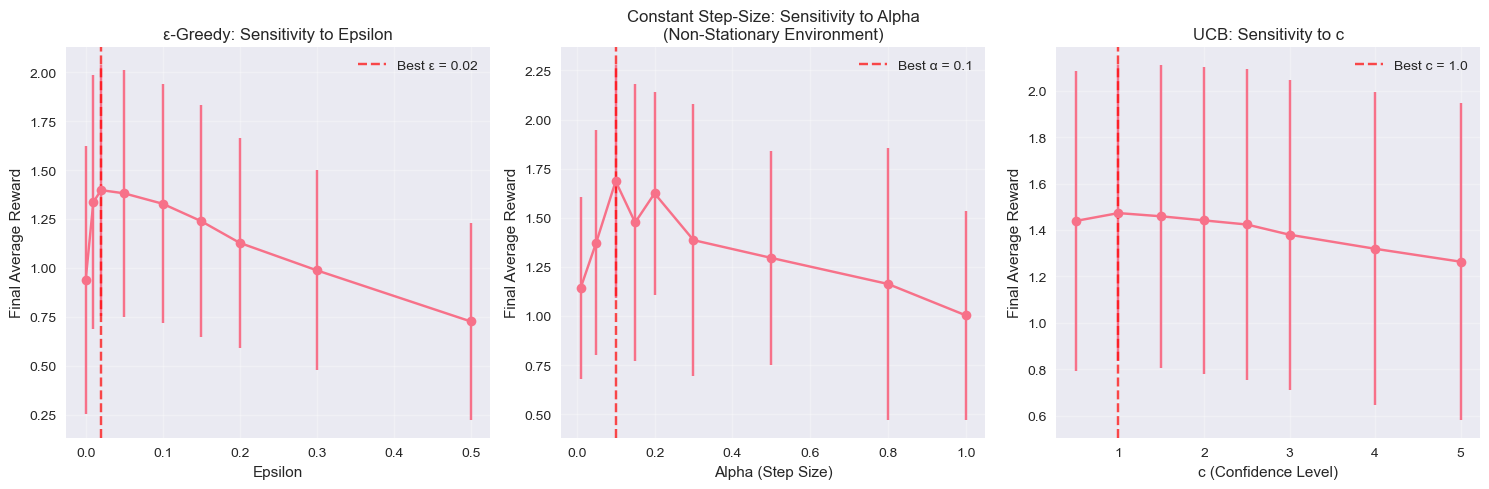


--- MELHORES PARÂMETROS ENCONTRADOS ---
ε-Greedy: ε = 0.02 (reward = 1.397)
Constant Step-Size: α = 0.1 (reward = 1.686)
UCB: c = 1.0 (reward = 1.473)


In [15]:
## 8. Visualização Interativa e Análise de Sensibilidade

### Estudo de Sensibilidade de Parâmetros

def parameter_sensitivity_analysis():
    """Análise de sensibilidade dos parâmetros dos algoritmos"""
    print("\n=== ANÁLISE DE SENSIBILIDADE DE PARÂMETROS ===")
    
    # Configuração base
    n_steps = 1000
    n_runs = 30
    
    # 1. Sensibilidade do epsilon no ε-greedy
    print("Analisando sensibilidade do epsilon...")
    epsilon_values = [0.0, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
    epsilon_results = []
    
    for epsilon in epsilon_values:
        run_results = []
        for run in range(n_runs):
            bandit = TenArmedBandit(seed=run)
            agent = EpsilonGreedyAgent(k=10, epsilon=epsilon)
            result = run_single_experiment(bandit, agent, n_steps)
            
            final_reward = np.mean(result['rewards'][-100:])
            total_optimal = np.mean(result['optimal_actions']) * 100
            run_results.append({'reward': final_reward, 'optimal': total_optimal})
        
        avg_reward = np.mean([r['reward'] for r in run_results])
        std_reward = np.std([r['reward'] for r in run_results])
        avg_optimal = np.mean([r['optimal'] for r in run_results])
        
        epsilon_results.append({
            'epsilon': epsilon,
            'reward': avg_reward,
            'reward_std': std_reward,
            'optimal': avg_optimal
        })
    
    # 2. Sensibilidade do alpha no constant step-size
    print("Analisando sensibilidade do alpha...")
    alpha_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 0.8, 1.0]
    alpha_results = []
    
    for alpha in alpha_values:
        run_results = []
        for run in range(n_runs):
            bandit = NonStationaryBandit(k=10, drift_std=0.01)
            agent = EpsilonGreedyAgent(k=10, epsilon=0.1, alpha=alpha)
            result = run_single_experiment(bandit, agent, n_steps)
            
            final_reward = np.mean(result['rewards'][-100:])
            run_results.append(final_reward)
        
        avg_reward = np.mean(run_results)
        std_reward = np.std(run_results)
        
        alpha_results.append({
            'alpha': alpha,
            'reward': avg_reward,
            'reward_std': std_reward
        })
    
    # 3. Sensibilidade do c no UCB
    print("Analisando sensibilidade do c (UCB)...")
    c_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0]
    ucb_results = []
    
    for c in c_values:
        run_results = []
        for run in range(n_runs):
            bandit = TenArmedBandit(seed=run)
            agent = UCBAgent(k=10, c=c)
            result = run_single_experiment(bandit, agent, n_steps)
            
            final_reward = np.mean(result['rewards'][-100:])
            run_results.append(final_reward)
        
        avg_reward = np.mean(run_results)
        std_reward = np.std(run_results)
        
        ucb_results.append({
            'c': c,
            'reward': avg_reward,
            'reward_std': std_reward
        })
    
    # Visualização
    plt.figure(figsize=(15, 5))
    
    # Epsilon sensitivity
    plt.subplot(1, 3, 1)
    epsilons = [r['epsilon'] for r in epsilon_results]
    rewards = [r['reward'] for r in epsilon_results]
    reward_stds = [r['reward_std'] for r in epsilon_results]
    
    plt.errorbar(epsilons, rewards, yerr=reward_stds, marker='o', capsize=5)
    plt.xlabel('Epsilon')
    plt.ylabel('Final Average Reward')
    plt.title('ε-Greedy: Sensitivity to Epsilon')
    plt.grid(True, alpha=0.3)
    
    # Marca o melhor epsilon
    best_epsilon_idx = np.argmax(rewards)
    best_epsilon = epsilons[best_epsilon_idx]
    plt.axvline(best_epsilon, color='red', linestyle='--', alpha=0.7,
                label=f'Best ε = {best_epsilon}')
    plt.legend()
    
    # Alpha sensitivity
    plt.subplot(1, 3, 2)
    alphas = [r['alpha'] for r in alpha_results]
    rewards = [r['reward'] for r in alpha_results]
    reward_stds = [r['reward_std'] for r in alpha_results]
    
    plt.errorbar(alphas, rewards, yerr=reward_stds, marker='o', capsize=5)
    plt.xlabel('Alpha (Step Size)')
    plt.ylabel('Final Average Reward')
    plt.title('Constant Step-Size: Sensitivity to Alpha\n(Non-Stationary Environment)')
    plt.grid(True, alpha=0.3)
    
    best_alpha_idx = np.argmax(rewards)
    best_alpha = alphas[best_alpha_idx]
    plt.axvline(best_alpha, color='red', linestyle='--', alpha=0.7,
                label=f'Best α = {best_alpha}')
    plt.legend()
    
    # UCB c sensitivity
    plt.subplot(1, 3, 3)
    c_vals = [r['c'] for r in ucb_results]
    rewards = [r['reward'] for r in ucb_results]
    reward_stds = [r['reward_std'] for r in ucb_results]
    
    plt.errorbar(c_vals, rewards, yerr=reward_stds, marker='o', capsize=5)
    plt.xlabel('c (Confidence Level)')
    plt.ylabel('Final Average Reward')
    plt.title('UCB: Sensitivity to c')
    plt.grid(True, alpha=0.3)
    
    best_c_idx = np.argmax(rewards)
    best_c = c_vals[best_c_idx]
    plt.axvline(best_c, color='red', linestyle='--', alpha=0.7,
                label=f'Best c = {best_c}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Resultados
    print("\n--- MELHORES PARÂMETROS ENCONTRADOS ---")
    print(f"ε-Greedy: ε = {best_epsilon} (reward = {epsilon_results[best_epsilon_idx]['reward']:.3f})")
    print(f"Constant Step-Size: α = {best_alpha} (reward = {alpha_results[best_alpha_idx]['reward']:.3f})")
    print(f"UCB: c = {best_c} (reward = {ucb_results[best_c_idx]['reward']:.3f})")

# Executa análise de sensibilidade
parameter_sensitivity_analysis()

## Como Usar Este Código

### Instruções de Execução

1. **Instale as dependências**:
```bash
pip install numpy pandas matplotlib seaborn
```

2. **Execute o script completo**:
```python
# Salve todo o código em um arquivo: bandit_experiments.py
python bandit_experiments.py
```

3. **Ou execute experimentos individuais**:
```python
# Para experimento específico:
experiment_one_armed()
experiment_epsilon_greedy()
# etc.
```

### Estrutura do Código

- **Classes de Agentes**: `RandomAgent`, `EpsilonGreedyAgent`, `UCBAgent`
- **Classes de Ambiente**: `OneArmedBandit`, `TwoArmedBandit`, `TenArmedBandit`, `NonStationaryBandit`
- **Funções de Experimento**: Uma para cada tipo de análise
- **Utilidades**: Funções auxiliares para visualização e análise

### Modificações Possíveis

1. **Adicionar novos algoritmos** (Thompson Sampling, Gradient Bandits)
2. **Modificar parâmetros** dos experimentos (n_steps, n_runs)
3. **Adicionar novas métricas** (regret, tracking error)
4. **Criar novos ambientes** (bandits contextuais, recompensas binárias)

Este código fornece uma implementação completa e educativa dos experimentos fundamentais de k-armed bandits, seguindo as especificações do Sutton & Barto e fornecendo análises detalhadas para entendimento dos conceitos fundamentais de Reinforcement Learning.